<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

## W4D2 (14 Jul)
## W5D1 (20 Jul)



# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

# what does investment refer to?

-----
---

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [77]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [78]:
from pprint import pprint

Workalong with Mas here:

https://www.kaggle.com/surbhirajkumari/sur-project3-dsi11-kernel4e550edc7c

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics. `REGRESSION`
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team. `NON-FIXED`
3. Evaluate the mean dollar value of different renovations. `???`

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:

`FIXED`
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to `REMOVE` any houses that `are not residential` from the dataset.  (`MSZoning`)
- Identify `fixed` features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses. 

`TRAIN set = pre 2010`
`TEST set = 2010`

- Characterize your model. 
    - How well does it perform? `ACCURACY`
    - What are the best estimates of price? `Predictors for best performing model`

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

### useful sns plotting function from Arnab

sns.countplot(df['abc'])

https://seaborn.pydata.org/generated/seaborn.countplot.html

In [79]:
# Load the data
house = pd.read_csv('./housing.csv')

In [80]:
house.shape

# there are 81 columns

(1460, 81)

In [81]:
# try on dummied

# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold()
# house_vt = selector.fit_transform(house)

### Heatmap: checking for missing values

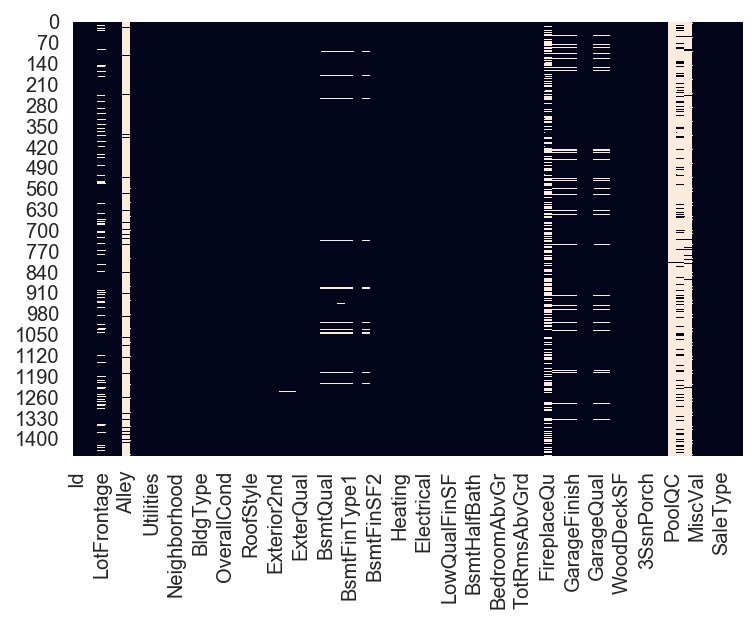

In [82]:
sns.heatmap(house.isnull(), cbar=False)

### Missingno: checking for missing values

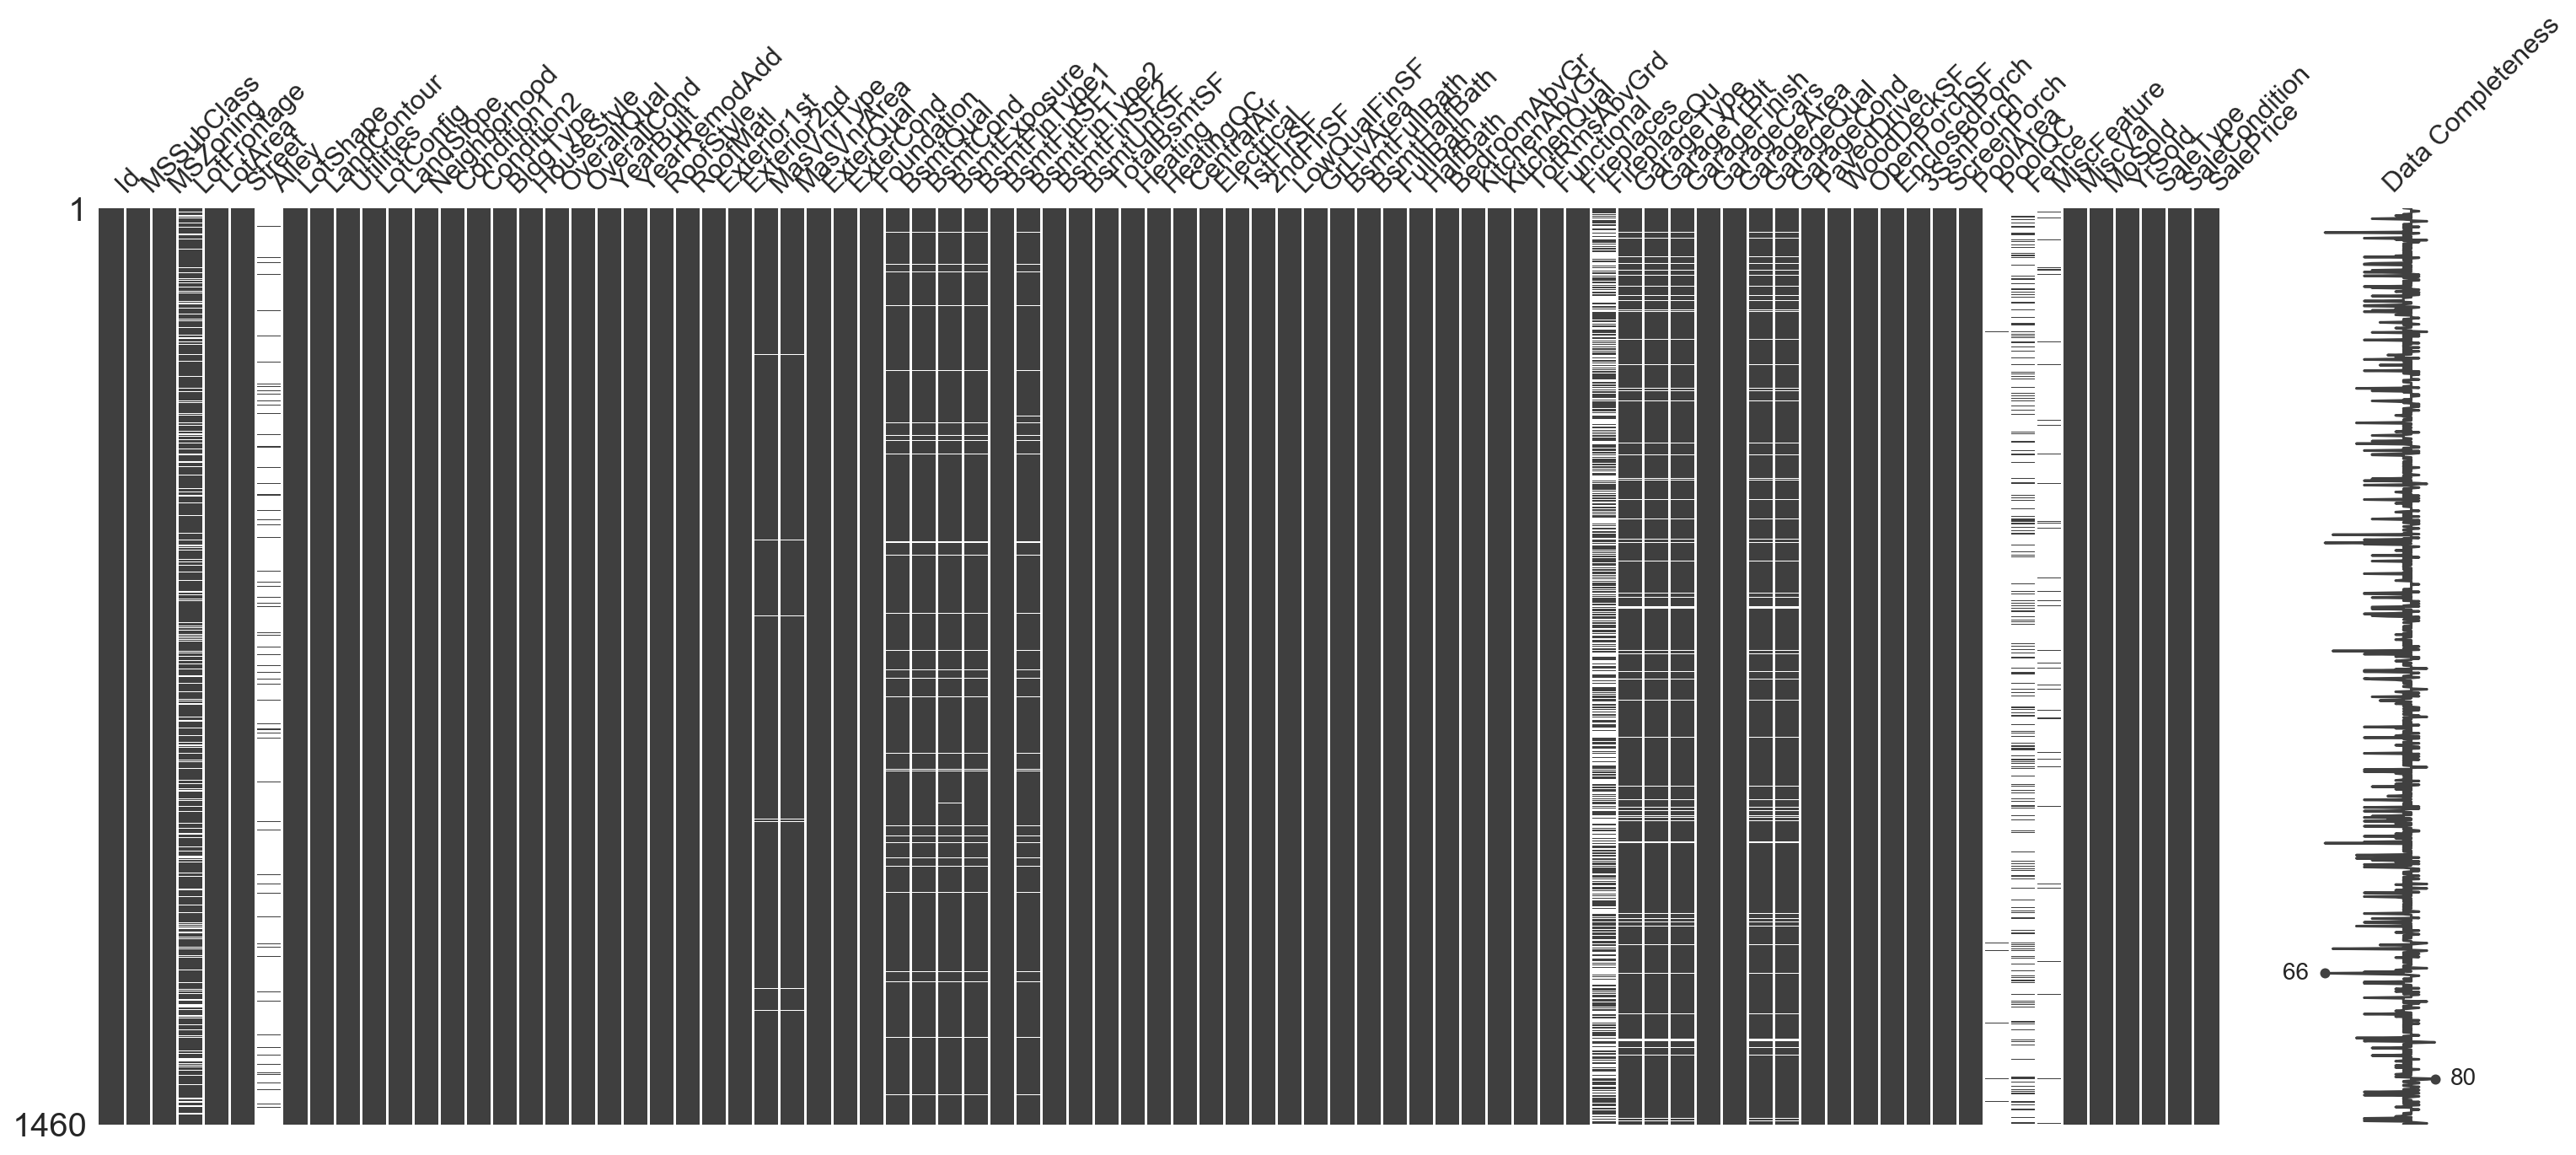

In [83]:
import missingno as msno
msno.matrix(house, labels = True)

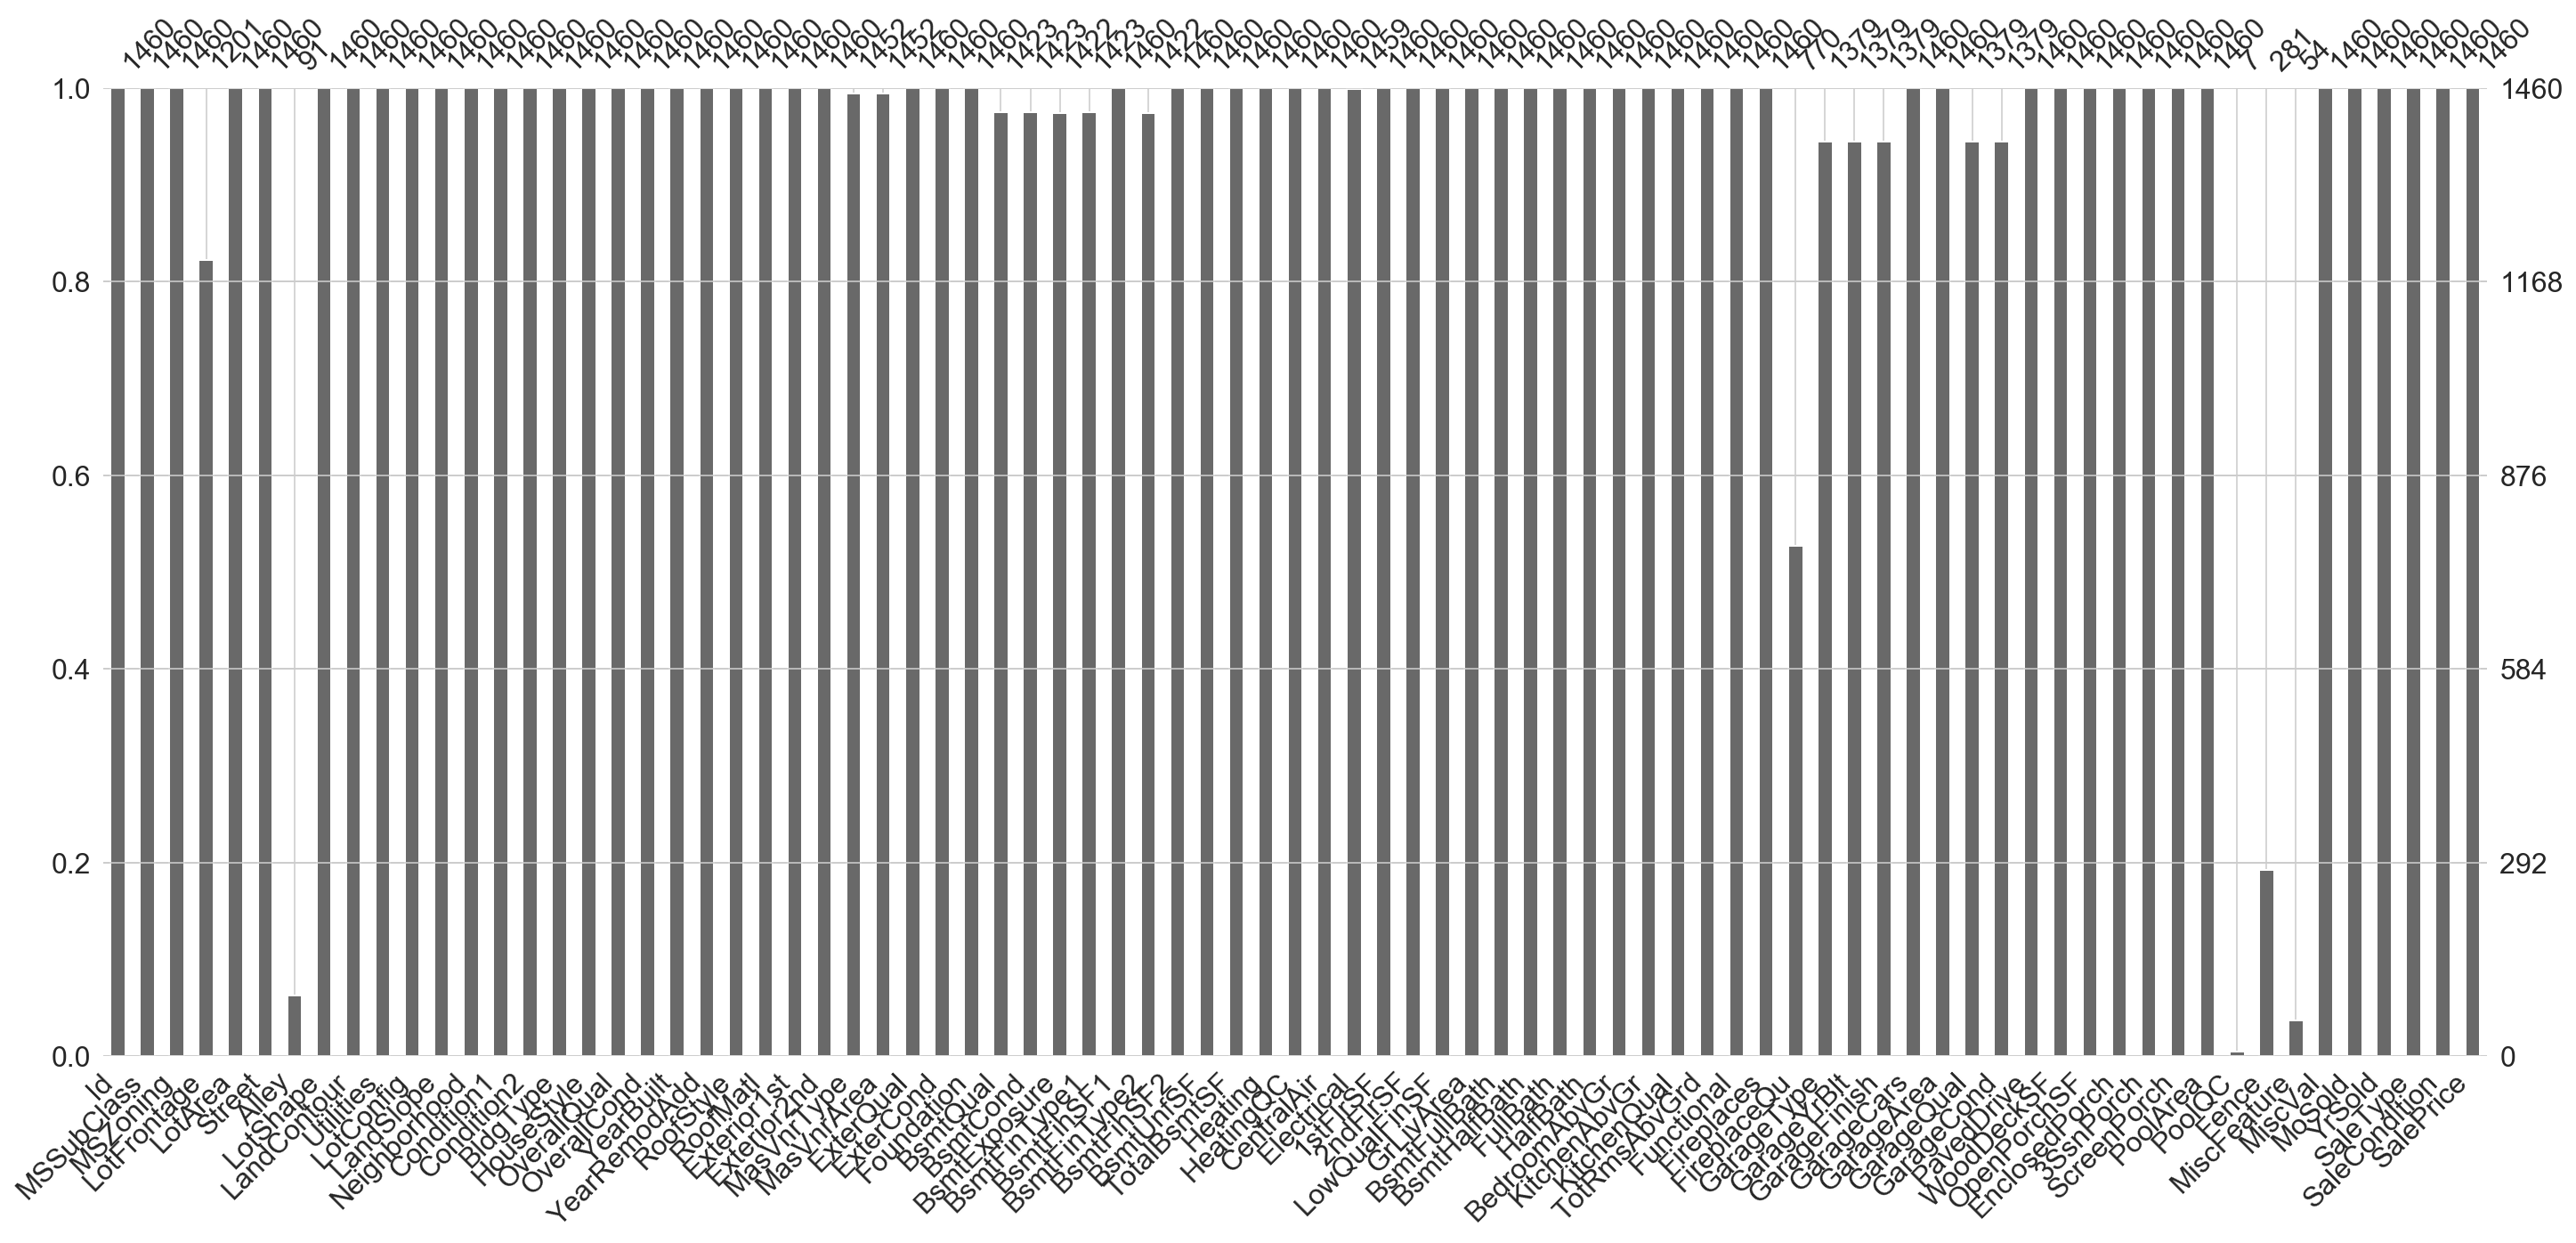

In [84]:
msno.bar(house, labels = True)

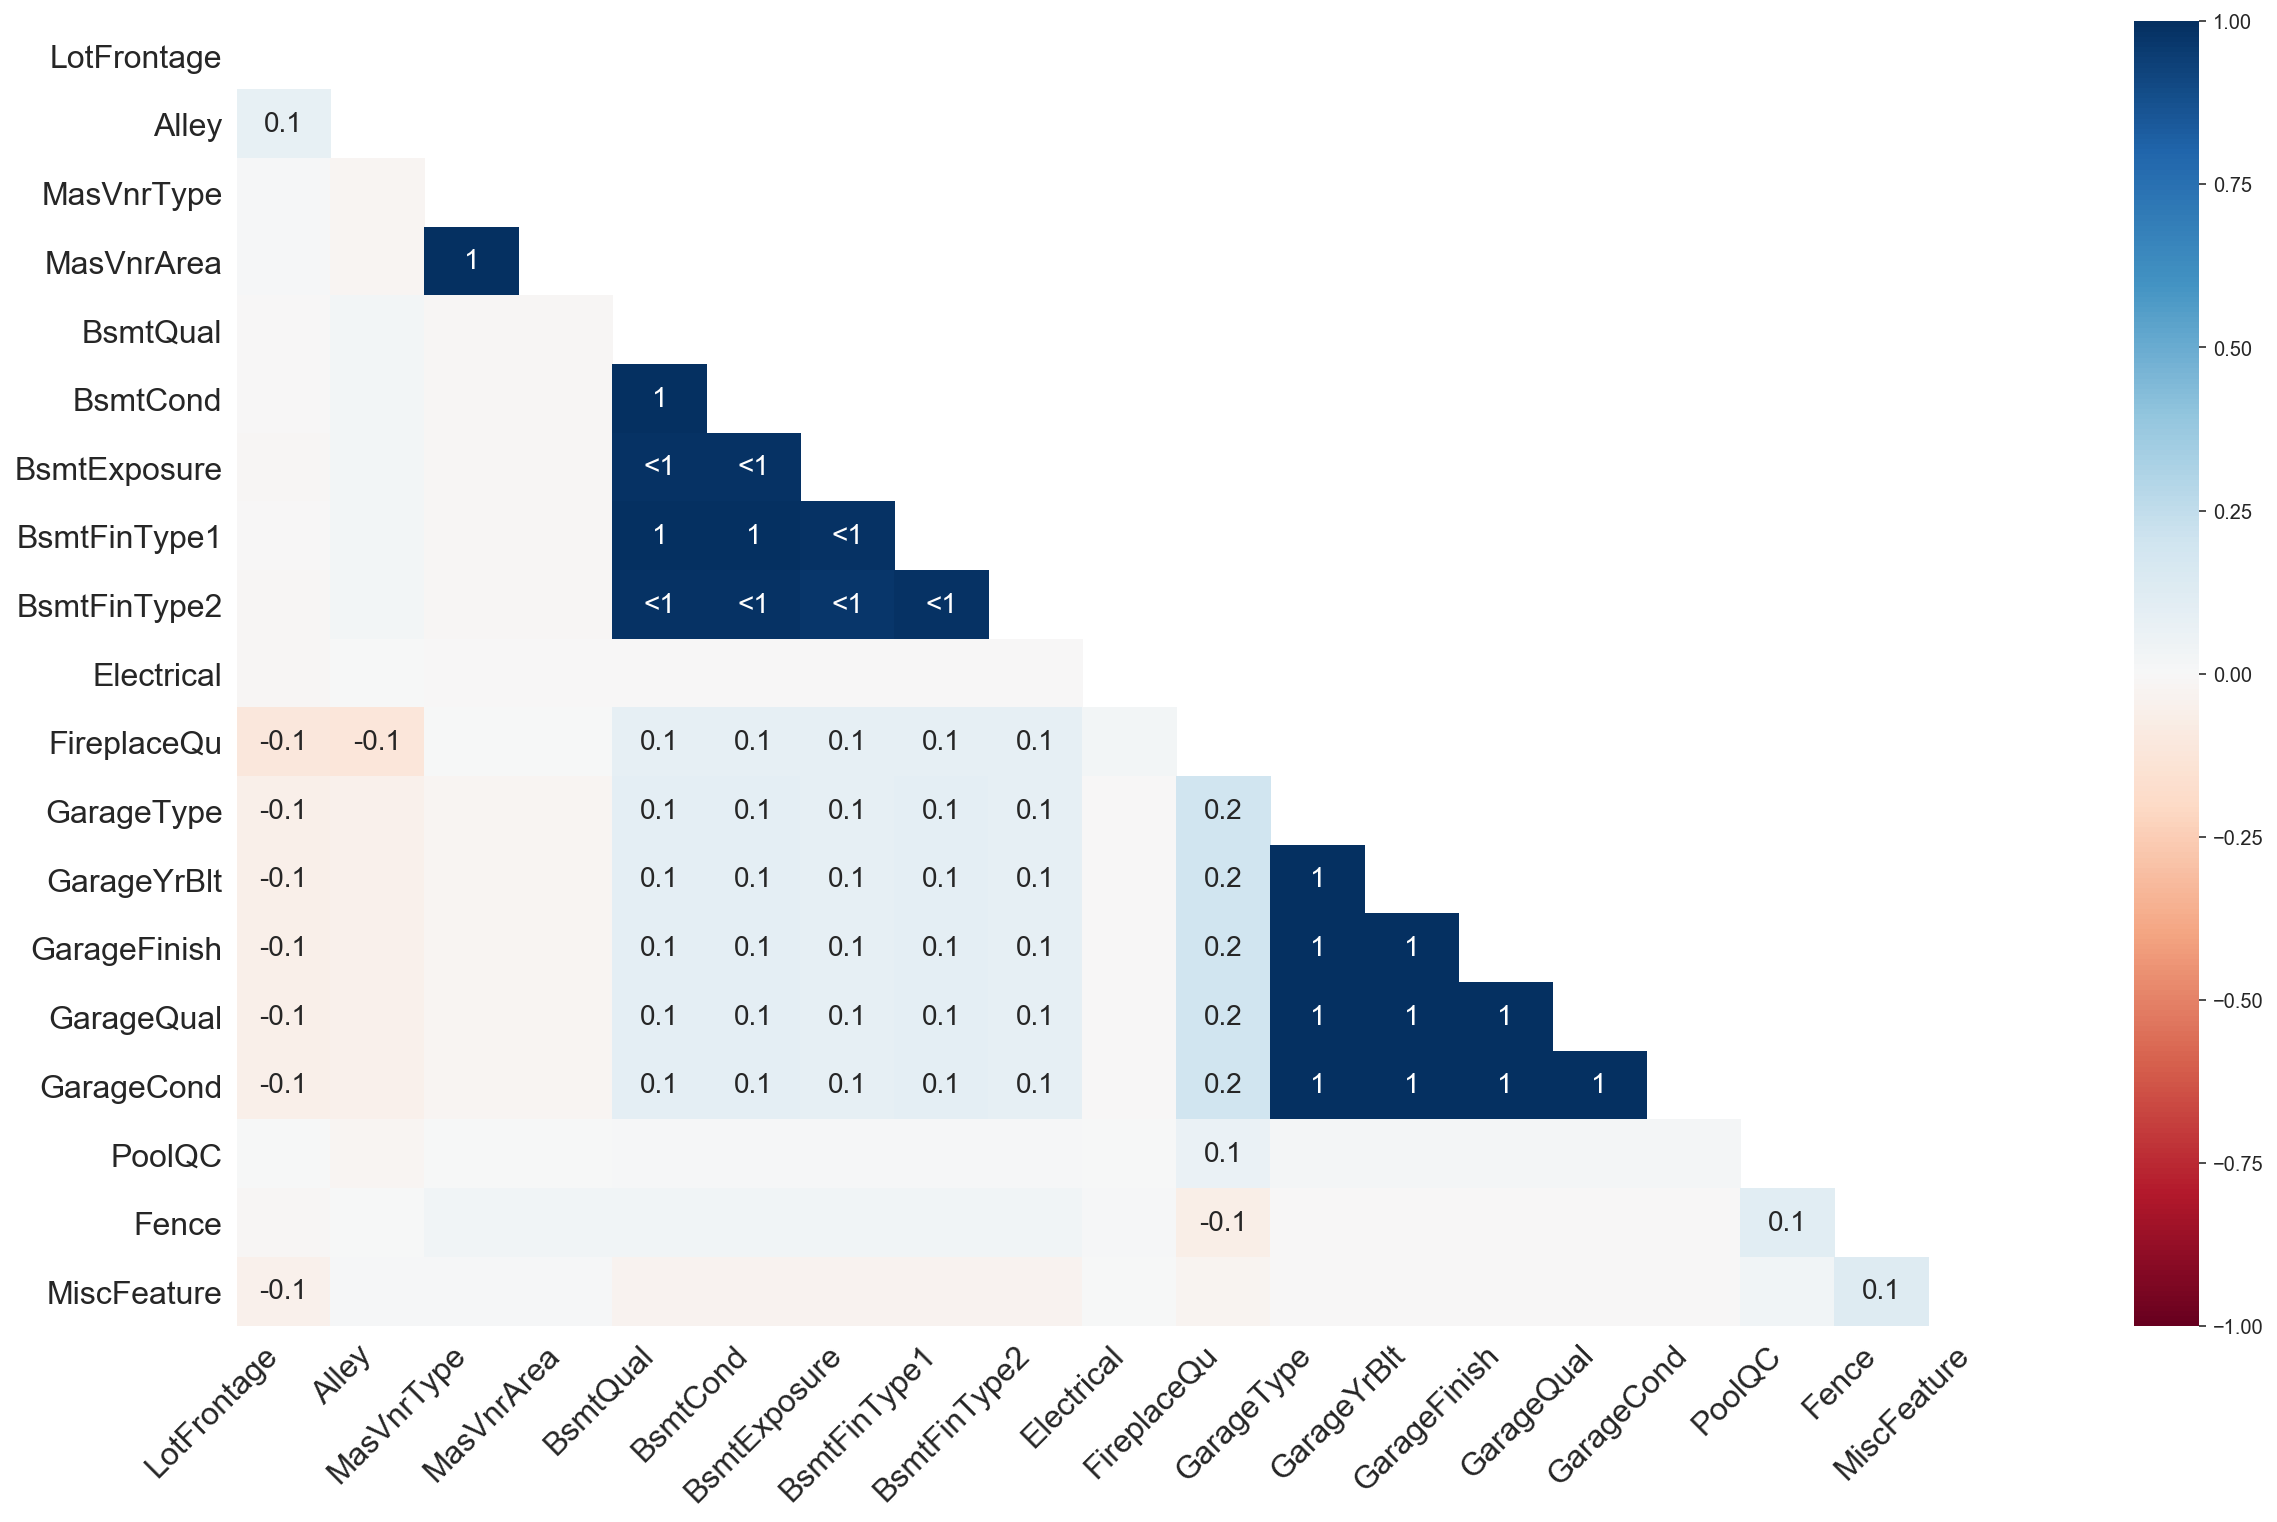

In [85]:
msno.heatmap(house)

### Range of the target, Sale Price or house prices

In [86]:
house.SalePrice.value_counts()
# house.SalePrice.describe()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

## Data dictionary from Kaggle
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Data fields
Here's a brief version of what you'll find in the data description file:


Additionally, I've attempted to divide them into fixed and renovatable features.


---
| Columns / Characteristics | Fixed = F $\:\:\:\:$ Renovatable = R $\:\:\:\:$ Categoricl = C $\:\:\:\:$ Numericl = N $\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ recategorised = re $\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$  Dummy = d $\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ NaN changed = nona $\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ drop|
| :- | :-: |
|-	ID: sale ID number | exclude	 |
|-	MSSubClass: The building class | FCred  $\:\:\:\:$   r_MSSubClass	 |
|-	MSZoning: The general zoning classification | FCd	 |
|-	LotFrontage: Linear feet of street connected to property | FNnona	 |
|-	LotArea: Lot size in square feet | FN	 |
|-	Street: Type of road access | FCd	 |
|-	Alley: Type of alley access | FCnonad $\:\:\:\:$  'Alley_nona'	 |
|-	LotShape: General shape of property | FCd	 |
|-	LandContour: Flatness of the property | FCd	 |
|-	Utilities: Type of utilities available | R Cd imbalanced	 |
|-	LotConfig: Lot configuration | FCd	 |
|-	LandSlope: Slope of property | FCd	 |
|-	Neighborhood: Physical locations within Ames city limits | FCred  $\:\:\:\:$   r_Neighborhood	 |
|-	Condition1: Proximity to main road or railroad | Fcred  $\:\:\:\:$   r_Condition1 	 |
|-	Condition2: Proximity to main road or railroad (if a second is present) | F	$\:\:$ drop |
|-	BldgType: Type of dwelling | FCd	 |
|-	HouseStyle: Style of dwelling | FCd	 |
|-	OverallQual: Overall material and finish quality | R  Cd nominal / ordinal?	 |
|-	OverallCond: Overall condition rating | R  Cd nominal / ordinal?		 |
|-	YearBuilt: Original construction date | FN $\:\:$ 'Age' 	 |
|-	YearRemodAdd: Remodel date | FCred	$\:\:$ 'r_Remod_diff' |
|-	RoofStyle: Type of roof | R	  Cd	 |
|-	RoofMatl: Roof material | R	  Cd	 |
|-	Exterior1st: Exterior covering on house | R	Cd |
|-	Exterior2nd: Exterior covering on house (if more than one material) | R	Cd |
|-	MasVnrType: Masonry veneer type | R Cnona d   $\:\:$  'MasVnrType_nona'	 |
|-	MasVnrArea: Masonry veneer area in square feet | R N nona   $\:\:$  	'MasVnrArea_nona' |
|-	ExterQual: Exterior material quality | R Cd	 |
|-	ExterCond: Present condition of the material on the exterior | R Cd	 |
|-	Foundation: Type of foundation | FCd 	 |
|-	BsmtQual: Height of the basement | FCd   $\:\:$ 'BsmtQual_nona'	 |
|-	BsmtCond: General condition of the basement | R Cd	'BsmtCond_nona' |
|-	BsmtExposure: Walkout or garden level basement walls | FCd  $\:\:$	'BsmtExposure_nona' |
|-	BsmtFinType1: Quality of basement finished area | R	Cd   $\:\:$  'BsmtFinType1_nona' |
|-	BsmtFinSF1: Type 1 finished square feet | R N	 |
|-	BsmtFinType2: Quality of second finished area (if present) | R Cd   $\:\:$  'BsmtFinType2_nona'	 |
|-	BsmtFinSF2: Type 2 finished square feet | R	N |
|-	BsmtUnfSF: Unfinished square feet of basement area | R N	 |
|-	TotalBsmtSF: Total square feet of basement area | FN	 |
|-	Heating: Type of heating | R Cd	 |
|-	HeatingQC: Heating quality and condition | R Cd	 |
|-	CentralAir: Central air conditioning | R Cd	 |
|-	Electrical: Electrical system | R C nona d	$\:\:$   'Electrical_nona'	 |
|-	1stFlrSF: First Floor square feet | FN	$\:\:$      'FirstFlrSF' |
|-	2ndFlrSF: Second floor square feet | FN	$\:\:$      'SecondFlrSF' |
|-	LowQualFinSF: Low quality finished square feet (all floors) | R N	 |
|-	GrLivArea: Above grade (ground) living area square feet | FN	 |
|-	BsmtFullBath: Basement full bathrooms | FCre	$\:\:$ 're_FullBath' |
|-	BsmtHalfBath: Basement half bathrooms | FCre  $\:\:$	're_HalfBath' |
|-	FullBath: Full bathrooms above grade | FCre $\:\:$ 	're_FullBath' |
|-	HalfBath: Half baths above grade | FCre  $\:\:$	're_HalfBath' |
|-	BedroomAbvGr: Number of bedrooms above basement level | FCd	 |
|-	KitchenAbvGr: Number of kitchens | FCd	 |
|-	KitchenQual: Kitchen quality | R Cd	 |
|-	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) | FCd	 |
|-	Functional: Home functionality rating | R Cd	 |
|-	Fireplaces: Number of fireplaces | FCd	 |
|-	FireplaceQu: Fireplace quality | R C nona d    $\:\:$    'FireplaceQu_nona'	 |
|-	GarageType: Garage location | FCd  $\:\:$ 	'GarageType_nona'	 |
|-	GarageYrBlt: Year garage was built | FCred $\:\:$ 're_GarageAge_nona'	 |
|-	GarageFinish: Interior finish of the garage | R	Cd nona  $\:\:$   'GarageFinish_nona' |
|-	GarageCars: Size of garage in car capacity | FCd	 |
|-	GarageArea: Size of garage in square feet | FN	 |
|-	GarageQual: Garage quality | R Cd nona  $\:\:$   'GarageQual_nona'	 |
|-	GarageCond: Garage condition | R Cd nona  $\:\:$   'GarageCond_nona'	 |
|-	PavedDrive: Paved driveway | R	Cd |
|-	WoodDeckSF: Wood deck area in square feet | R N	 |
|-	OpenPorchSF: Open porch area in square feet | R	N  |
|-	EnclosedPorch: Enclosed porch area in square feet | R N	 |
|-	3SsnPorch: Three season porch area in square feet | R N	 |
|-	ScreenPorch: Screen porch area in square feet | R N	 |
|-	PoolArea: Pool area in square feet | FN	 |
|-	PoolQC: Pool quality | R C nona d	$\:\:$  'PoolQC_nona'  |
|-	Fence: Fence quality | R C nona d	$\:\:$   'Fence_nona'  |
|-	MiscFeature: Miscellaneous feature not covered in other categories | FCdnona  $\:\:$ 	 'MiscFeature_nona'	 |
|-	MiscVal: \$Value of miscellaneous feature | FN	 |
|-	MoSold: Month Sold | FCred (quarter)  $\:\:$ 	're_quarter_MoSold' |
|-	YrSold: Year Sold | not included	 |
|-	SaleType: Type of sale | FCd	 |
|-	SaleCondition: Condition of sale | FCd	 |
|-	*SalePrice* : the property's sale price in dollars. This is the target variable. | Target	 |

******************************************************

### Checking for duplicate columns

In [87]:
house_ndc = house.loc[:,~house.columns.duplicated()]
house.shape == house_ndc.shape

# There are no column duplicates.

True

## First variable: MSSubClass

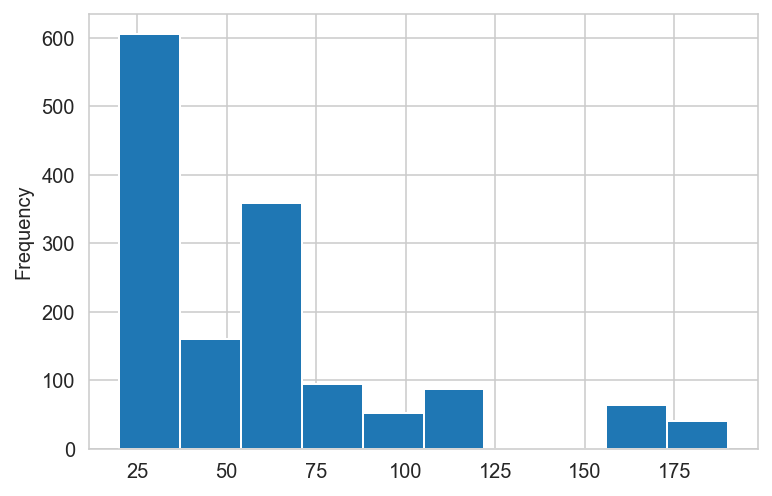

In [88]:
house.MSSubClass.plot(kind = 'hist')

# Fixed

### MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

### MSSubClass Rearranged

Regrouping on the basis of age of dwelling and presence of foyer / split levels as these factors affect prices.

(MSSubClass: Identifies the type of dwelling involved in the sale.)	

             
     OLD
        30	1-STORY 1945 & OLDER
        70	2-STORY 1945 & OLDER

    NEW
        20	1-STORY 1946 & NEWER ALL STYLES
        60	2-STORY 1946 & NEWER
       160	2-STORY PUD - 1946 & NEWER        
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

    ALL
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES   
        75	2-1/2 STORY ALL AGES
        90	DUPLEX - ALL STYLES AND AGES
       150	1-1/2 STORY PUD - ALL AGES
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

    SPL_FOY
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

In [89]:
# Minimize MSSubClass categories
 
def recat_mssubclass(subclass):
    mssubclass_dict = {20:'new',30:'old',40:'all',45:'all',50:'all',60:'new',70:'old',
                       75:'all',80:'spl_foy', 85:'spl_foy',90:'all',120:'new',150:'all', 
                       160:'new',180:'spl_foy',190:'all'}
        
    return mssubclass_dict[subclass]

house['r_MSSubClass'] = house['MSSubClass'].apply(recat_mssubclass)

house.r_MSSubClass.value_counts()

new        985
all        258
old        129
spl_foy     88
Name: r_MSSubClass, dtype: int64

# Fixed

### MSZoning: Identifies the general zoning classification of the sale.

dropping non-residential units

In [90]:
# house = house[house.MSZoning != 'C (all)']   # will be done post EDA
house.shape

(1450, 82)

In [91]:
house.MSZoning.value_counts(dropna=False)

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

 # Fixed
 
 ### LotFrontage: Linear feet of street connected to property	

In [92]:
house['LotFrontage'].value_counts(dropna = False);

In [93]:
house.LotFrontage.mean(),  house.LotFrontage.median()

(70.0528967254408, 70.0)

In [94]:
house.LotFrontage.mode()[0]

60.0

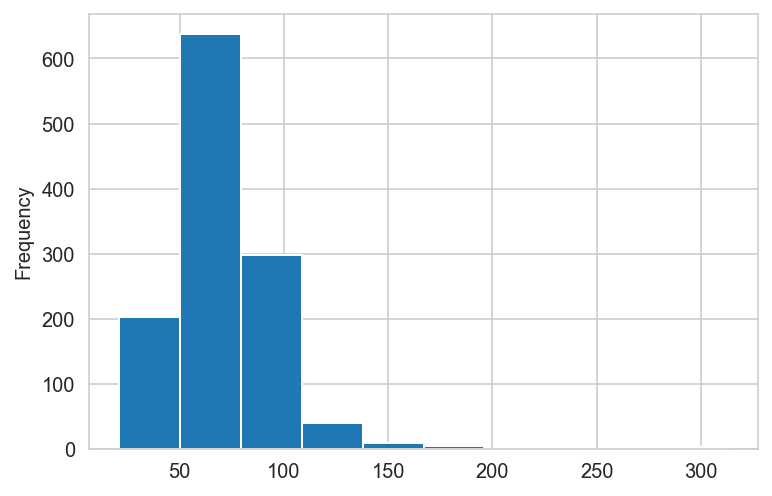

In [95]:
house['LotFrontage'].plot(kind = 'hist')

In [96]:
# lot_std = house_res.LotFrontage.std()
# lot_mean = house_res.LotFrontage.mean()

# out_do = lot_mean - (3*lot_std)
# out_up = lot_mean + (3*lot_std)

# # outlier = lot_mean +- 3*lost_std
# lot_std, lot_mean, out_do, out_up

# house_res[house_res['LotFrontage'] < out_up]['LotFrontage'].mean(), lot_mean

In [97]:
# house_res[house_res['LotFrontage'] < out_up]['LotFrontage'].median(), house_res.LotFrontage.median()

# the new popular 69 will replace the NaN's

In [98]:
# replacing NaN's with the mean value

house['LotFrontage'].fillna(value = house['LotFrontage'].mode()[0], inplace = True)

In [99]:
house['LotFrontage'].value_counts(dropna = False)

60.0     398
70.0      70
80.0      69
50.0      55
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

# Fixed

### LotArea: Lot size in square feet	

In [100]:
house.LotArea.value_counts(dropna = False)

9600     24
7200     24
6000     17
8400     14
10800    14
         ..
7301      1
11394     1
7094      1
16226     1
8190      1
Name: LotArea, Length: 1070, dtype: int64

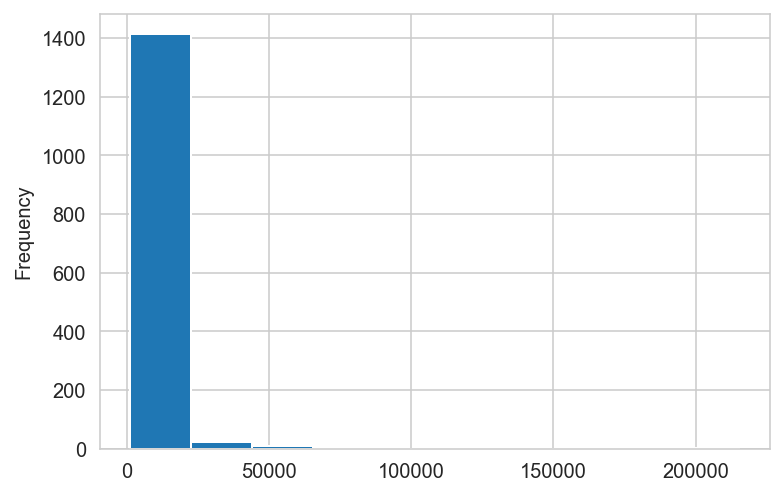

In [101]:
house.LotArea.plot(kind ='hist')

# find another way to make histogram

 # Fixed
 
 ### Street: Type of road access	

In [102]:
house.Street.value_counts(dropna = False)

Pave    1446
Grvl       4
Name: Street, dtype: int64

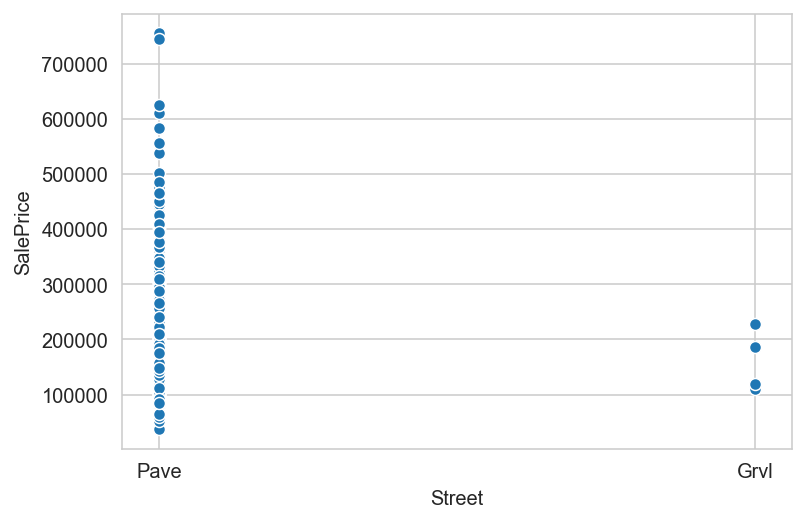

In [103]:
sns.scatterplot(x=house.Street,y=house.SalePrice)

Given the clustering around houses with gravel street, we can let the model identify the relationship between the street type and house price.

In [104]:
# house['Street'].get_dummies(columns = house.Street)
# find out how to do it

# Fixed

### Alley: Type of alley access

In [105]:
house.Alley.value_counts(dropna = False)

NaN     1361
Grvl      50
Pave      39
Name: Alley, dtype: int64

no_alley    1361
Grvl          50
Pave          39
Name: Alley_nona, dtype: int64


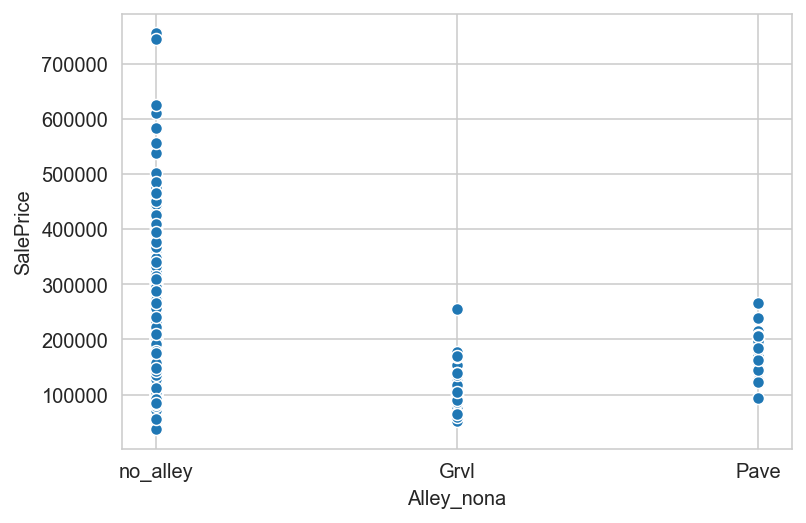

In [106]:
# if NaN, 0, 1 and 2 - dummy

house['Alley_nona'] = house.Alley.fillna(value = 'no_alley')

vp('Alley_nona')

# Fixed

### LotShape: General shape of property

In [107]:
house.LotShape.value_counts(dropna = False)

Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [108]:
# not group IR2 & IR3 - 4 dummies
# total 4 categories

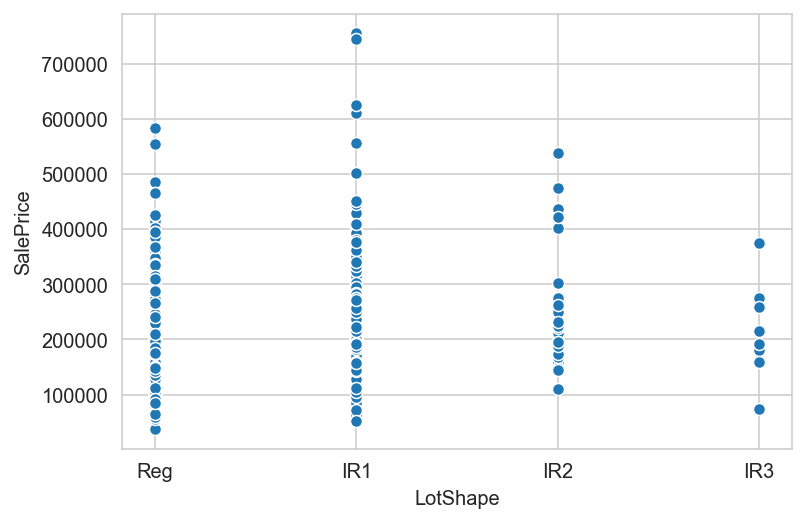

In [109]:
sns.scatterplot(x=house.LotShape,y=house.SalePrice)

# Fixed
### LandContour: Flatness of the property

In [110]:
house.LandContour.value_counts(dropna = False)

Lvl    1305
Bnk      62
HLS      49
Low      34
Name: LandContour, dtype: int64

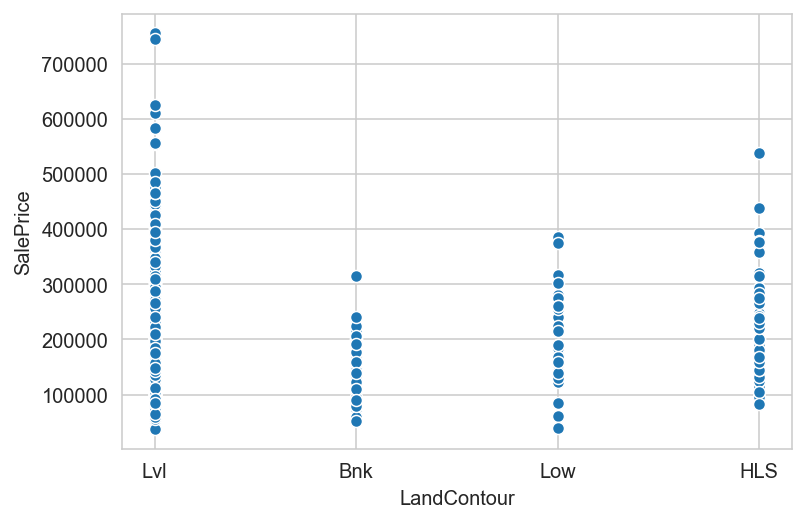

In [111]:
sns.scatterplot(x=house.LandContour,y=house.SalePrice)

In [112]:
# 4 diff groups

 # Renovatable
 
 ### Utilities: Type of utilities available

In [113]:
house.Utilities.value_counts(dropna = False)
# not including in predictor

AllPub    1449
NoSeWa       1
Name: Utilities, dtype: int64

#  Fixed
### LotConfig: Lot configuration

In [114]:
house.LotConfig.value_counts(dropna = False)

Inside     1044
Corner      261
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

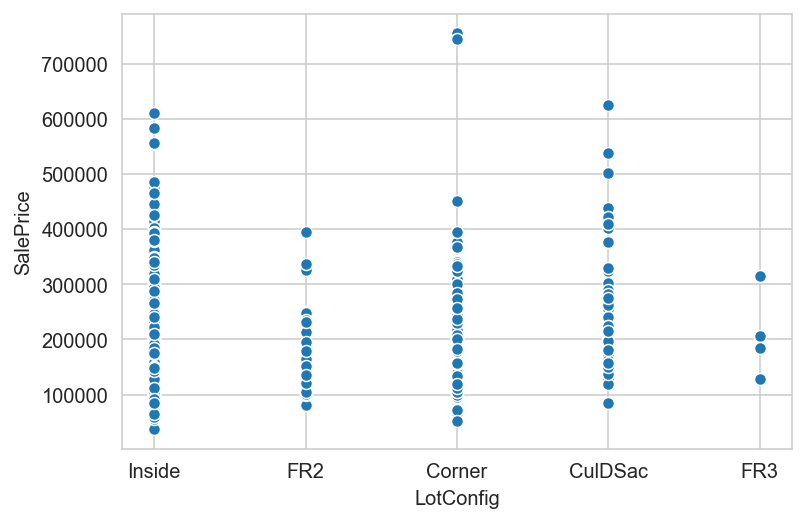

In [115]:
sns.scatterplot(x=house.LotConfig,y=house.SalePrice)

In [116]:
# 5 groups (not FR2/3 together)

# Fixed

### LandSlope: Slope of property

In [117]:
house.LandSlope.value_counts(dropna = False)

Gtl    1375
Mod      62
Sev      13
Name: LandSlope, dtype: int64

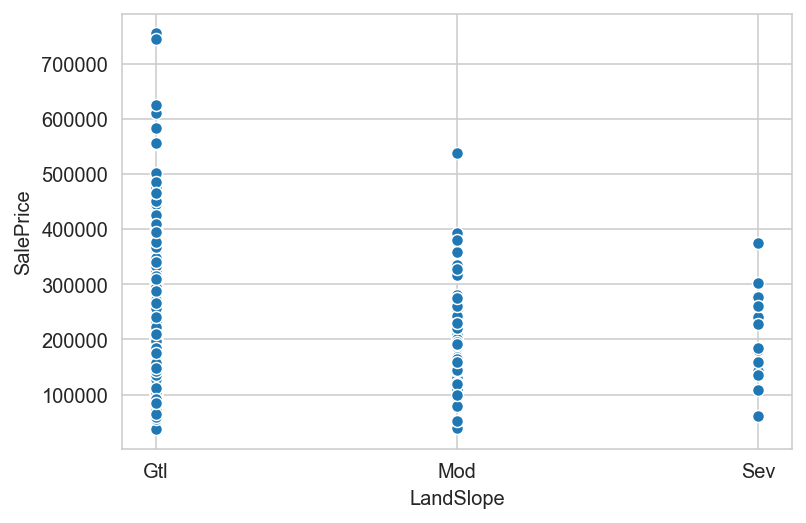

In [118]:
sns.scatterplot(x=house.LandSlope,y=house.SalePrice)

In [119]:
# 3 different groups - dummies

# Fixed

### Neighborhood: Physical locations within Ames city limits	

In [120]:
house.Neighborhood.value_counts(dropna = False)

NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      28
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [121]:
house.Neighborhood.value_counts(dropna = False).head(13).sum()/house.shape[0]

0.8227586206896552

In [122]:
# As 82% of the houses are within top 13 neighbourhoods, I will recategorise the remaining neighbourhoods into a 14th category.

low_12 = list(house.Neighborhood.value_counts(dropna = False).tail(12).index)

house['r_Neighborhood'] = house['Neighborhood'].apply(lambda x: 'low' if x in low_12 else x)
house['r_Neighborhood'].value_counts(dropna=False)

low        257
NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Name: r_Neighborhood, dtype: int64

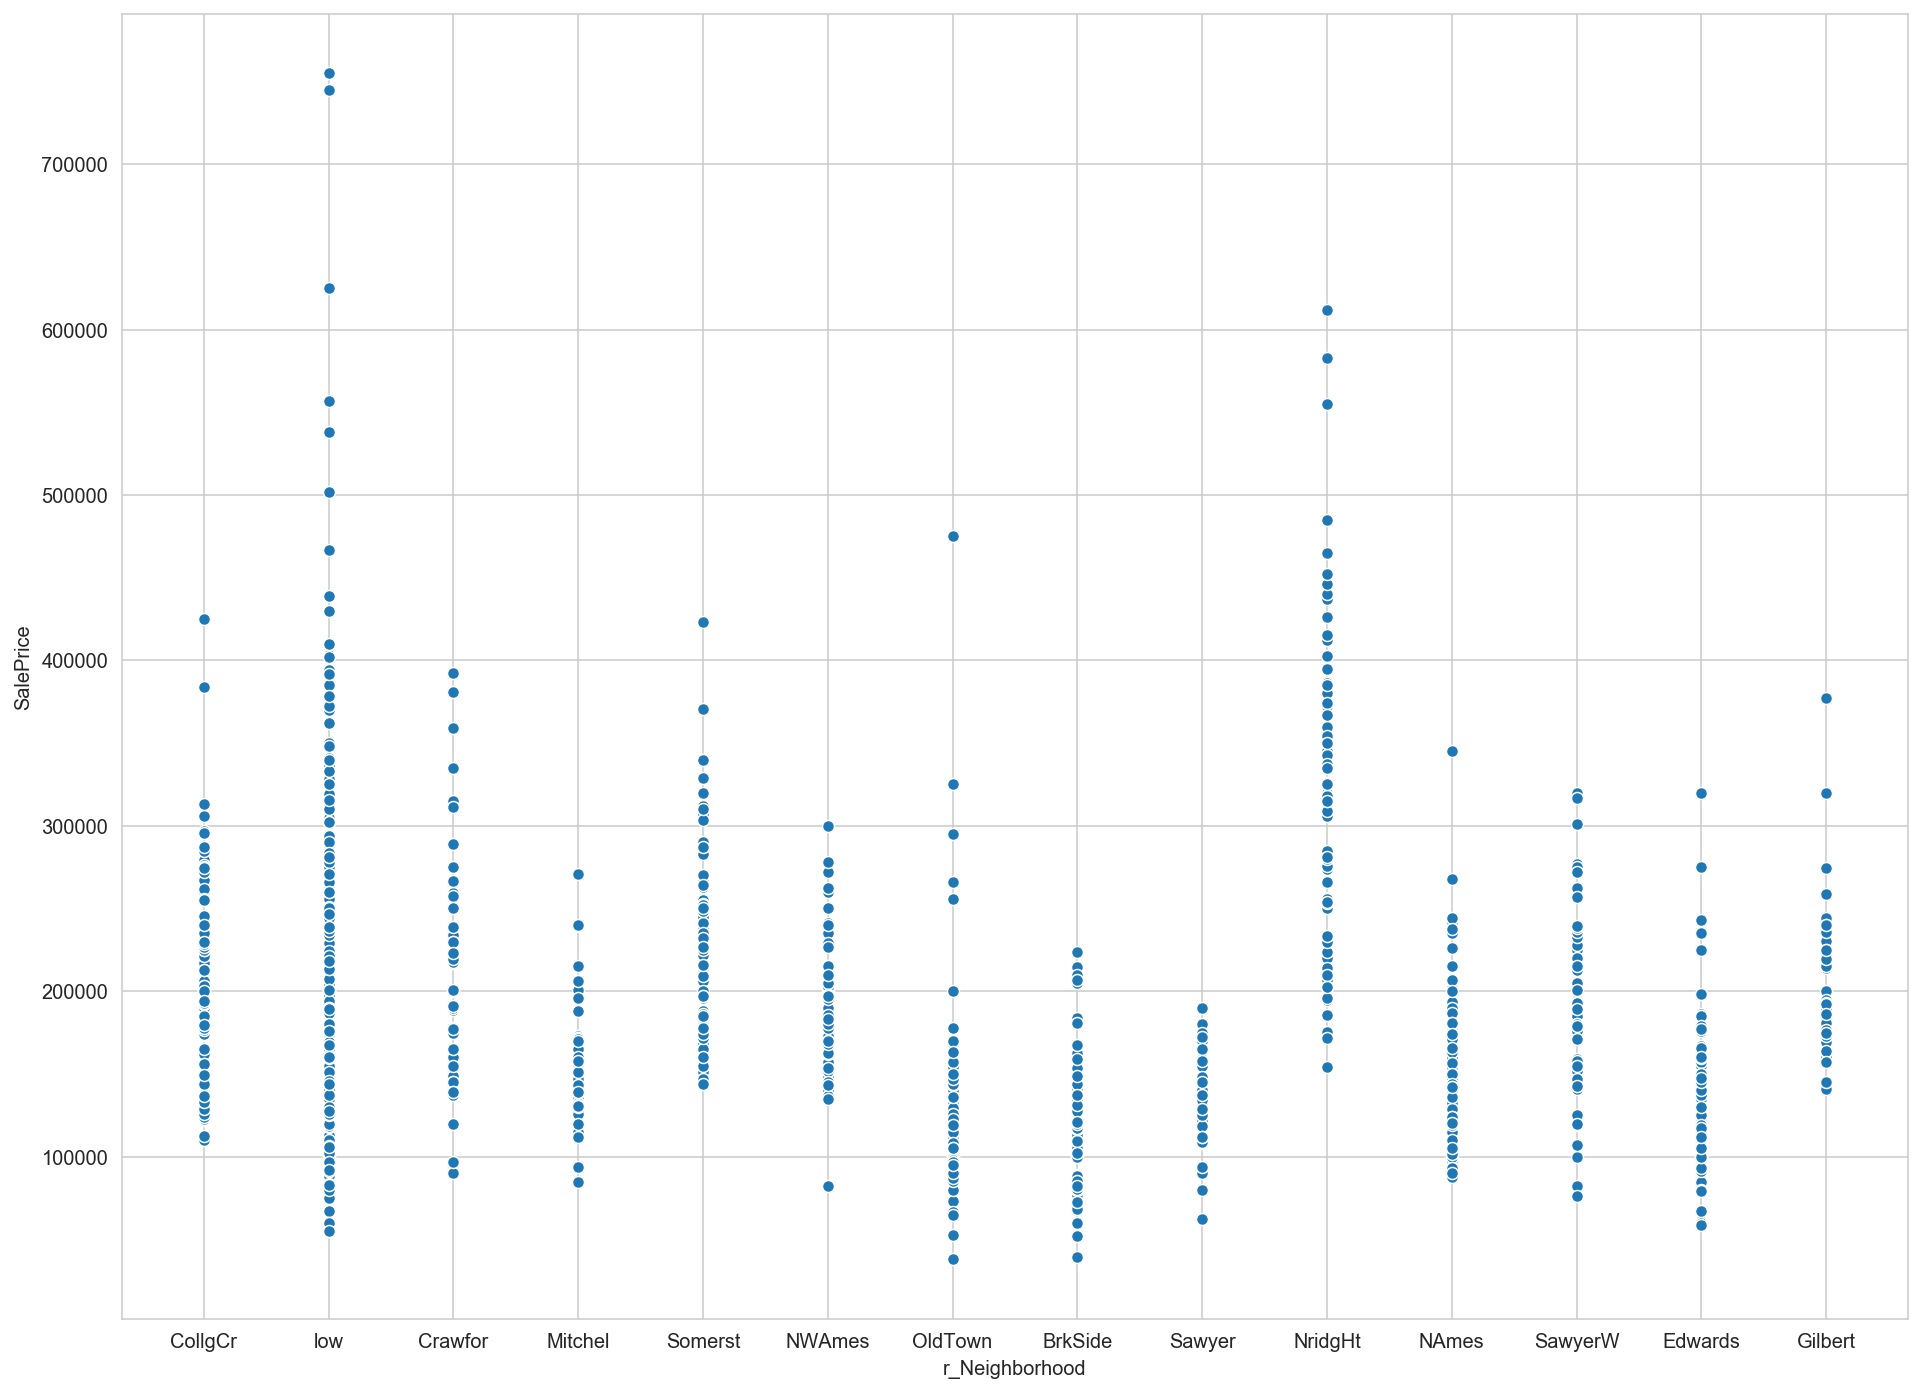

In [123]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=house.r_Neighborhood,y=house.SalePrice)

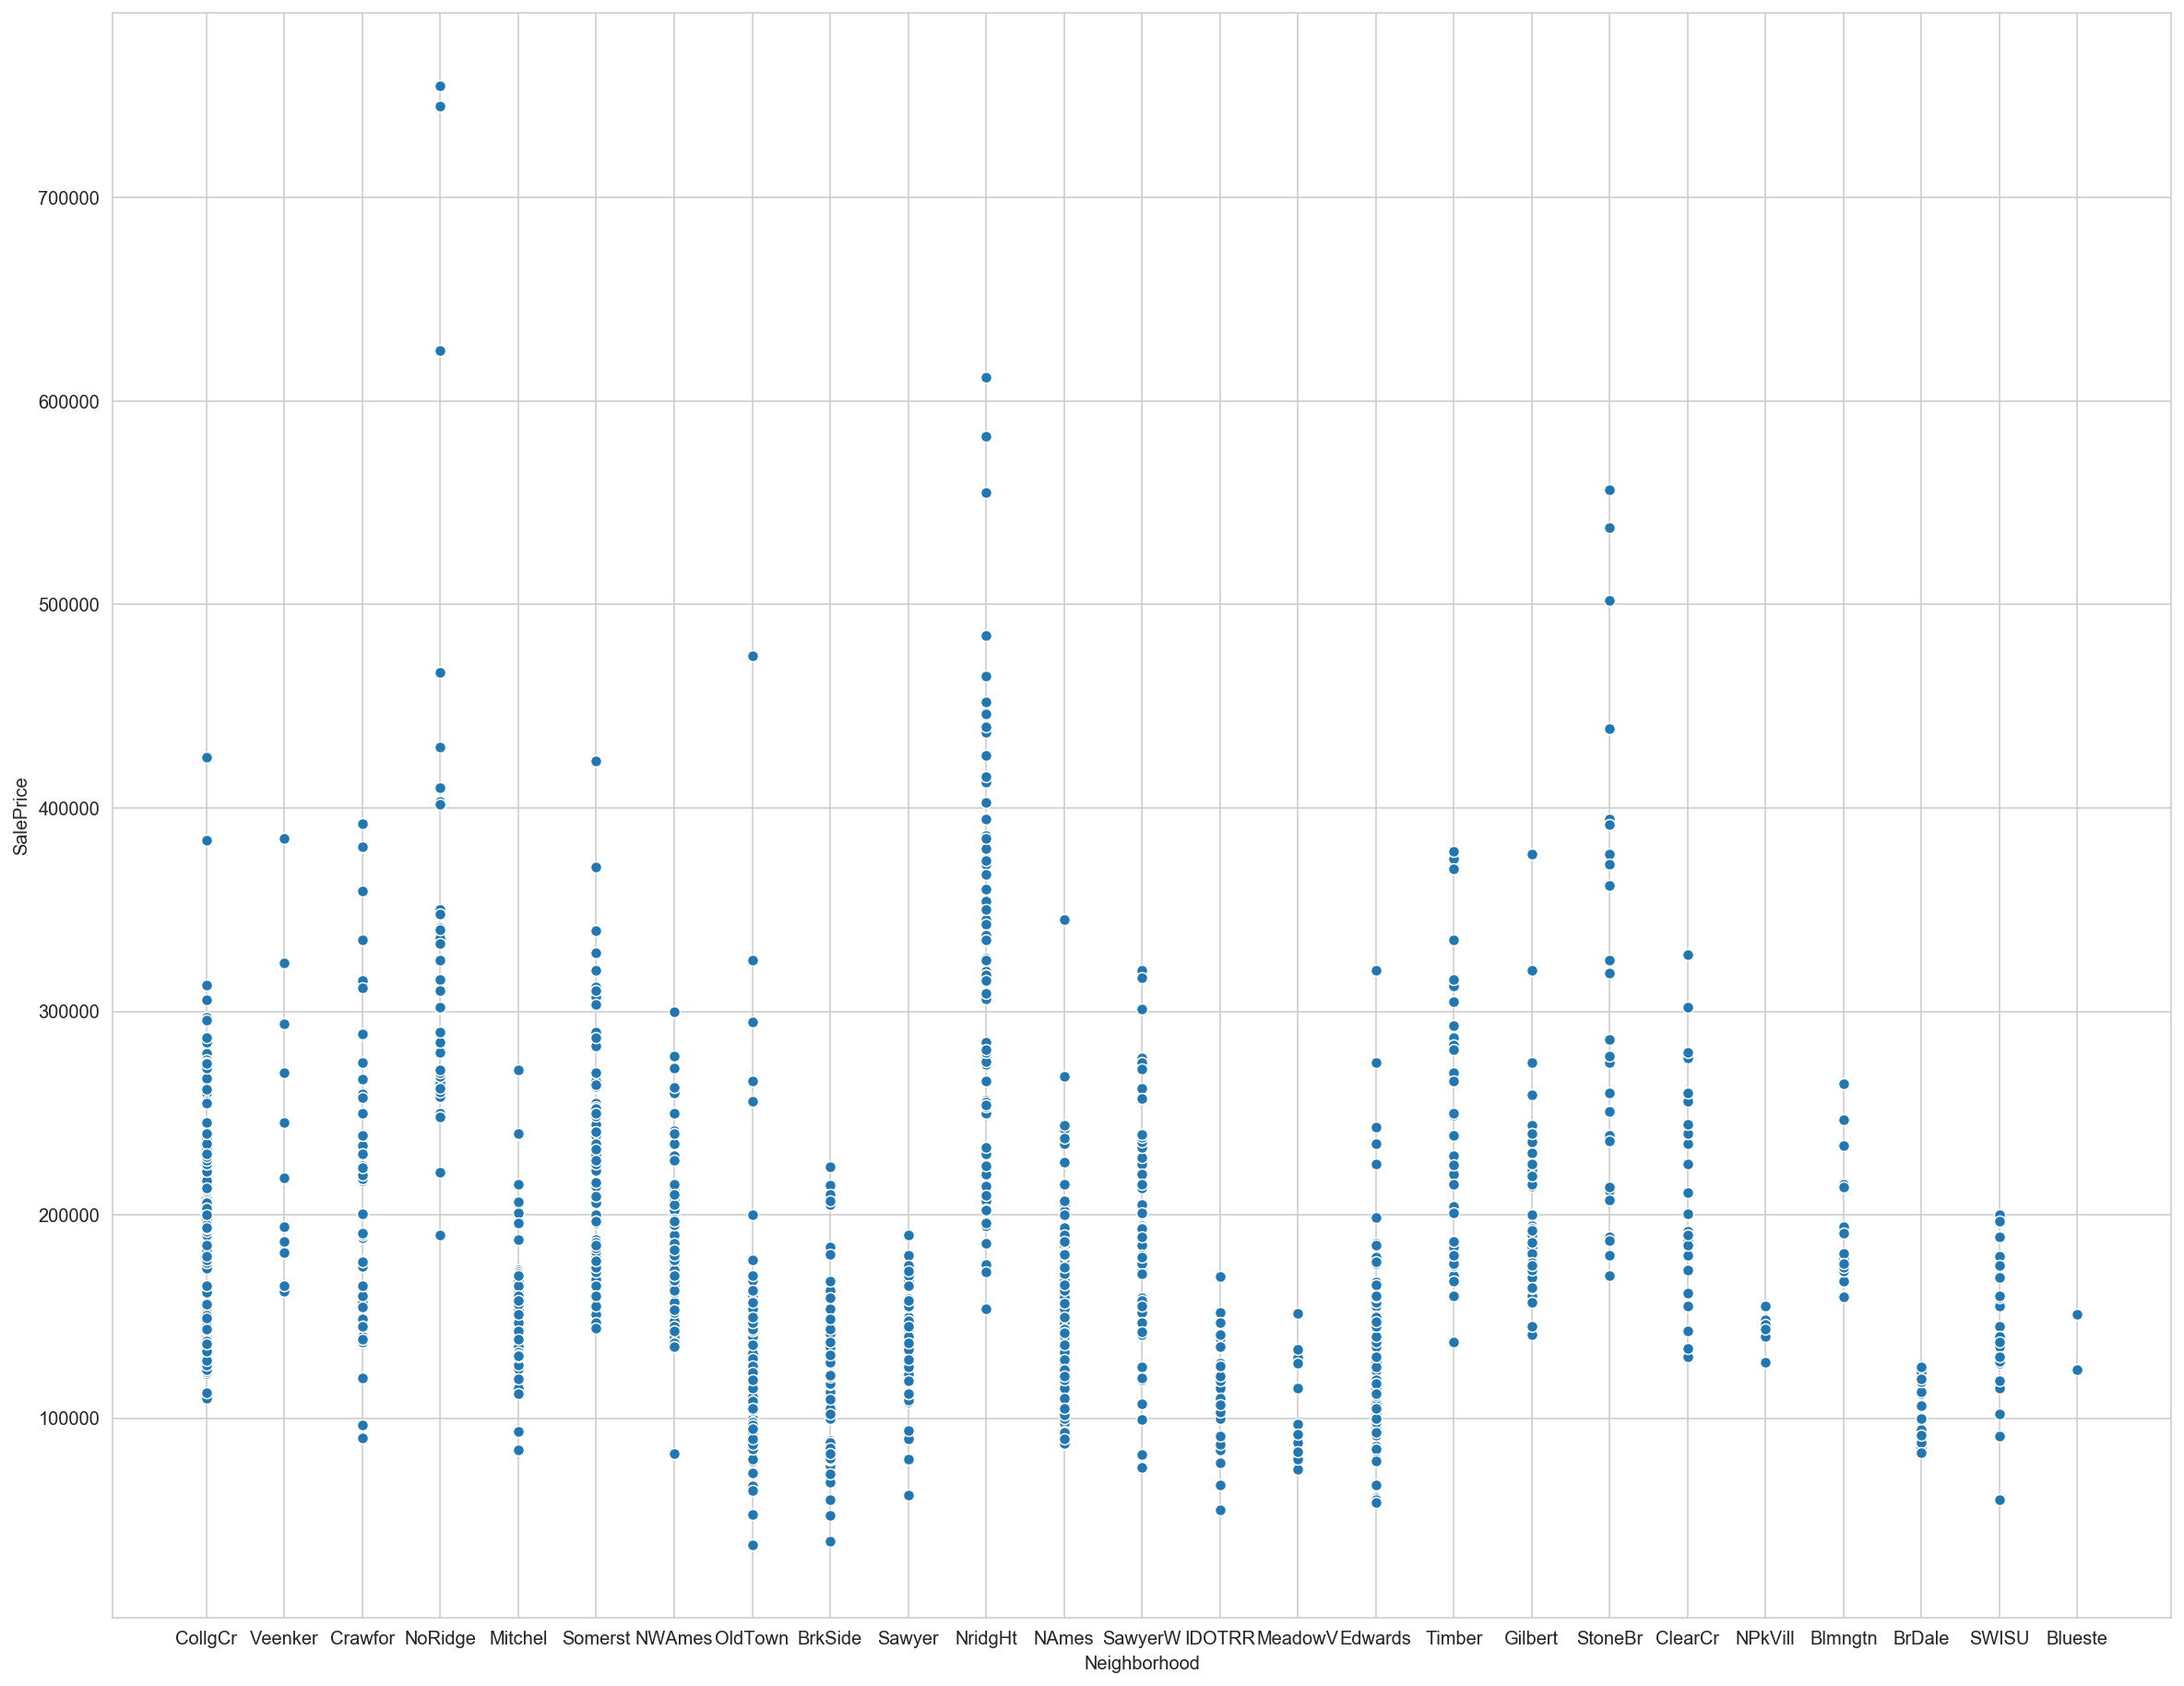

In [124]:
plt.figure(figsize=(20,16))
sns.scatterplot(x=house.Neighborhood,y=house.SalePrice)

In [125]:
print(sorted(house.Neighborhood.unique()))


['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [126]:
# 25 different groups

# OR

# 5 groups based on 
# https://rstudio-pubs-static.s3.amazonaws.com/337439_24918eaefe724411be93e41ede48b256.html



# OR
# 14 groups - Arnab's idea

Neighborhood: Physical locations within Ames city limits

**North**

       Blmngtn	Bloomington Heights
       BrkSide	Brookside
       Gilbert	Gilbert
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights       
       BrDale	Briardale
       IDOTRR	Iowa DOT and Rail Road
       NWAmes	Northwest Ames
       OldTown	Old Town       
       Somerst	Somerset
       StoneBr	Stone Brook       
       Veenker	Veenker
     
     
**West**

       Sawyer	Sawyer
       SawyerW	Sawyer West
       ClearCr	Clear Creek 
       Edwards	Edwards       
       CollgCr	College Creek       
       
       
**Central**   

       SWISU	South & West of Iowa State University
       Crawfor	Crawford
       Blueste	Bluestem


**South**

       MeadowV	Meadow Village
       Mitchel	Mitchell
       Timber	Timberland

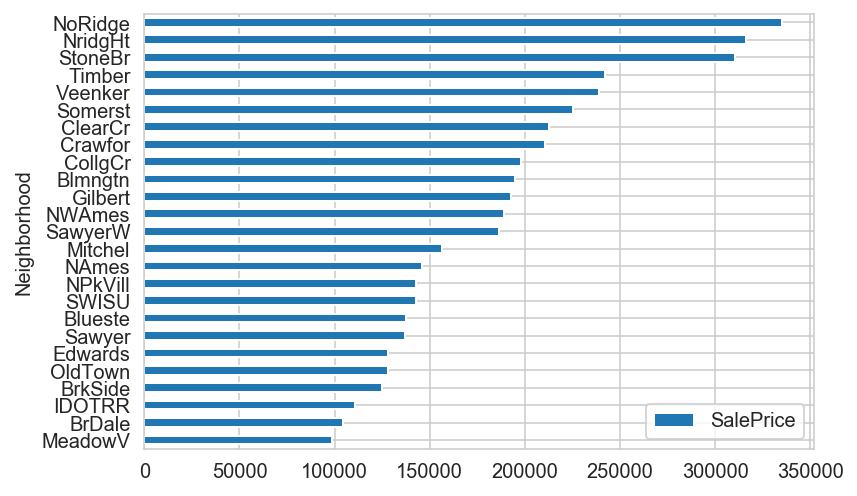

In [127]:
house.groupby('Neighborhood').mean()[['SalePrice']].sort_values(by='SalePrice').plot(kind='barh')

In [128]:
# Complete & share 

# Minimize Neighborhood categories
 
# def recat_neighborhood(area):
#     neighbourhood_dict = {'Blmngtn': 'N', 'Blueste': 'C', 'BrDale': 'N', 
#                           'BrkSide': 'N', 'ClearCr', 'CollgCr', 
#                           'Crawfor', 'Edwards', 
#                           'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 
#                           'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 
#                           'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 
#                           'SawyerW', 'Somerst', 'StoneBr', 'Timber', 
#                           'Veenker'}
        
#     return neighbourhood_dict[area]

# house['Neighborhood_recat'] = house['MSSubClass'].apply(recat_mssubclass)

# house.MSSubClass_recat.value_counts()

# Fixed

### Condition1: Proximity to main road or railroad

In [129]:
house.Condition1.value_counts(dropna = False)

Norm      1252
Feedr       79
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

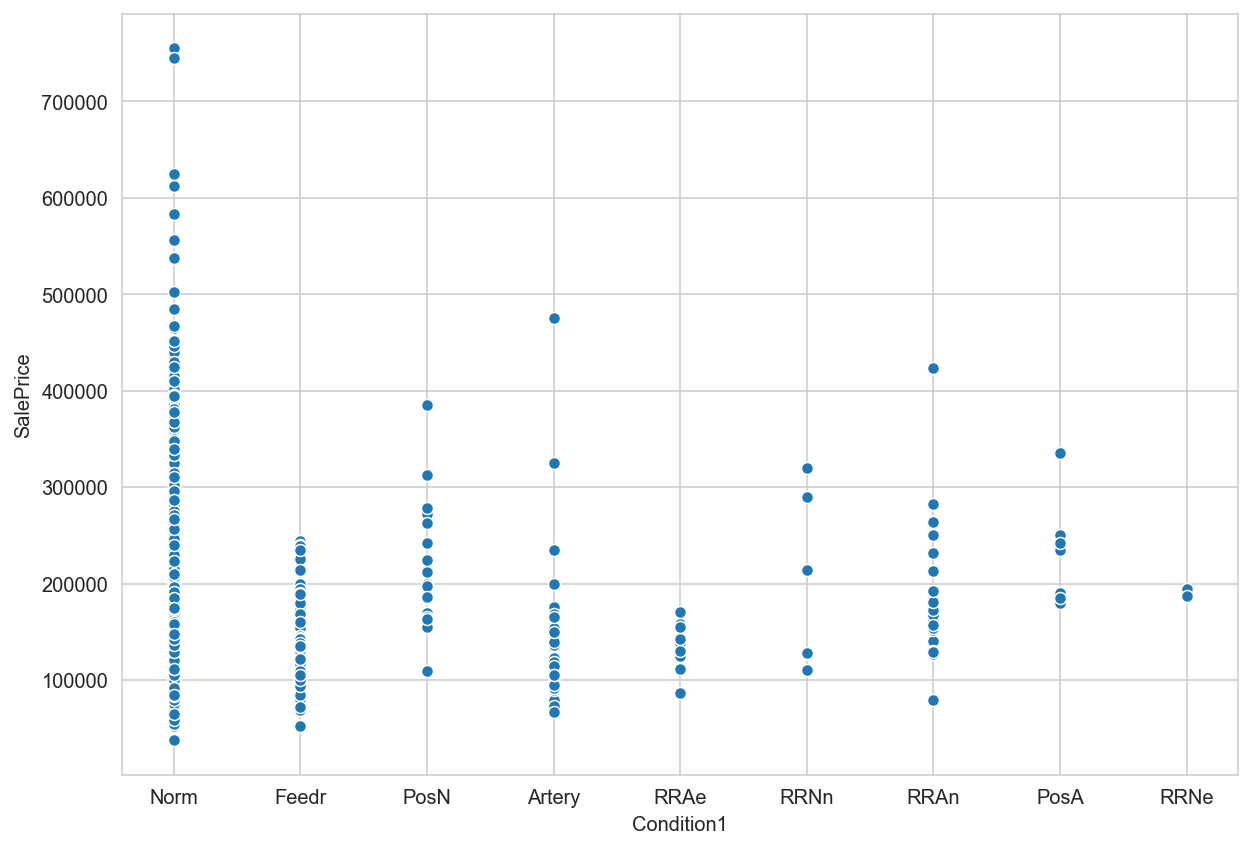

In [130]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=house.Condition1,y=house.SalePrice)

In [131]:
# Recatgorising from 9 to 6 as follows:
# 'Artery'
# 'Feedr'
# 'Norm'
# 'NS'     - RRNn (Within 200' of North-South Railroad) & RRAn (Adjacent to North-South Railroad)
# 'EW'     - RRNe (Within 200' of East-West Railroad) & RRAe (Adjacent to East-West Railroad)
# 'off'    - PosN (Near positive off-site feature--park, greenbelt, etc.) & PosA (Adjacent to postive off-site feature)
       

In [132]:
house['r_Condition1'] = house['Condition1'].apply( lambda x: 'NS' if x == 'RRNn' or x == 'RRAn' else
                                                             'EW' if x == 'RRNe' or x == 'RRAe' else
                                                             'off' if x == 'PosN' or x == 'PosA'
                                                              else x )

In [133]:
house['r_Condition1'].value_counts(dropna=False)

Norm      1252
Feedr       79
Artery      48
NS          31
off         27
EW          13
Name: r_Condition1, dtype: int64

# Fixed - drop

### Condition2: Proximity to main road or railroad (if a second is present)

In [134]:
house.Condition2.value_counts(dropna = False)

Norm      1436
Feedr        5
PosN         2
RRNn         2
Artery       2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64

In [135]:
house[house.Condition1 != house.Condition2]['Condition2'].value_counts(dropna=False)

Norm     184
Feedr      5
RRNn       2
PosA       1
RRAn       1
RRAe       1
Name: Condition2, dtype: int64

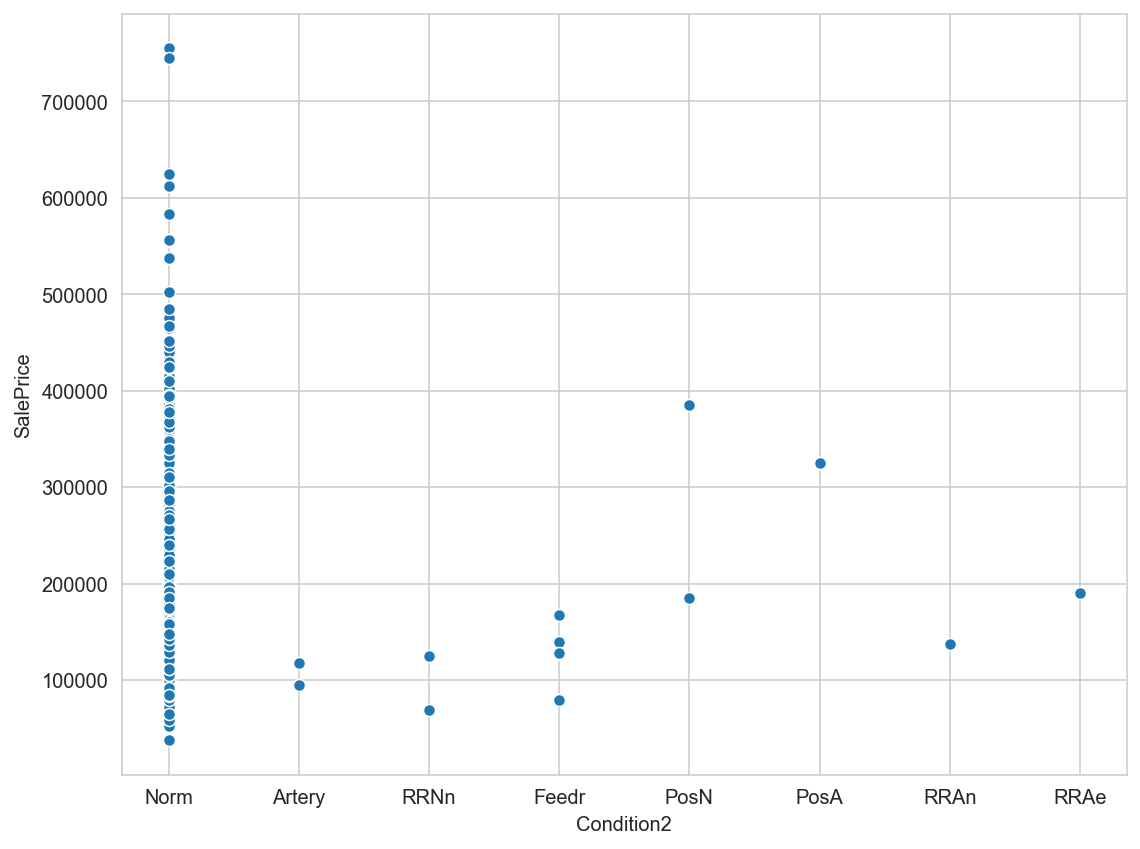

In [136]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=house.Condition2,y=house.SalePrice)

In [137]:
# dropping this columns as it has low variance and its information is included in Condition1

# Fixed

### BldgType: Type of dwelling

In [138]:
house.BldgType.value_counts(dropna = False)

1Fam      1211
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64

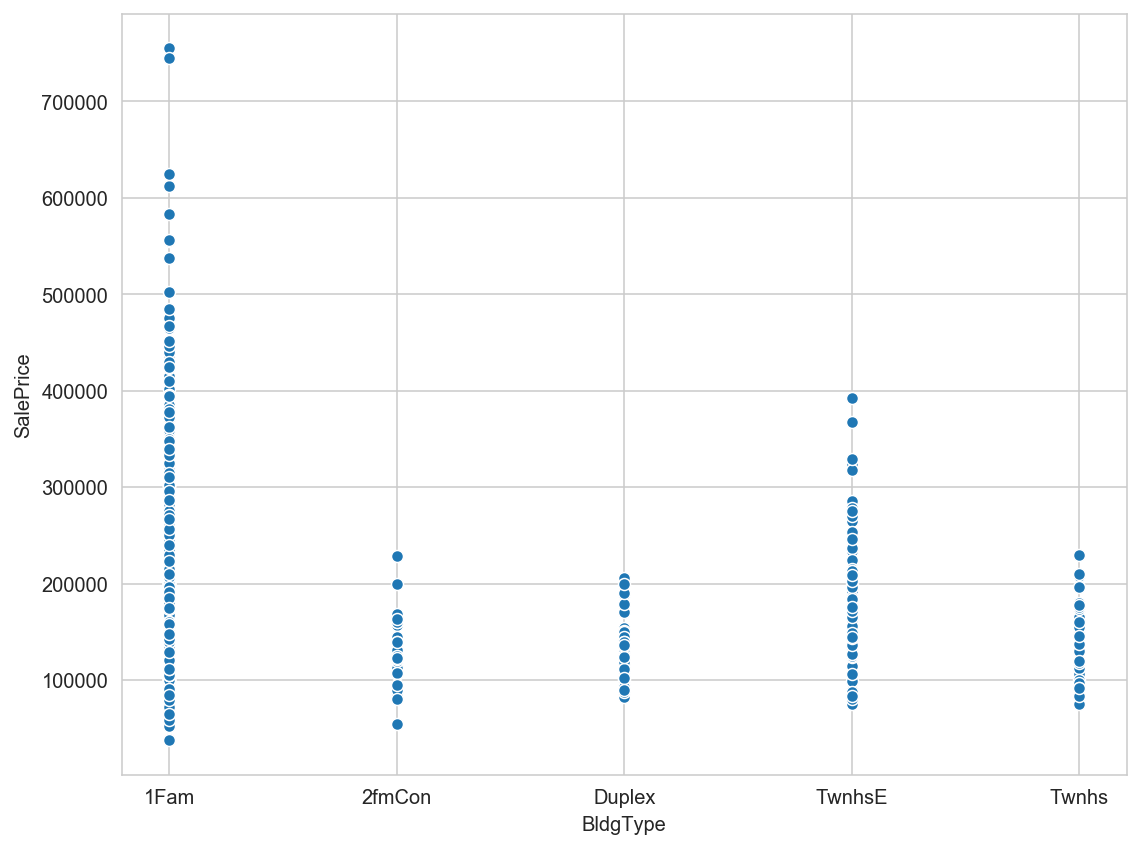

In [139]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = house.BldgType, y = house.SalePrice)

In [140]:
# 5 groups - get dummies

# Fixed 
### HouseStyle: Style of dwelling

In [141]:
house.HouseStyle.value_counts(dropna = False)

1Story    722
2Story    444
1.5Fin    150
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     10
2.5Fin      8
Name: HouseStyle, dtype: int64

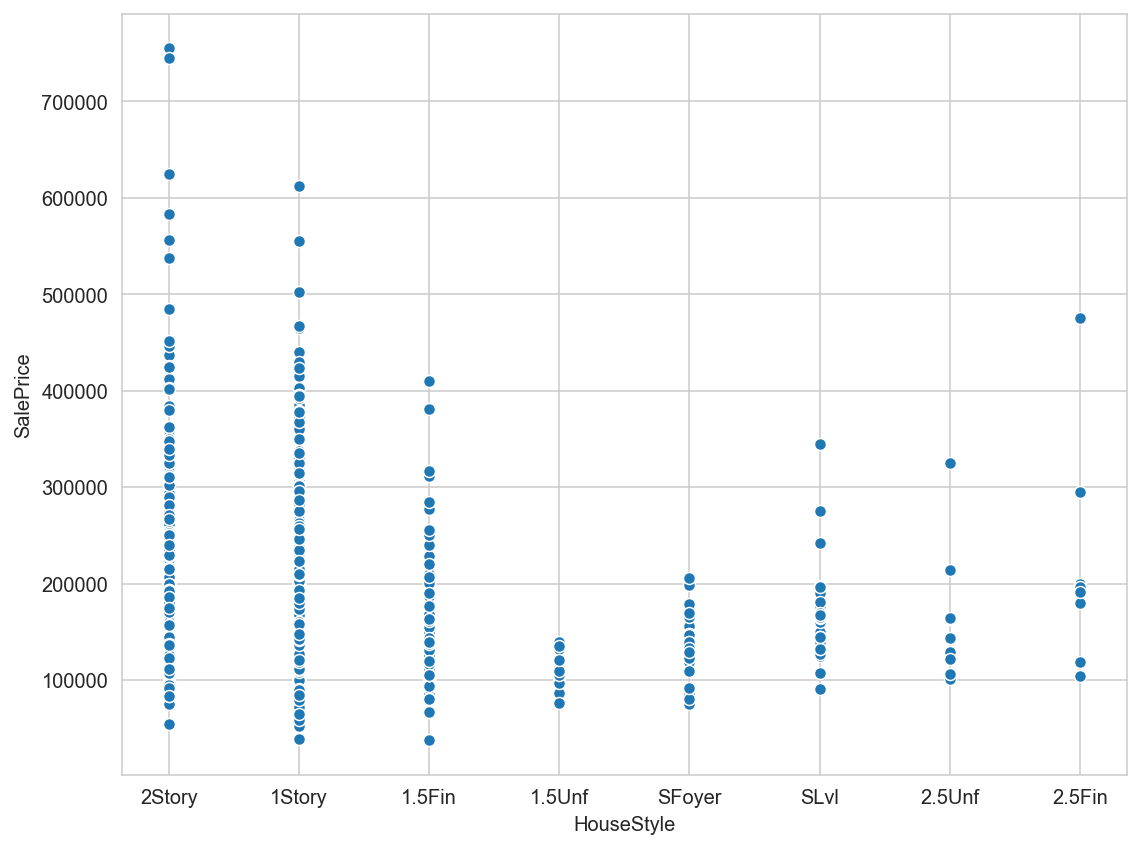

In [142]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = house.HouseStyle, y = house.SalePrice)

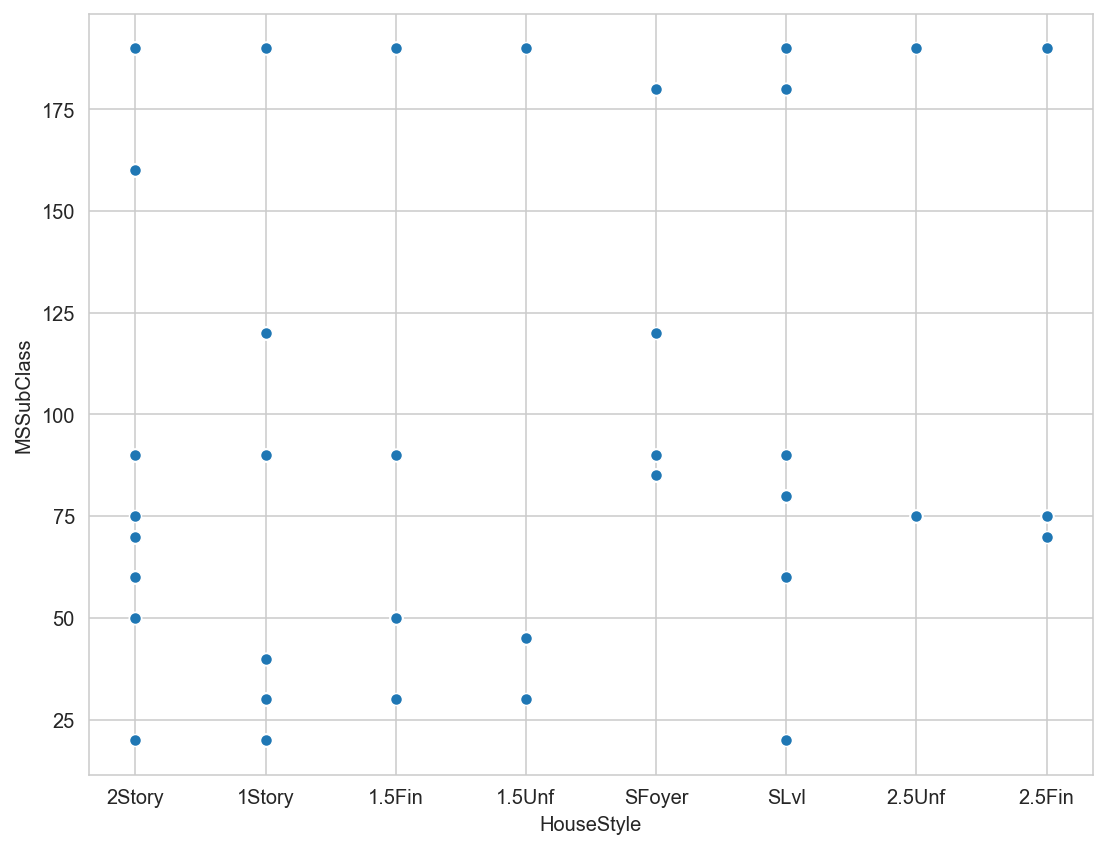

In [143]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = house.HouseStyle, y = house.MSSubClass)

In [144]:
# 9 groups - get dummies

# Renovatable
### OverallQual: Overall material and finish quality

In [145]:
house.OverallQual.value_counts(dropna = False)

5     396
6     373
7     319
8     168
4     111
9      43
10     18
3      18
2       2
1       2
Name: OverallQual, dtype: int64

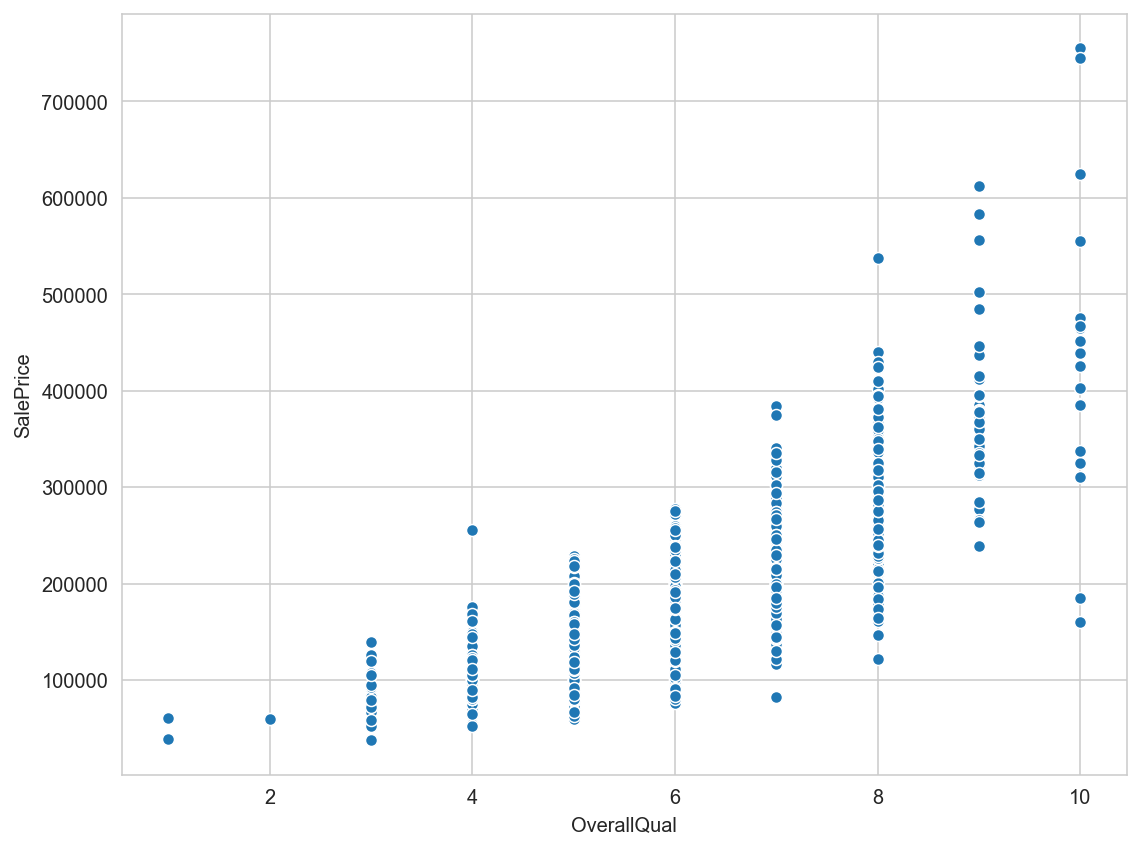

In [146]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = house.OverallQual, y = house.SalePrice)

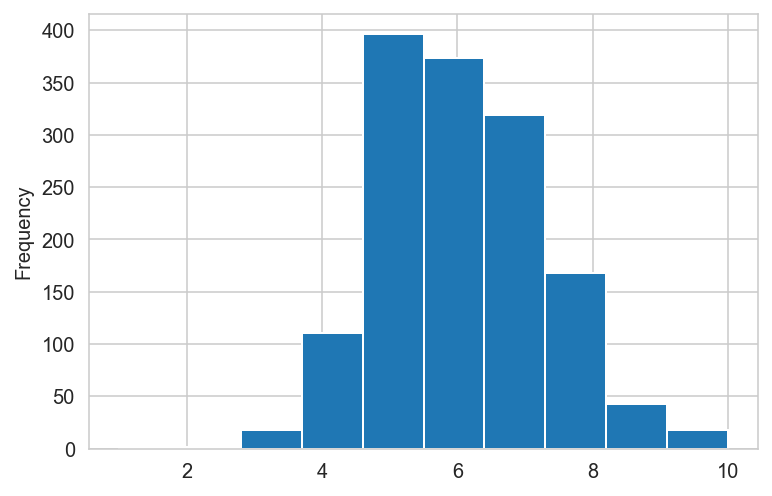

In [147]:
house.OverallQual.plot(kind = 'hist')

In [148]:
# not keep numerical (ordinal) - making categorical

# https://www.youtube.com/watch?v=OTPz5plKb40&t=34s

# string the values

house['OverallQual'] = house['OverallQual'].astype(str)

In [149]:
house['OverallQual'].dtype

dtype('O')

# Renovatable
### OverallCond: Overall condition rating

In [150]:
house.OverallCond.value_counts(dropna = False)

5    819
6    250
7    204
8     72
4     54
3     24
9     22
2      4
1      1
Name: OverallCond, dtype: int64

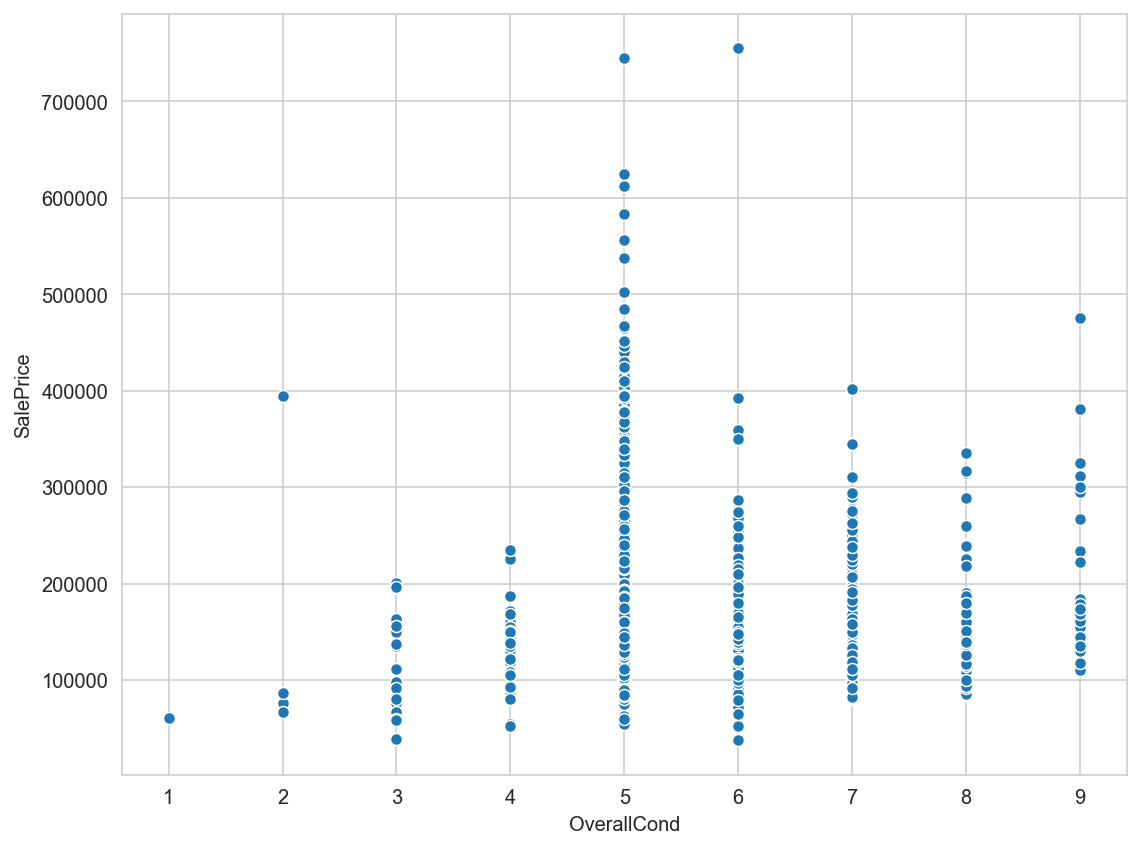

In [151]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = house.OverallCond, y = house.SalePrice)

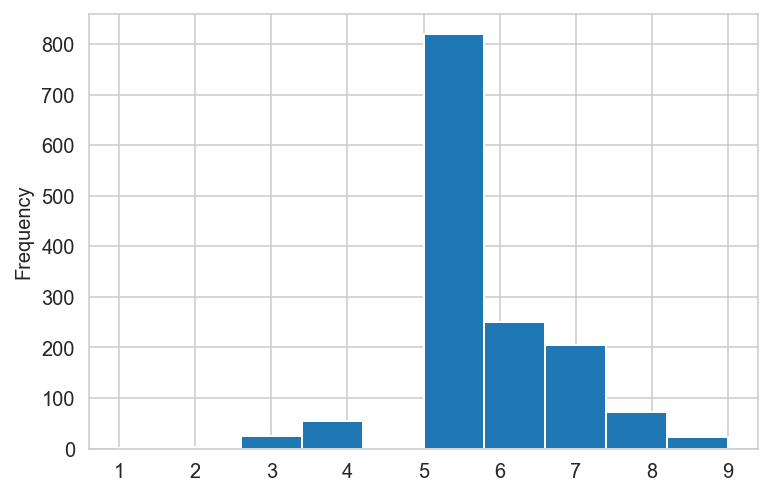

In [152]:
# plt.figure(figsize=(9,7))
house.OverallCond.plot(kind = 'hist')

In [153]:
# not keep numerical (ordinal) - making categorical
# https://www.youtube.com/watch?v=OTPz5plKb40&t=34s

In [154]:
# string the values

house['OverallCond'] = house['OverallCond'].astype(str)

In [155]:
house['OverallQual'].dtype

dtype('O')

# Fixed

### YearBuilt: Original construction date

In [156]:
house.YearBuilt.value_counts(dropna=False)

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [157]:
house.YrSold.value_counts(dropna=False)

2009    336
2007    328
2006    312
2008    302
2010    172
Name: YrSold, dtype: int64

In [158]:
house['Age'] = 2010 - house.YearBuilt

In [159]:
house.Age.value_counts(dropna=False)

4      67
5      64
6      54
3      49
7      45
       ..
106     1
112     1
117     1
128     1
0       1
Name: Age, Length: 112, dtype: int64

In [160]:
house.Age.describe()

count    1450.000000
mean       38.406897
std        30.022696
min         0.000000
25%         9.000000
50%        37.000000
75%        56.000000
max       138.000000
Name: Age, dtype: float64

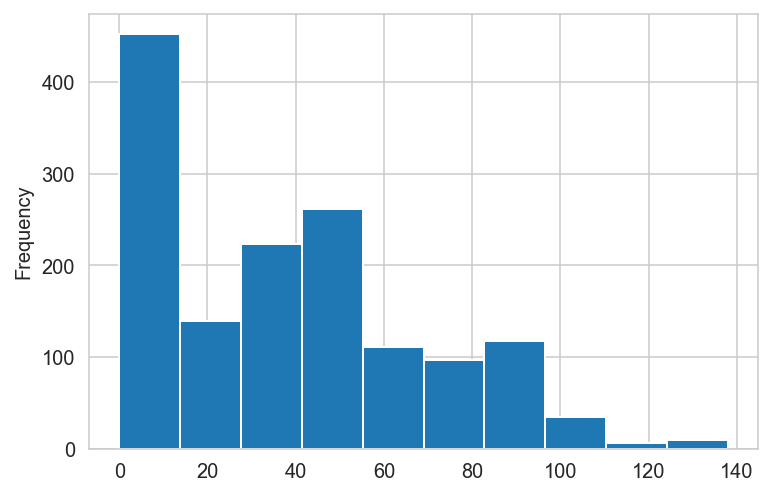

In [161]:
house.Age.plot(kind='hist')

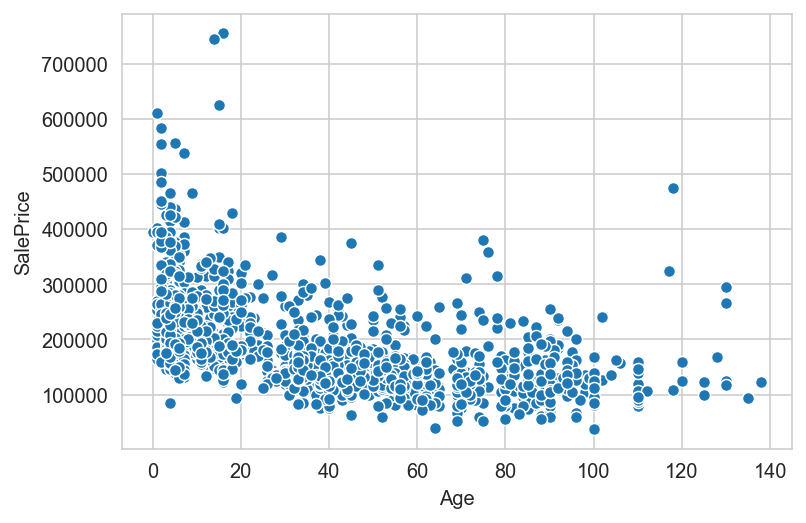

In [162]:
sns.scatterplot(x = house['Age'], y = house.SalePrice)

In [163]:
house[['Age', 'SalePrice']].corr()

Age  SalePrice
Age        1.000000  -0.517602
SalePrice -0.517602   1.000000

In [164]:
import numpy as np

house['Age_pow2'] = np.power(house['Age'], 2)
house[['Age_pow2', 'SalePrice']].corr();
# correlation got worse!

In [165]:
house['Age_sqrt'] = np.sqrt(house['Age'])
house[['Age_sqrt', 'SalePrice']].corr();
# correlation a bit better!

In [166]:
house['Age_inv'] = 1/(house['Age'])
house[['Age_inv', 'SalePrice']].corr()
# correlation is the best!

Age_inv  SalePrice
Age_inv    1.00000    0.45556
SalePrice  0.45556    1.00000

In [167]:
house['Age_log'] = np.log(house['Age'])
house[['Age_log', 'SalePrice']].corr()
# correlation a bit better!

C:\Users\surbh\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Age_log  SalePrice
Age_log    1.000000  -0.580234
SalePrice -0.580234   1.000000

In [168]:
# consider using either Age or inverse of Age

# Fixed

### YearRemodAdd: Remodel date

In [169]:
#REDOOO
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

# no remod
# # yr after renov


# house['Remod/Add_testing'] = np.array(['new' if j==i else 'less_5yrs' if ((j-i > 0) & (j-i<=5)) 
#                                      else '6-15yrs' if ((j-i > 6) & (j-i<=15)) else 'over_15yrs' 
#                                   for i,j in house[['YearBuilt','YearRemodAdd']].values])





house.YearRemodAdd.value_counts(dropna=False);

In [170]:
house[house.YearBuilt == house.YearRemodAdd].YearRemodAdd.value_counts(dropna=False);

In [171]:
house[house.YearBuilt != house.YearRemodAdd].YearRemodAdd.describe()

count     687.000000
mean     1987.030568
std        22.128052
min      1950.000000
25%      1970.000000
50%      1997.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [172]:
house.YearRemodAdd.max()

2010

In [173]:
house['RemodAge'] = 2010 - house.YearRemodAdd

In [174]:
house['RemodAge'].value_counts(dropna=False)

60    171
4      97
3      76
5      73
6      62
     ... 
0       6
27      5
24      5
59      4
58      4
Name: RemodAge, Length: 61, dtype: int64

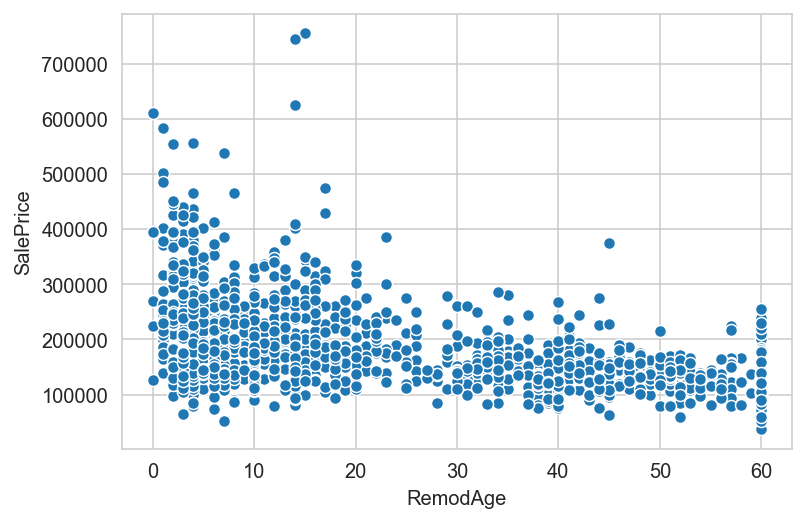

In [175]:
sns.scatterplot(x = house['RemodAge'], y = house.SalePrice)

In [176]:
house[['RemodAge', 'SalePrice']].corr()

RemodAge  SalePrice
RemodAge   1.000000  -0.501186
SalePrice -0.501186   1.000000

In [177]:
house['RemodAge_inv'] = 1/(house['RemodAge'])
house[['RemodAge_inv', 'SalePrice']].corr()
# correlation is worse

RemodAge_inv  SalePrice
RemodAge_inv      1.000000   0.408895
SalePrice         0.408895   1.000000

In [178]:
house['RemodAge_pow2'] = np.power(house['RemodAge'], 2)
house[['RemodAge_pow2', 'SalePrice']].corr()
# correlation got worse!

RemodAge_pow2  SalePrice
RemodAge_pow2       1.000000  -0.470908
SalePrice          -0.470908   1.000000

In [179]:
house['RemodAge_sqrt'] = np.sqrt(house['RemodAge'])
house[['RemodAge_sqrt', 'SalePrice']].corr()
# correlation a bit better!

RemodAge_sqrt  SalePrice
RemodAge_sqrt       1.000000  -0.513383
SalePrice          -0.513383   1.000000

In [180]:
house['RemodAge_log'] = np.log(house['RemodAge'])
house[['RemodAge_log', 'SalePrice']].corr()
# correlation is the best!

C:\Users\surbh\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RemodAge_log  SalePrice
RemodAge_log      1.000000  -0.504538
SalePrice        -0.504538   1.000000

### consider using either RemodAge or log of RemodAge

In [181]:
# house['Remod_Age'] = house['YearRemodAdd'].apply(lambda x: 0 if x == house['YearBuilt'] else 2010 - x)

In [182]:
# house['r_Remod_diff'] = house[['YearRemodAdd','YearBuilt']].apply(lambda x: 1 if x['YearRemodAdd'] != x['YearBuilt'] else 0)


house['r_Remod_diff'] = house.apply(lambda row: 1 if row['YearRemodAdd'] != row['YearBuilt'] else 0, axis=1)
house['r_Remod_diff'].value_counts(dropna=False)

0    763
1    687
Name: r_Remod_diff, dtype: int64

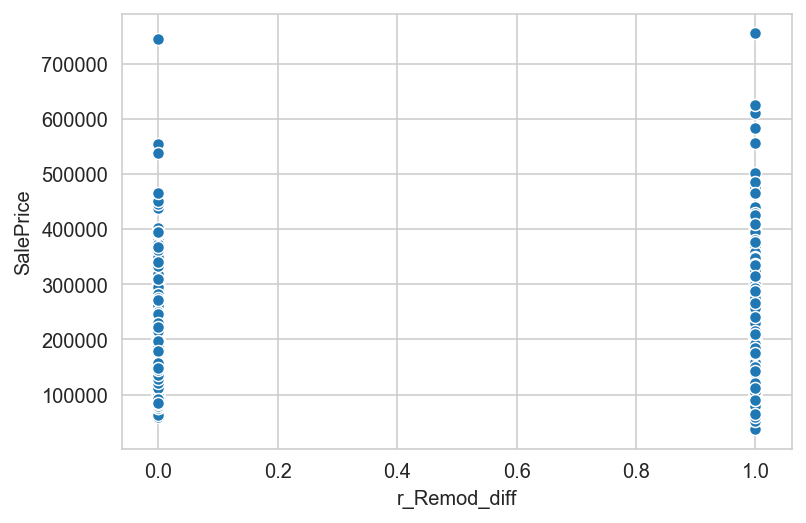

In [183]:
sns.scatterplot(x = house['r_Remod_diff'], y = house.SalePrice)

In [184]:
house.r_Remod_diff.dtype

dtype('int64')

In [185]:
# string the values

house['r_Remod_diff'] = house['r_Remod_diff'].astype(str)

In [186]:
# check
house.r_Remod_diff.dtype

dtype('O')

# Renovatable

### RoofStyle: Type of roof

In [187]:
house['RoofStyle'].value_counts(dropna=False)

Gable      1135
Hip         283
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

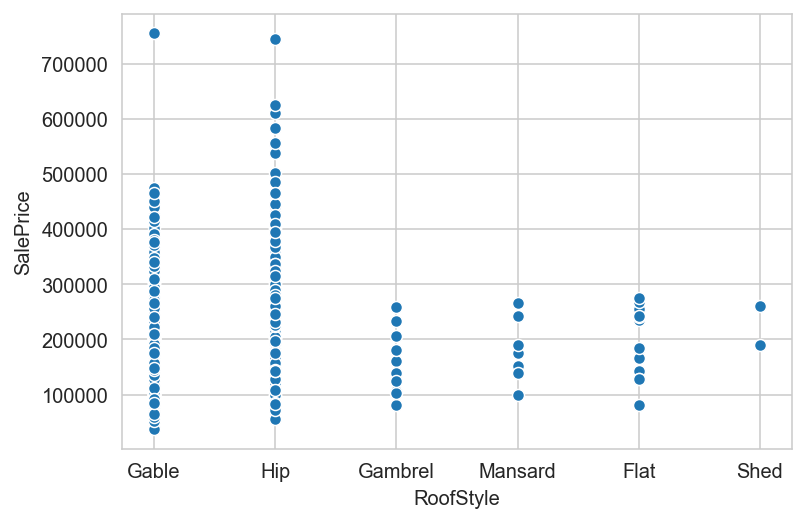

In [188]:
sns.scatterplot(x = house['RoofStyle'], y = house['SalePrice'])

In [189]:
# 3 groups based on clustering of Gambrel, Mansard, Flat & Shed styled roofs:
# Gable
# Hip
# others

# keep all 6 groups

In [190]:
house['RoofStyle'].value_counts(dropna=False)

Gable      1135
Hip         283
Flat         13
Gambrel      10
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

# Renovatable

### RoofMatl: Roof material

In [191]:
house['RoofMatl'].value_counts(dropna=False)

CompShg    1424
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

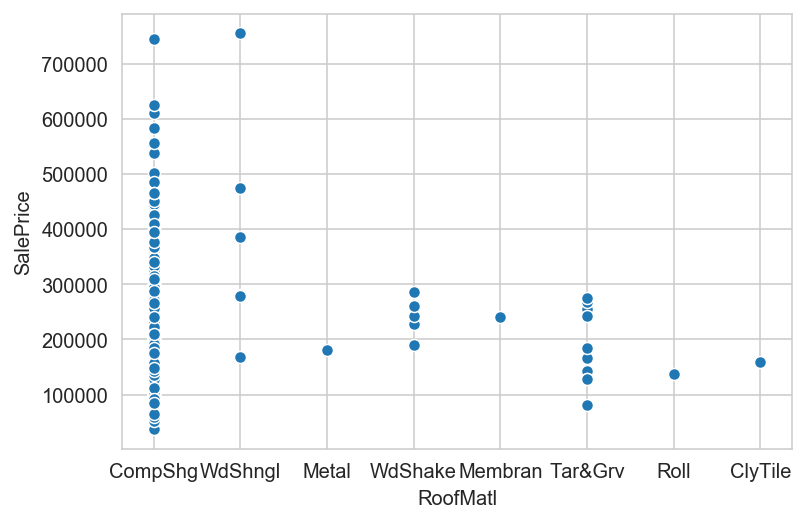

In [192]:
sns.scatterplot(x = house['RoofMatl'], y = house['SalePrice'])

In [193]:
# 3 groups based on the scatterplot above:
# Composite shingle
# Wood Shingles
# others


# keep all 8 groups

# Renovatable

### Exterior1st: Exterior covering on house
### Exterior2nd: Exterior covering on house (if more than one material)

In [194]:
house['Exterior1st'].value_counts(dropna=False)

VinylSd    515
HdBoard    222
MetalSd    215
Wd Sdng    204
Plywood    107
CemntBd     61
BrkFace     49
WdShing     26
Stucco      25
AsbShng     19
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [195]:
house['Exterior2nd'].value_counts(dropna=False)

VinylSd    504
MetalSd    209
HdBoard    207
Wd Sdng    195
Plywood    141
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     24
AsbShng     19
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [196]:
# only 215 diff values b/w two

# take both - dummy all 

# Renovatable

### MasVnrType: Masonry veneer type

In [197]:
house['MasVnrType'].value_counts(dropna=False)

None       854
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

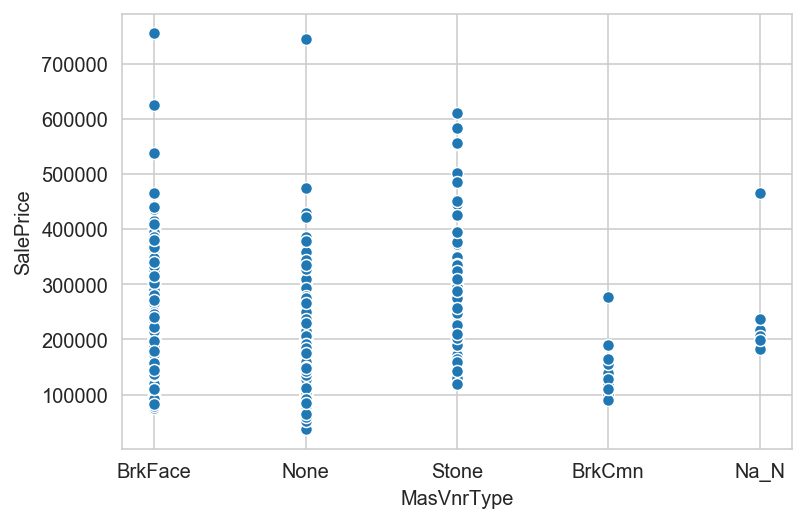

In [198]:
sns.scatterplot(x = house['MasVnrType'].fillna('Na_N'), y = house['SalePrice'])

In [199]:
# What do we do with the NaN?

house[house['MasVnrType'].isnull()][['Exterior1st', 'Exterior2nd']]


Exterior1st Exterior2nd
234      VinylSd     VinylSd
529      Wd Sdng       Stone
650      CemntBd     CmentBd
936      VinylSd     VinylSd
973      CemntBd     CmentBd
977      VinylSd     VinylSd
1243     VinylSd     VinylSd
1278     VinylSd     VinylSd

In [200]:
# most Nan have Vinyl Siding as Exterior covering on house.
# When other houses have Vinyl Siding, what is their Masonry veneer type?

house[house['Exterior1st'] == 'VinylSd']['MasVnrType'].value_counts()

None       240
BrkFace    177
Stone       91
BrkCmn       2
Name: MasVnrType, dtype: int64

no_MasVnr    862
BrkFace      445
Stone        128
BrkCmn        15
Name: MasVnrType_nona, dtype: int64


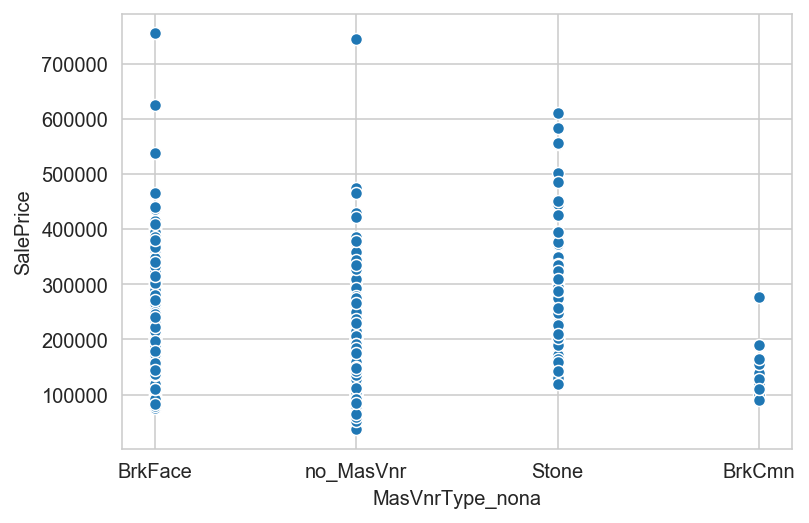

In [201]:
# replacing the missing (NaN) with None based on value counts
house['MasVnrType_nona'] = house['MasVnrType'].fillna(value='no_MasVnr')
house['MasVnrType_nona'] = house['MasVnrType_nona'].apply(lambda x: 'no_MasVnr' if x == 'None' else x)
vp('MasVnrType_nona')

# Renovatable

### MasVnrArea: Masonry veneer area in square feet

In [202]:
house['MasVnrArea'].value_counts(dropna=False)

0.0      851
72.0       8
180.0      8
NaN        8
108.0      8
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
621.0      1
Name: MasVnrArea, Length: 328, dtype: int64

In [203]:
# What do we do with the NaN?

house[house['MasVnrType'].isnull()][['Exterior1st', 'Exterior2nd', 'MasVnrArea']]

Exterior1st Exterior2nd  MasVnrArea
234      VinylSd     VinylSd         NaN
529      Wd Sdng       Stone         NaN
650      CemntBd     CmentBd         NaN
936      VinylSd     VinylSd         NaN
973      CemntBd     CmentBd         NaN
977      VinylSd     VinylSd         NaN
1243     VinylSd     VinylSd         NaN
1278     VinylSd     VinylSd         NaN

In [204]:
# most Nan have Vinyl Siding as Exterior covering on house.
# When other houses have Vinyl Siding, what is their Masonry veneer type?

house[house['Exterior1st'] == 'VinylSd']['MasVnrArea'].value_counts()

0.0      239
16.0       7
108.0      5
80.0       4
72.0       4
        ... 
158.0      1
66.0       1
428.0      1
117.0      1
236.0      1
Name: MasVnrArea, Length: 185, dtype: int64

0.0      859
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea_nona, Length: 327, dtype: int64


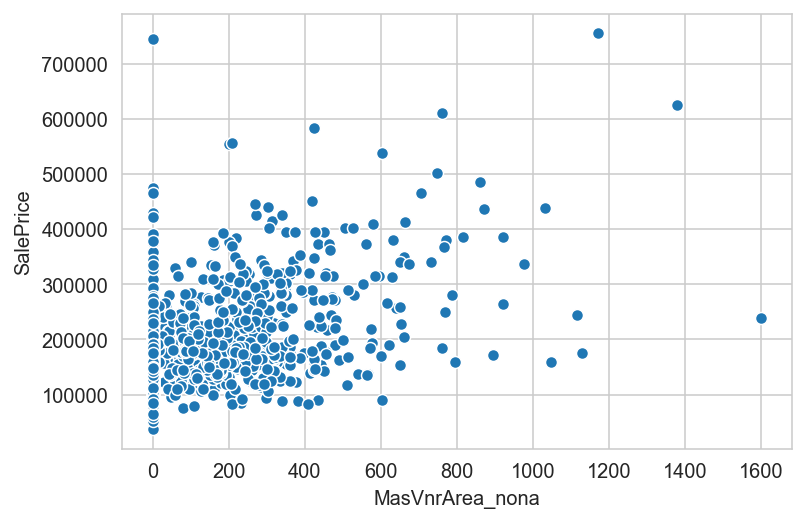

In [205]:
# replacing the missing (NaN) with 0.0 based on value counts
# fillna(value = 0.0, inplace = True)

house['MasVnrArea_nona'] = house['MasVnrArea'].fillna(value=0)
vp('MasVnrArea_nona')

# 	Renovatable

### ExterQual: Evaluates the quality of the material on the exterior
### ExterCond: Evaluates the present condition of the material on the exterior

In [206]:
house['ExterQual'].value_counts(dropna=False)

TA    899
Gd    488
Ex     52
Fa     11
Name: ExterQual, dtype: int64

In [207]:
house['ExterCond'].value_counts(dropna=False)

TA    1275
Gd     145
Fa      26
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [208]:
# give ordinal values 1-5
# categorical - dummy

# Fixed
### Foundation: Type of foundation

In [209]:
house['Foundation'].value_counts(dropna=False)

PConc     647
CBlock    627
BrkTil    144
Slab       24
Stone       5
Wood        3
Name: Foundation, dtype: int64

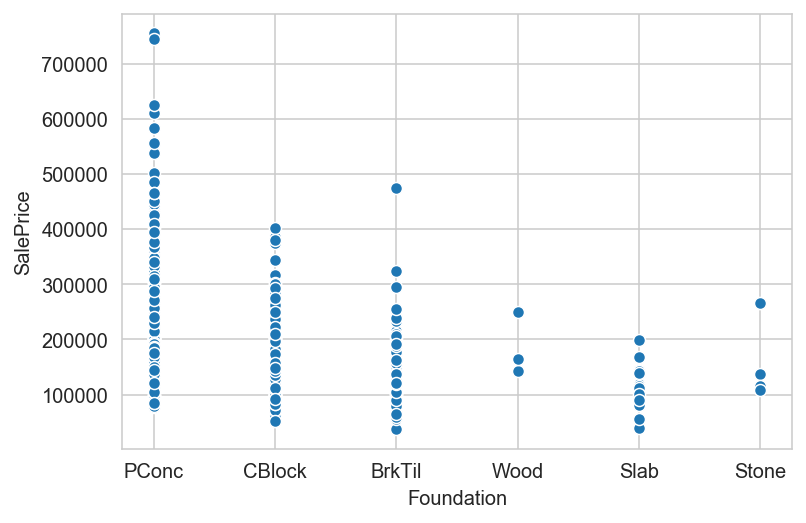

In [210]:
sns.scatterplot(x = house['Foundation'], y = house['SalePrice'])

In [211]:
# dummy - 6 different groups

# Basement variables

In [212]:
house[house['BsmtUnfSF'].isna()]
'BsmtFinSF1'
'BsmtFinSF2'
'BsmtUnfSF'

'BsmtUnfSF'

# Renovatable

BsmtFinSF1: Type 1 finished square feet - `N` - `checked nona`


BsmtFinSF2: Type 2 finished square feet - `N` - `checked nona`


BsmtUnfSF: Unfinished square feet of basement area - `N` - `checked nona`

---

BsmtCond: Evaluates the general condition of the basement - `made nona`


BsmtFinType1: Rating of basement finished area - `made nona`


BsmtFinType2: Rating of basement finished area (if multiple types) - `made nona`


TA     1303
Gd       65
Fa       43
NaN      37
Po        2
Name: BsmtCond, dtype: int64
Unf    424
GLQ    418
ALQ    220
BLQ    147
Rec    130
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
0       461
24       12
16        9
20        5
936       5
       ... 
679       1
1261      1
684       1
1260      1
1904      1
Name: BsmtFinSF1, Length: 636, dtype: int64
Unf    1246
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
0       1283
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64
0      117
728      9
384      8
300      7
600      7
      ... 
795      1
794      1
792      1
791      1
606      1
Name: BsmtUnfSF, Length: 776, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a2126a2048>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a212bfcb08>)

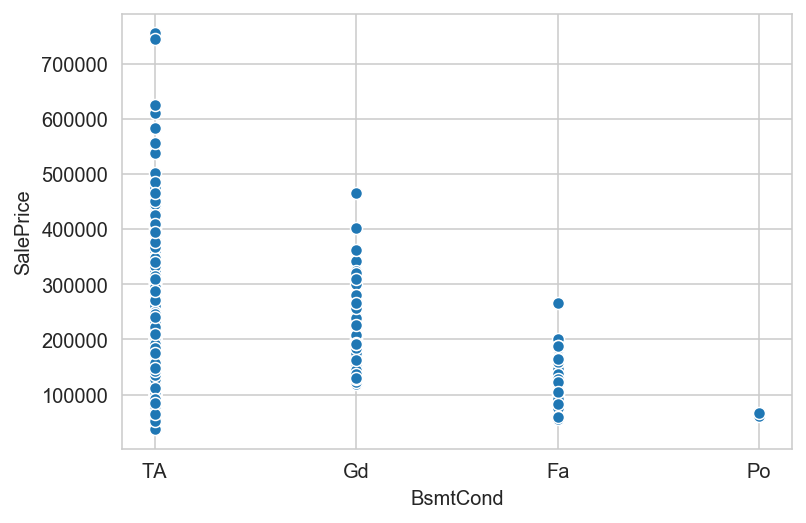

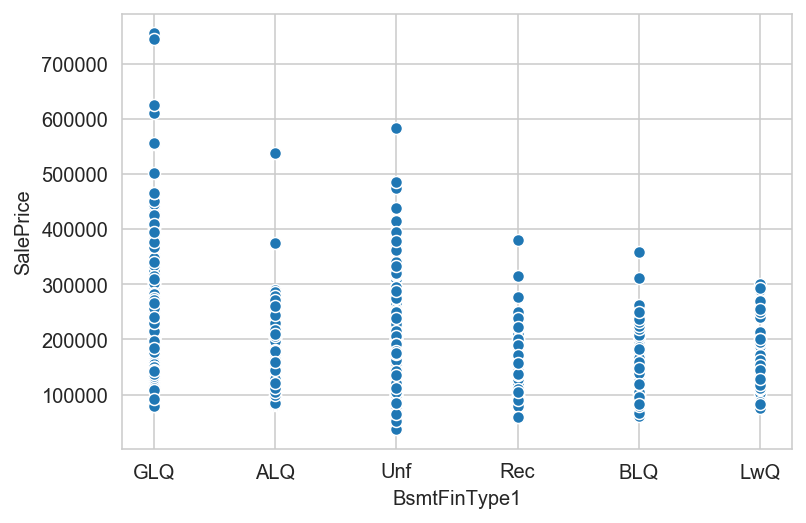

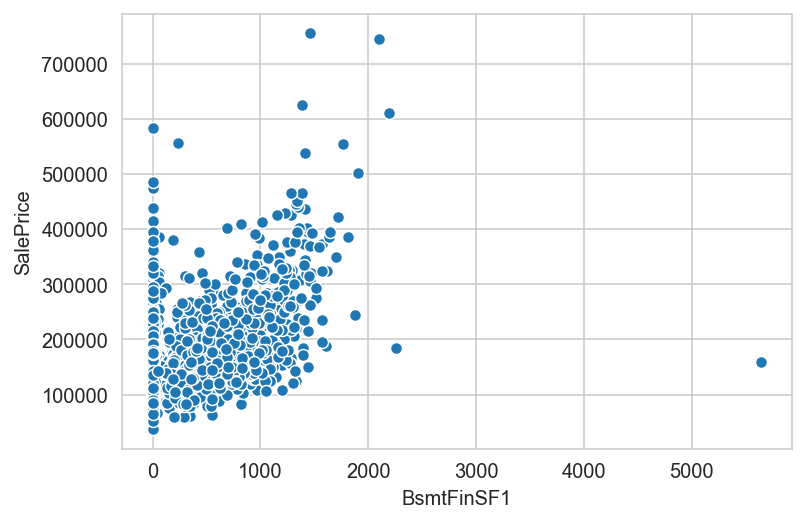

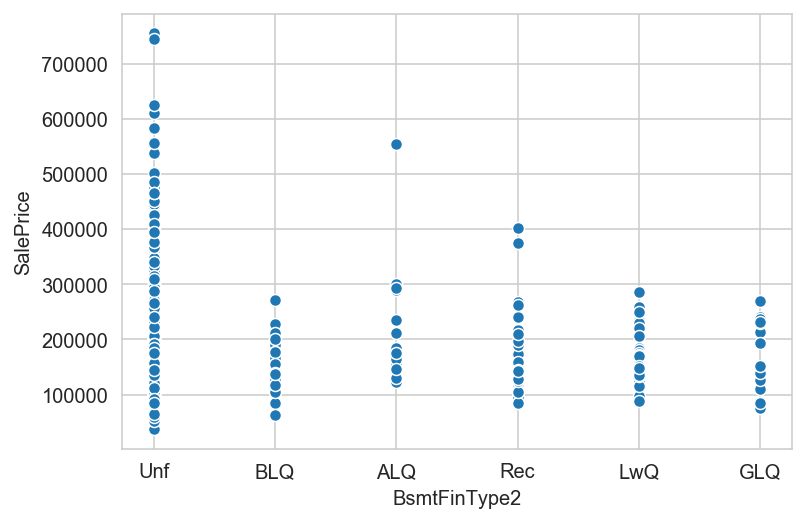

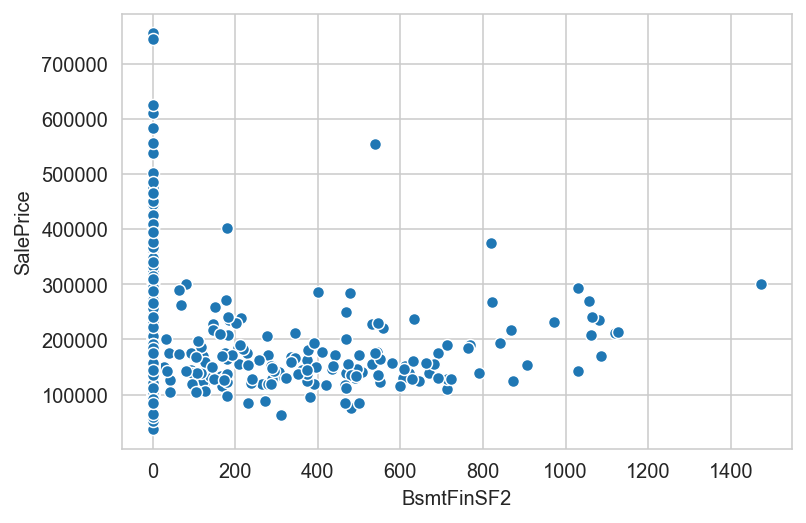

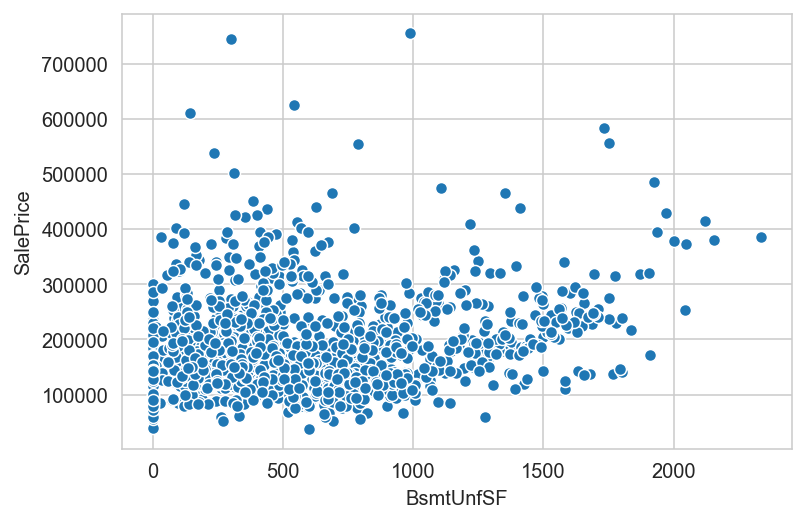

In [213]:
vp('BsmtCond'), vp('BsmtFinType1'), vp('BsmtFinSF1'), vp('BsmtFinType2'), vp('BsmtFinSF2'), vp('BsmtUnfSF')

In [214]:
# Checking for nulls in these three columns:
    # 'BsmtFinSF1'
    # 'BsmtFinSF2'
    # 'BsmtUnfSF'

house[house['BsmtFinSF1'].isna()], house[house['BsmtFinSF2'].isna()], house[house['BsmtUnfSF'].isna()];

In [215]:
# Replacing NaN with 'no_basement'
# 'BsmtCond'
# 'BsmtFinType1'
# 'BsmtFinType2'

house[['BsmtCond_nona', 'BsmtFinType1_nona', 'BsmtFinType2_nona']] = house[['BsmtCond', 'BsmtFinType1', 'BsmtFinType2']].fillna(value='no_basement')

TA     1303
Gd       65
Fa       43
NaN      37
Po        2
Name: BsmtCond, dtype: int64
TA             1303
Gd               65
Fa               43
no_basement      37
Po                2
Name: BsmtCond_nona, dtype: int64
Unf    424
GLQ    418
ALQ    220
BLQ    147
Rec    130
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64
Unf            424
GLQ            418
ALQ            220
BLQ            147
Rec            130
LwQ             74
no_basement     37
Name: BsmtFinType1_nona, dtype: int64
Unf    1246
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf            1246
Rec              54
LwQ              46
no_basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2_nona, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a213555bc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a212c684c8>)

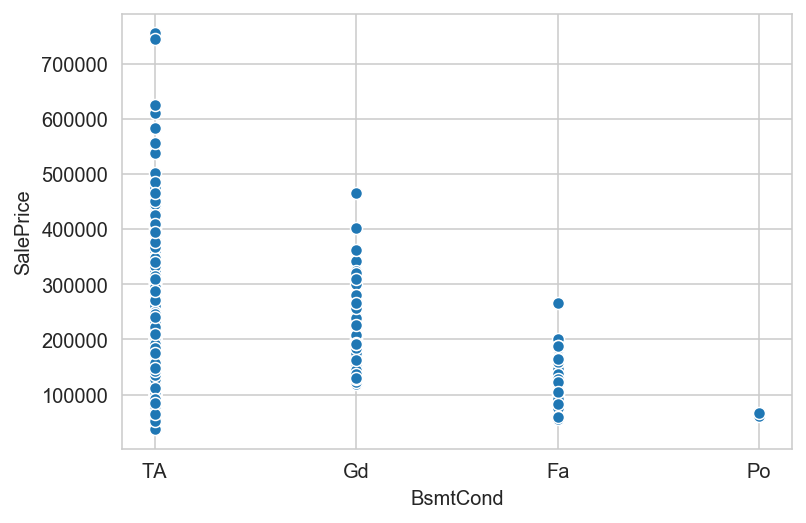

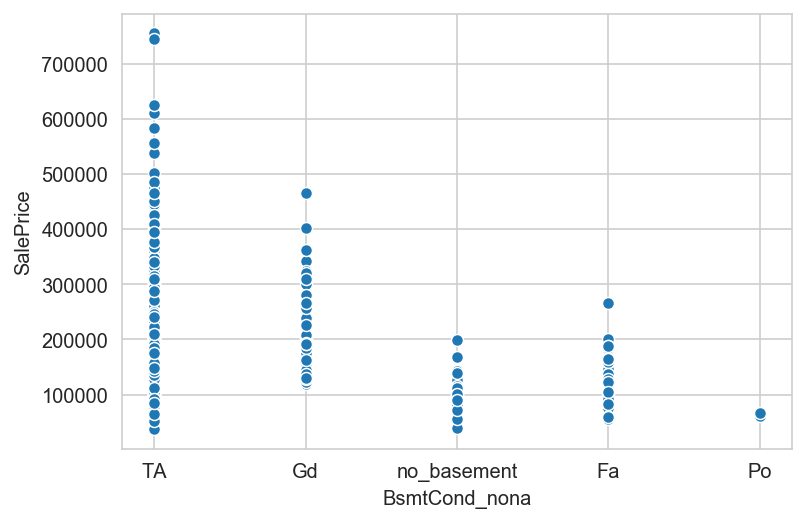

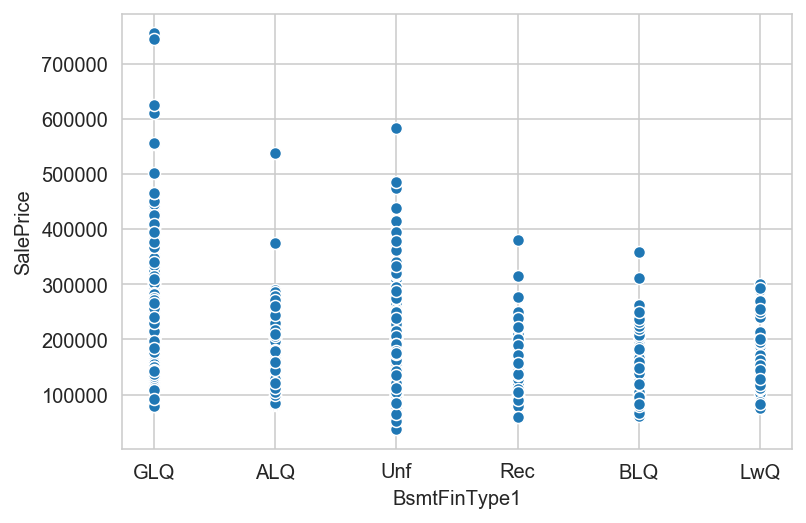

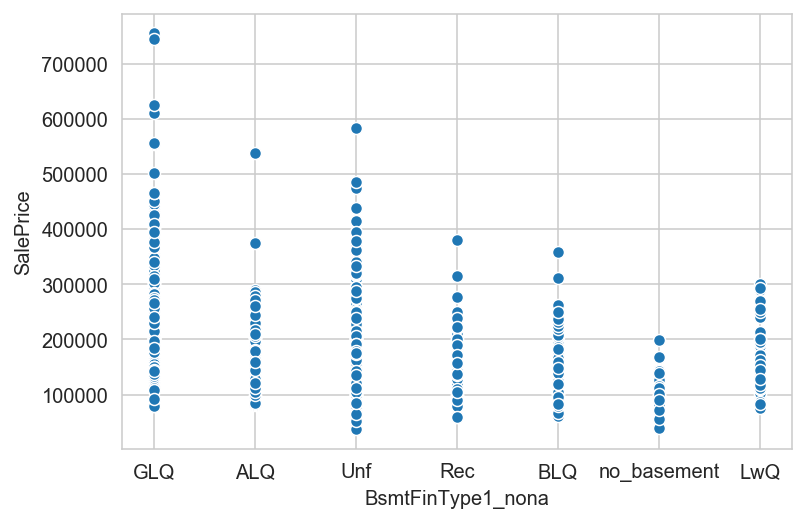

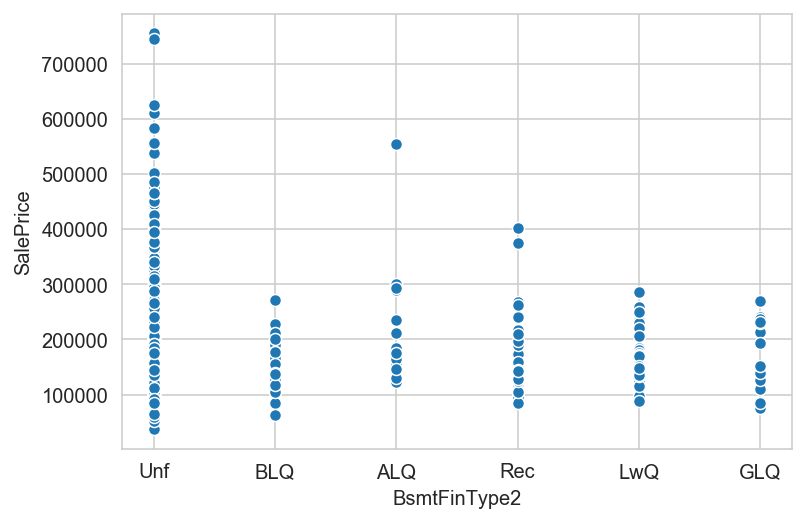

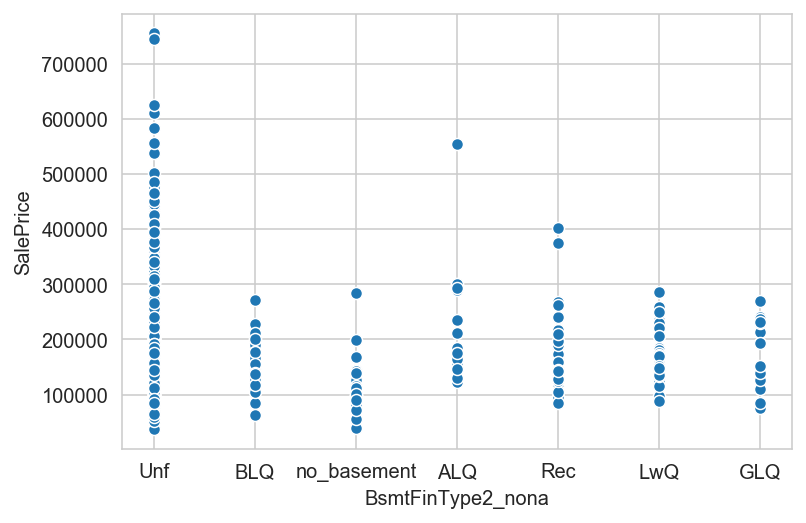

In [216]:
vp('BsmtCond'), vp('BsmtCond_nona'), vp('BsmtFinType1'), vp('BsmtFinType1_nona'), vp('BsmtFinType2'), vp('BsmtFinType2_nona')
#  

# TA     1311
# Gd       65
# Fa       45
# NaN      37
# Po        2
# Name: BsmtCond, dtype: int64
        
# Unf    430
# GLQ    418
# ALQ    220
# BLQ    148
# Rec    133
# LwQ     74
# NaN     37
# Name: BsmtFinType1, dtype: int64
        
# Unf    1256
# Rec      54
# LwQ      46
# NaN      38
# BLQ      33
# ALQ      19
# GLQ      14
# Name: BsmtFinType2, dtype: int64

# Fixed

BsmtQual: Evaluates the height of the basement

BsmtExposure: Refers to walkout or garden level walls

TotalBsmtSF: Total square feet of basement area

In [217]:
house['BsmtQual'].value_counts(dropna=False)

# sns.scatterplot(x = house['BsmtQual'], y = house['SalePrice'])

TA     639
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [218]:
house['BsmtQual_nona'] = house['BsmtQual'].fillna(value='no_basement', inplace=False)

house['BsmtQual_nona'].value_counts(dropna=False)

# dummy - 5 different groups

TA             639
Gd             618
Ex             121
no_basement     37
Fa              35
Name: BsmtQual_nona, dtype: int64

In [219]:
house['BsmtExposure'].value_counts(dropna=False)

# sns.scatterplot(x = house['BsmtExposure'], y = house['SalePrice'])

# dummy - 5 different groups

No     947
Av     219
Gd     134
Mn     112
NaN     38
Name: BsmtExposure, dtype: int64

In [220]:
house['BsmtExposure_nona'] = house['BsmtExposure'].fillna(value='no_basement', inplace=False)

house['BsmtExposure_nona'].value_counts(dropna=False)

# dummy - 5 different groups

No             947
Av             219
Gd             134
Mn             112
no_basement     38
Name: BsmtExposure_nona, dtype: int64

0       37
864     35
672     17
912     15
1040    14
        ..
1269     1
1271     1
1272     1
1273     1
1100     1
Name: TotalBsmtSF, Length: 719, dtype: int64


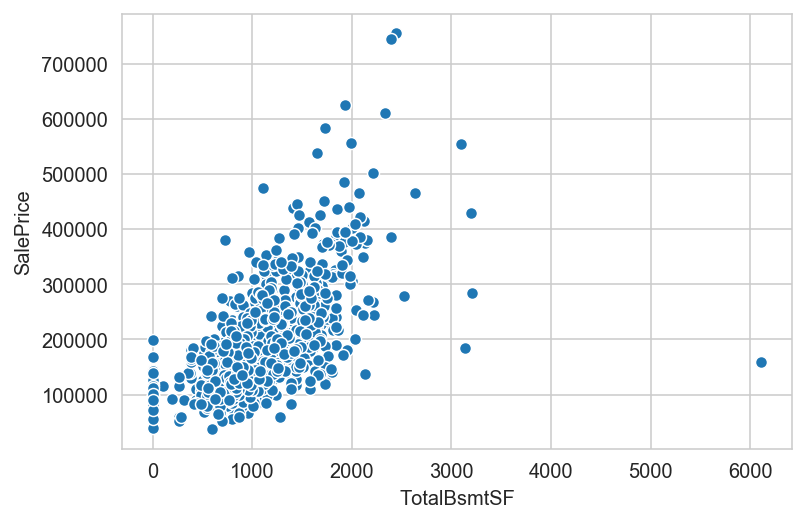

In [221]:
print(house['TotalBsmtSF'].value_counts(dropna=False))

sns.scatterplot(x = house['TotalBsmtSF'], y = house['SalePrice'])

# Renovatable

Heating: Type of heating

In [222]:
house['Heating'].value_counts(dropna=False)

GasA     1419
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [223]:
1419/1450

0.9786206896551725

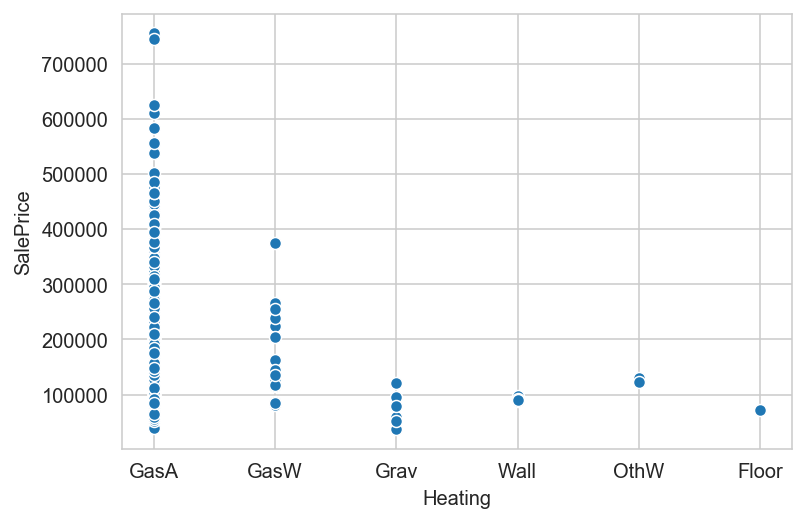

In [224]:
sns.scatterplot(x = house['Heating'], y = house['SalePrice'])

In [225]:
# 2 dummies - Gas and not gas

# OR
# 6 dummies

# choosing 6 dummies - the model will decide

# Renovatable
HeatingQC: Heating quality and condition

Ex    740
TA    421
Gd    239
Fa     49
Po      1
Name: HeatingQC, dtype: int64


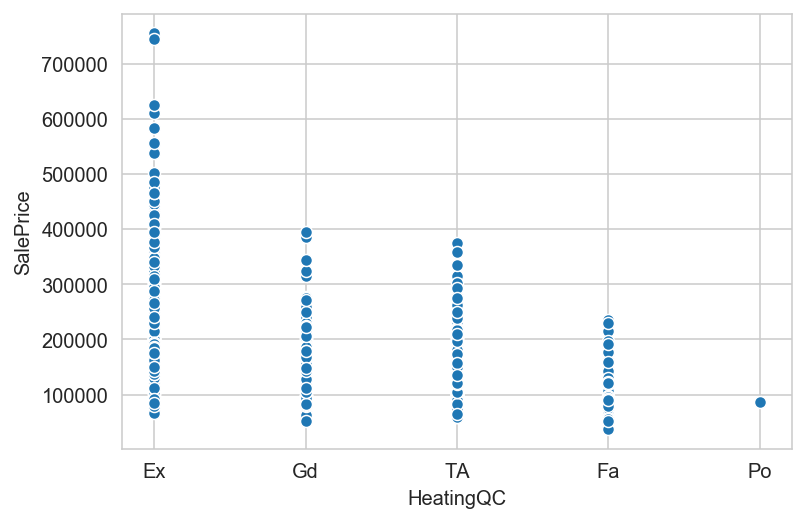

In [226]:
vp('HeatingQC')

# Renovatable

CentralAir: Central air conditioning

In [227]:
house['CentralAir'].value_counts(dropna=False)

Y    1361
N      89
Name: CentralAir, dtype: int64

In [228]:
1361/1450

0.9386206896551724

In [229]:
# 2 dummies

# Renovatable

Electrical: Electrical system

In [230]:
house['Electrical'].value_counts(dropna=False)

SBrkr    1328
FuseA      90
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

SBrkr    1329
FuseA      90
FuseF      27
FuseP       3
Mix         1
Name: Electrical_nona, dtype: int64


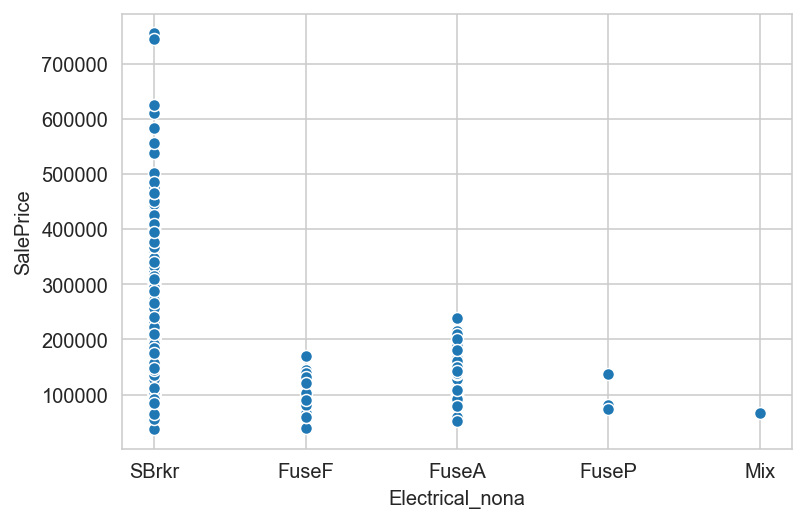

In [231]:
# Nan as mode

elec_mode = house['Electrical'].mode()[0]
elec_mode

house['Electrical_nona'] = house['Electrical'].fillna(value = elec_mode)

vp('Electrical_nona')
# 5 dummies


# Fixed

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet

In [232]:
pprint(house['1stFlrSF'].value_counts(dropna=False))
pprint(house['2ndFlrSF'].value_counts(dropna=False))
pprint(house['GrLivArea'].value_counts(dropna=False))

864     25
1040    16
912     14
848     12
672     11
        ..
1297     1
1299     1
1304     1
1307     1
2053     1
Name: 1stFlrSF, Length: 746, dtype: int64
0       824
728      10
504       9
672       8
546       8
       ... 
875       1
1281      1
1276      1
881       1
1872      1
Name: 2ndFlrSF, Length: 413, dtype: int64
864     22
1040    14
894     10
848     10
1456    10
        ..
1400     1
3447     1
1396     1
1395     1
2054     1
Name: GrLivArea, Length: 858, dtype: int64


In [233]:
# Preparing to use Patsy - Ensuring column names don't start with numbers

house['FirstFlrSF'] = house['1stFlrSF']
house['SecondFlrSF'] = house['2ndFlrSF']

pprint(house.columns)

pprint(house['FirstFlrSF'].value_counts(dropna=False))
pprint(house['SecondFlrSF'].value_counts(dropna=False))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'MasVnrType_nona', 'MasVnrArea_nona', 'BsmtCond_nona',
       'BsmtFinType1_nona', 'BsmtFinType2_nona', 'BsmtQual_nona',
       'BsmtExposure_nona', 'Electrical_nona', 'FirstFlrSF', 'SecondFlrSF'],
      dtype='object', length=106)
864     25
1040    16
912     14
848     12
672     11
        ..
1297     1
1299     1
1304     1
1307     1
2053     1
Name: FirstFlrSF, Length: 746, dtype: int64
0       824
728      10
504       9
672       8
546       8
       ... 
875       1
1281      1
1276      1
881       1
1872      1
Name: SecondFlrSF, Length: 413, dtype: int64


In [234]:
house[['1stFlrSF', '2ndFlrSF', 'GrLivArea']];

In [235]:
house['Floors'] = house['2ndFlrSF'].apply(lambda x: 1 if x == 0 else 2)
house.Floors.value_counts(dropna=False)

1    824
2    626
Name: Floors, dtype: int64

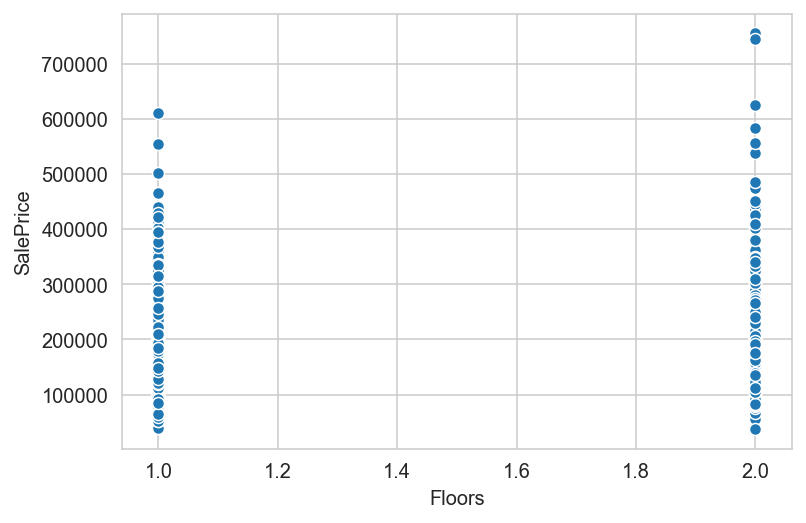

In [236]:
sns.scatterplot(x = house['Floors'], y = house['SalePrice'])

In [237]:
house[['GrLivArea', 'SalePrice']].corr()

GrLivArea  SalePrice
GrLivArea   1.000000   0.708658
SalePrice   0.708658   1.000000

In [238]:
house[['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'SalePrice', 'Floors']].corr()

1stFlrSF  2ndFlrSF  GrLivArea  SalePrice    Floors
1stFlrSF   1.000000 -0.205486   0.564098   0.603300 -0.340483
2ndFlrSF  -0.205486  1.000000   0.687450   0.319774  0.912166
GrLivArea  0.564098  0.687450   1.000000   0.708658  0.512005
SalePrice  0.603300  0.319774   0.708658   1.000000  0.138952
Floors    -0.340483  0.912166   0.512005   0.138952  1.000000

# Renovatable

LowQualFinSF: Low quality finished square feet (all floors)



0      1425
80        3
360       2
371       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
572       1
528       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


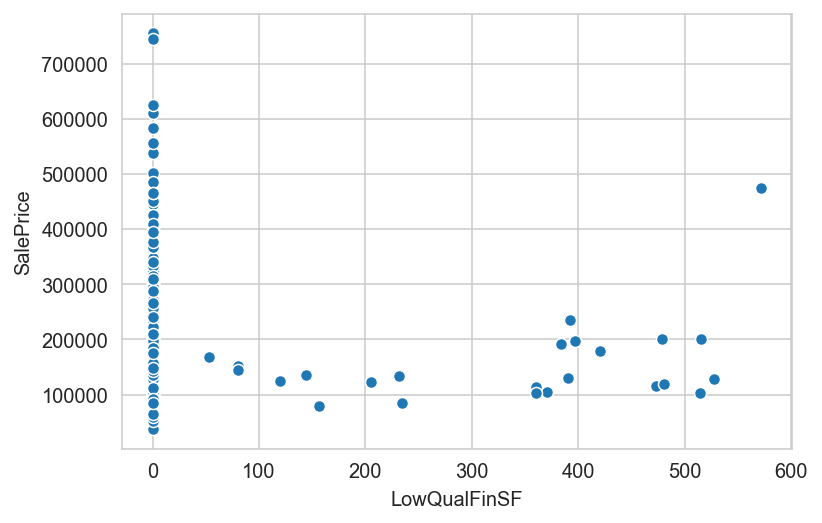

In [239]:
vp('LowQualFinSF')

# numerical

# Fixed - dummy

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)



In [240]:
# recategorising:
#    - all full bathrooms
#    - all half bathrooms

In [241]:
def vp(column):
    pprint(house[column].value_counts(dropna=False))
    fig1, ax1 = plt.subplots()
    return sns.scatterplot(x = house[column], y = house['SalePrice'])

0    847
1    587
2     15
3      1
Name: BsmtFullBath, dtype: int64
2    767
1    642
3     33
0      8
Name: FullBath, dtype: int64
0    1369
1      79
2       2
Name: BsmtHalfBath, dtype: int64
0    904
1    534
2     12
Name: HalfBath, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a2155199c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a21562e488>)

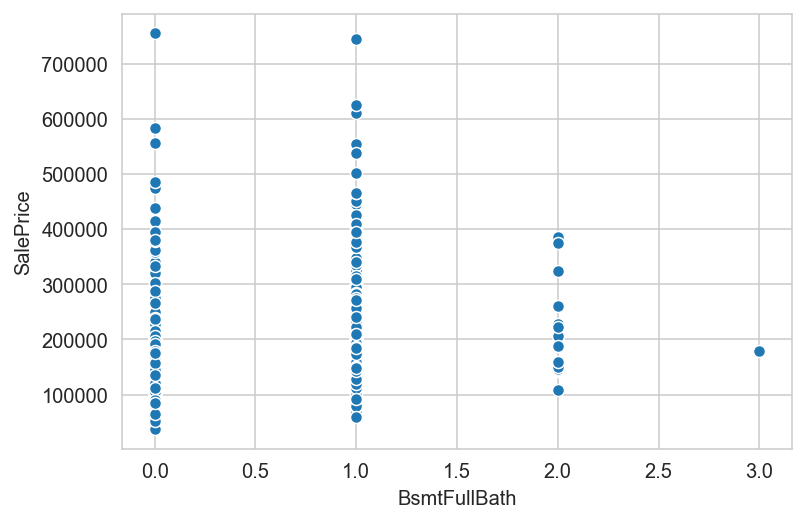

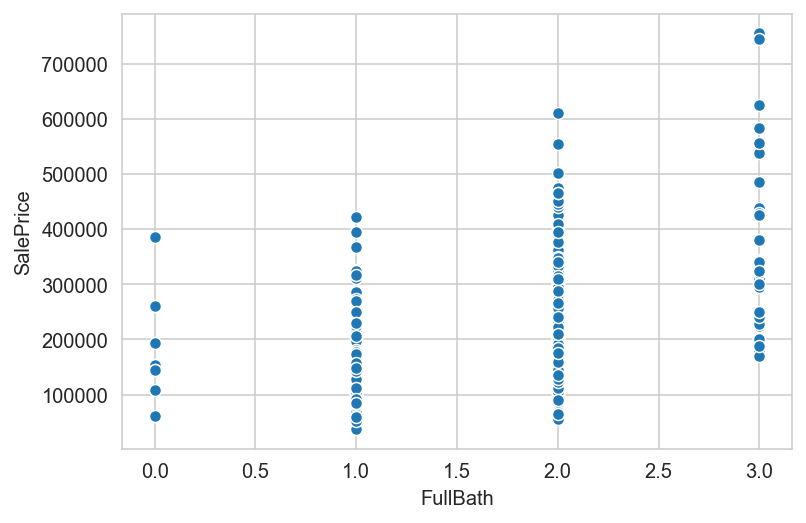

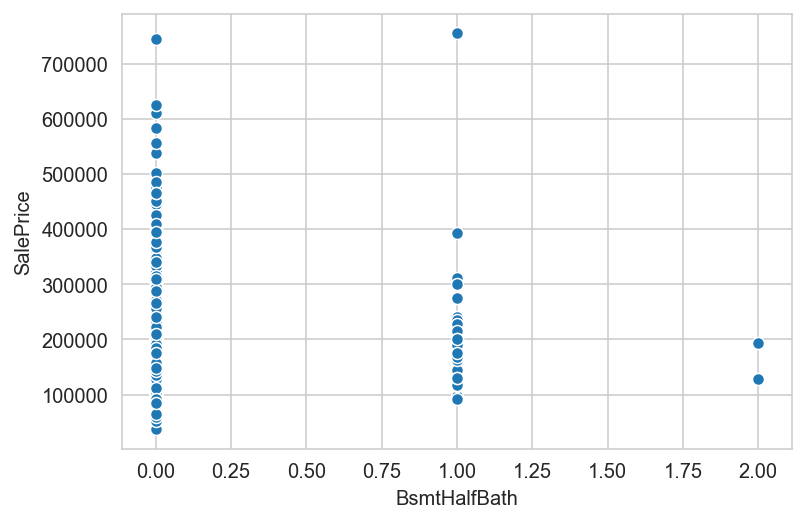

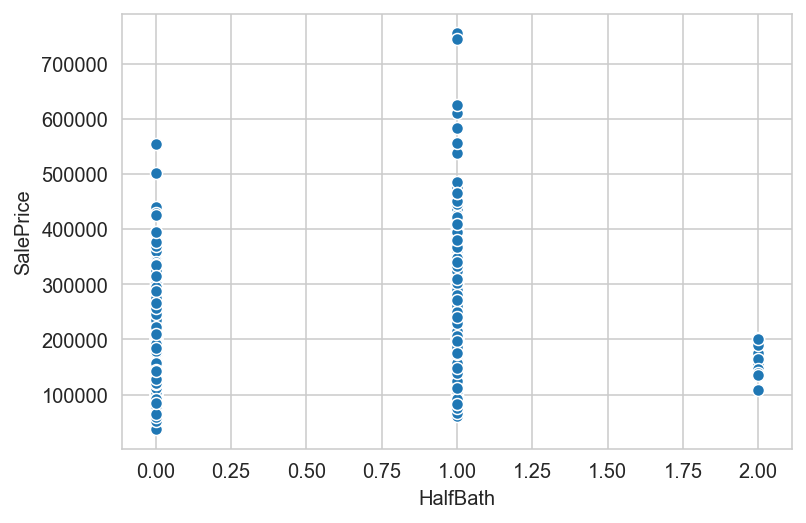

In [242]:
vp('BsmtFullBath'), vp('FullBath'), vp('BsmtHalfBath'), vp('HalfBath')

2    749
1    362
3    319
4     18
6      1
0      1
Name: re_FullBath, dtype: int64
0    847
1    570
2     29
3      3
4      1
Name: re_HalfBath, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a2162a63c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a2162d2e08>)

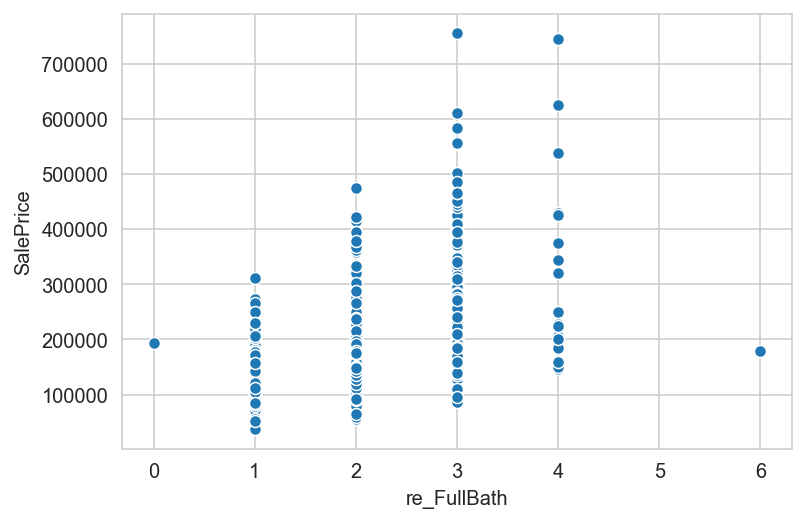

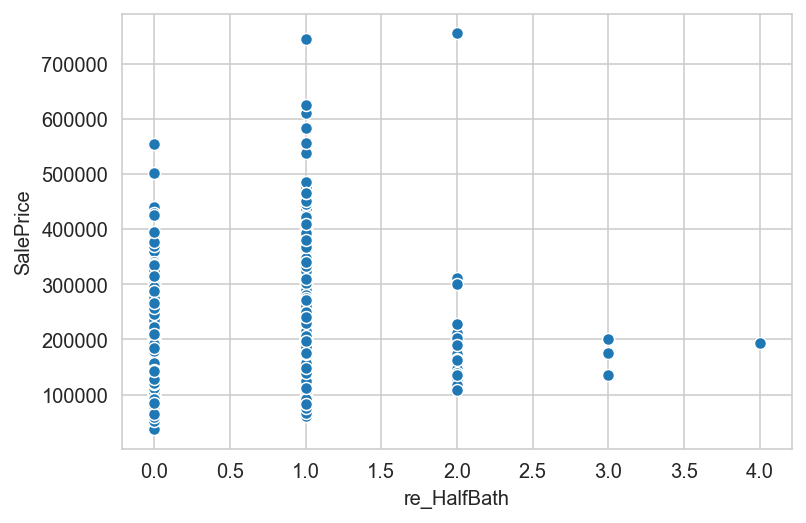

In [243]:
house['re_FullBath'] = house['BsmtFullBath'] + house['FullBath']
house['re_HalfBath'] = house['BsmtHalfBath'] + house['HalfBath']

vp('re_FullBath'), vp('re_HalfBath')

In [305]:
house['re_FullBath'].dtype, house['re_HalfBath'].dtype

(dtype('int64'), dtype('int64'))

In [306]:
# string the values
house['re_FullBath'] = house['re_FullBath'].astype(str)
house['re_HalfBath'] = house['re_HalfBath'].astype(str)

# check
house['re_FullBath'].dtype, house['re_HalfBath'].dtype

(dtype('O'), dtype('O'))

3    802
2    352
4    212
1     49
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
1    1383
2      64
3       2
0       1
Name: KitchenAbvGr, dtype: int64
6     398
7     327
5     275
8     187
4      94
9      74
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a2166c3108>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a216782a88>)

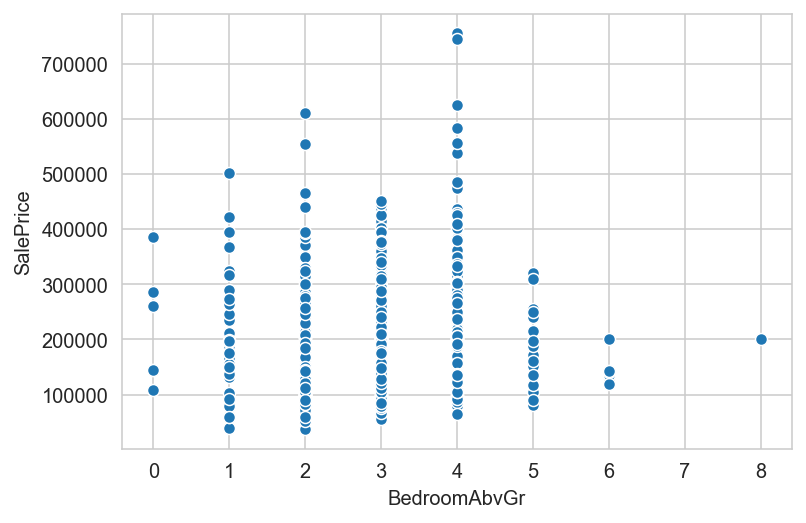

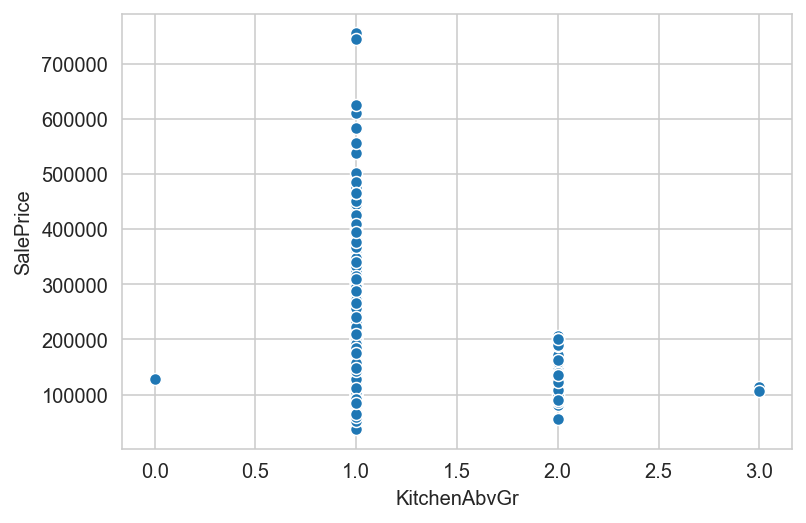

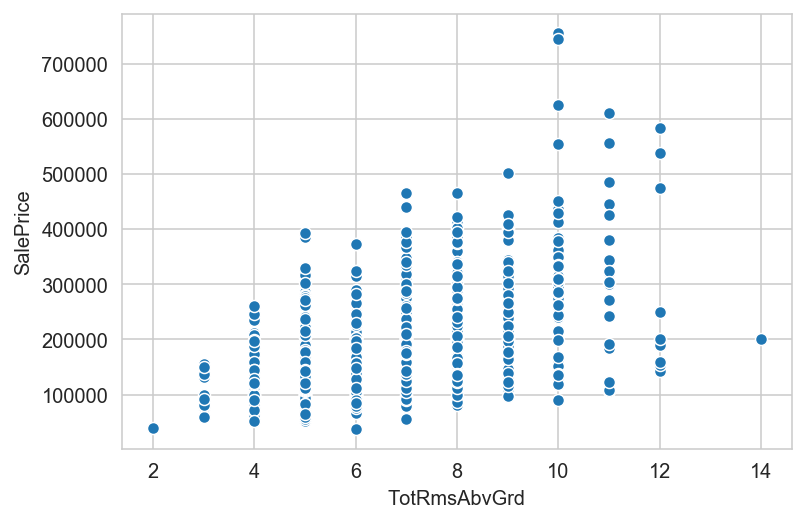

In [244]:
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

# Kitchen: Kitchens above grade

# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

vp('BedroomAbvGr'), vp('KitchenAbvGr'), vp('TotRmsAbvGrd')

In [304]:
# string the values
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype(str)
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype(str)
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype(str)

# check
house['BedroomAbvGr'].dtype, house['KitchenAbvGr'].dtype, house['TotRmsAbvGrd'].dtype

(dtype('O'), dtype('O'), dtype('O'))

# Renovatable

KitchenQual: Kitchen quality

Functional: Home functionality (Assume typical unless deductions are warranted)


TA    727
Gd    586
Ex    100
Fa     37
Name: KitchenQual, dtype: int64


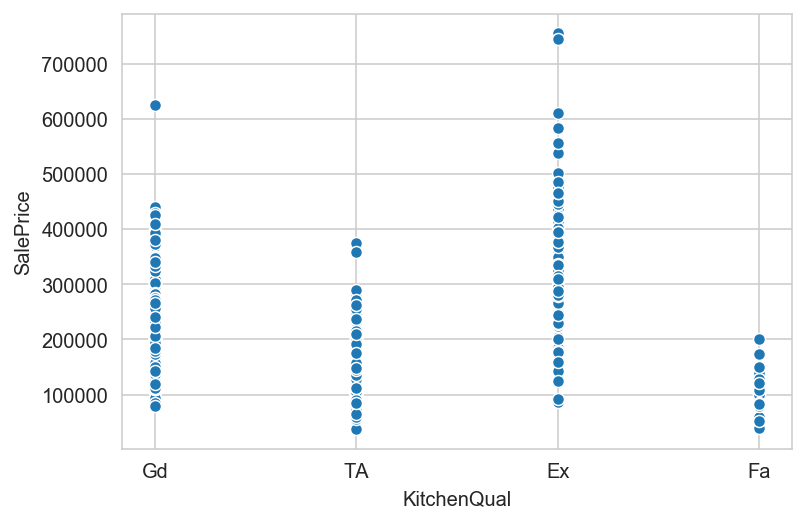

In [245]:
vp('KitchenQual')
# 4 dummies

Typ     1350
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


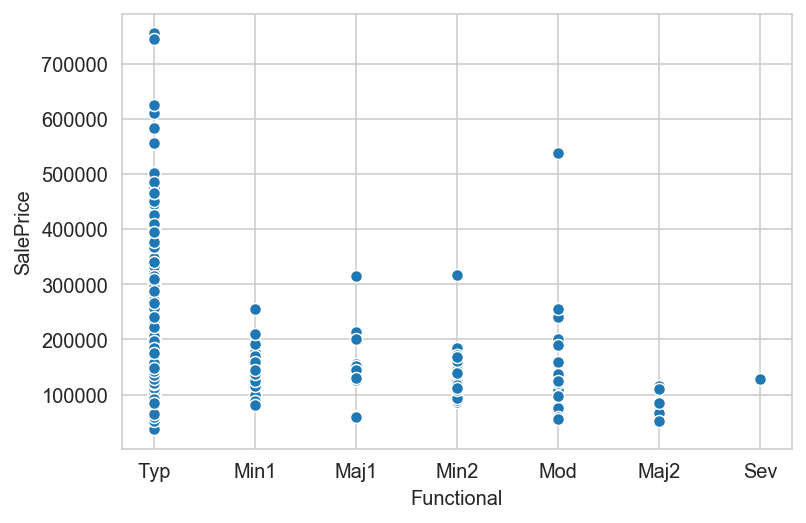

In [246]:
vp('Functional')
# 7 dummies

# Fixed

Fireplaces: Number of fireplaces

0    681
1    649
2    115
3      5
Name: Fireplaces, dtype: int64


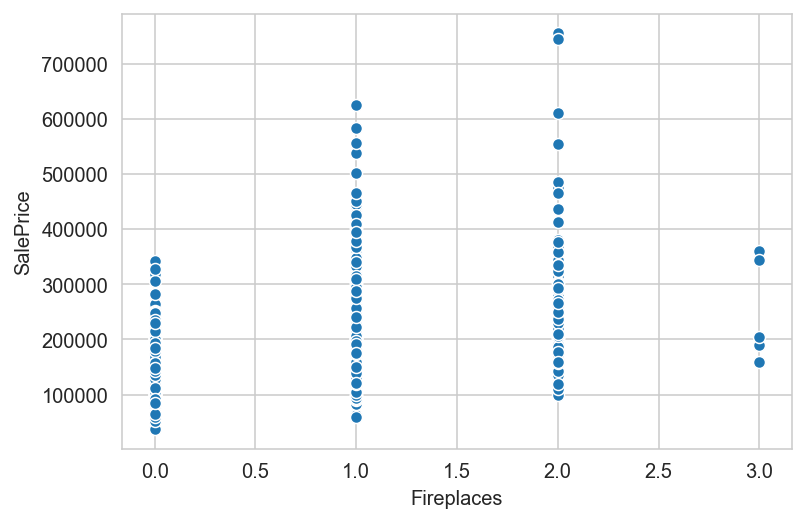

In [247]:
vp('Fireplaces')

# 4 dummies

In [301]:
# string the values
house['Fireplaces'] = house['Fireplaces'].astype(str)
# check
house['Fireplaces'].dtype

dtype('O')

# Renov

FireplaceQu: Fireplace quality

### handle NaN

NaN    681
Gd     379
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64


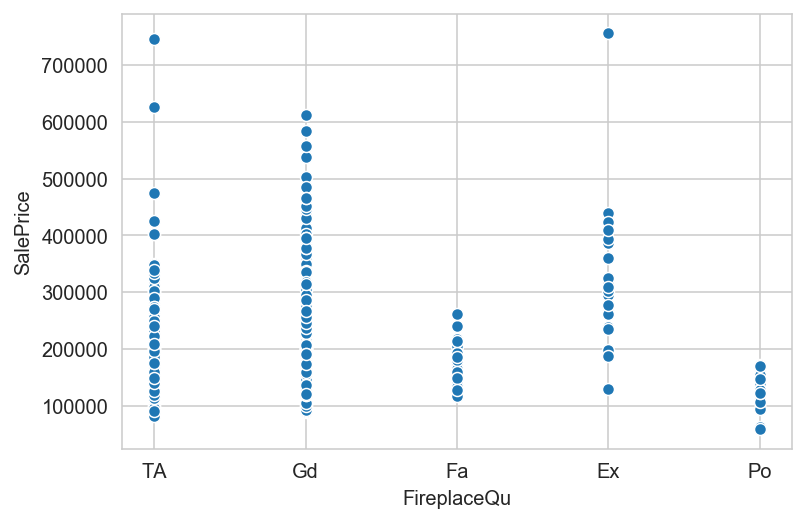

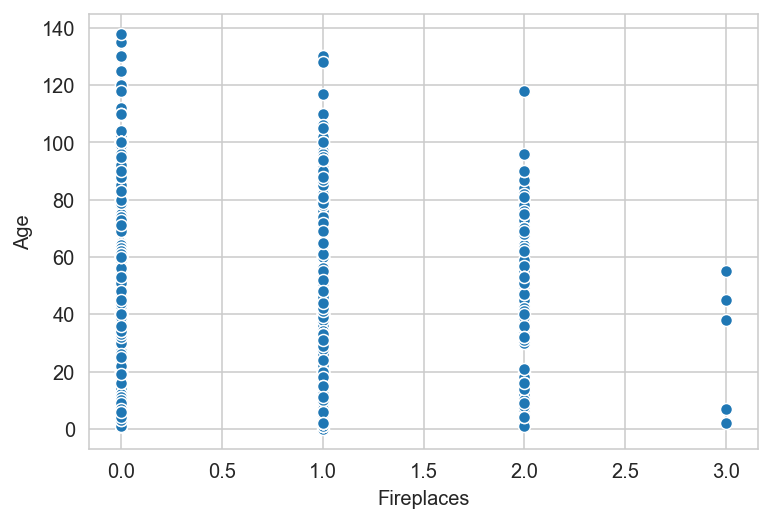

In [248]:
vp('FireplaceQu')

fig1, ax1 = plt.subplots()
sns.scatterplot(x = house['Fireplaces'], y = house['Age'])

no_fireplace    681
Gd              379
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu_nona, dtype: int64


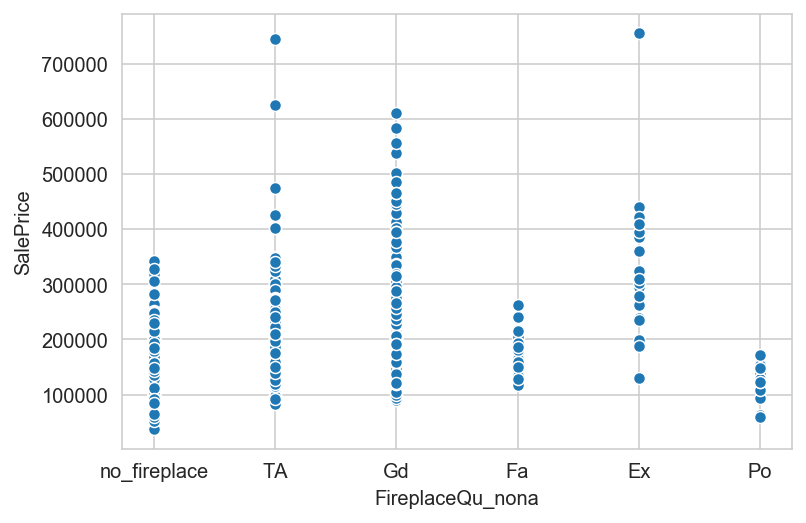

In [249]:
# converting NA to 'no_fireplace'

house['FireplaceQu_nona'] = house['FireplaceQu'].fillna(value = 'no_fireplace')
vp('FireplaceQu_nona')

# Fixed

GarageType: Garage location

GarageYrBlt: Year garage was built     

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet


In [250]:
house[['GarageQual', 'GarageCond']].corr()

Empty DataFrame
Columns: []
Index: []

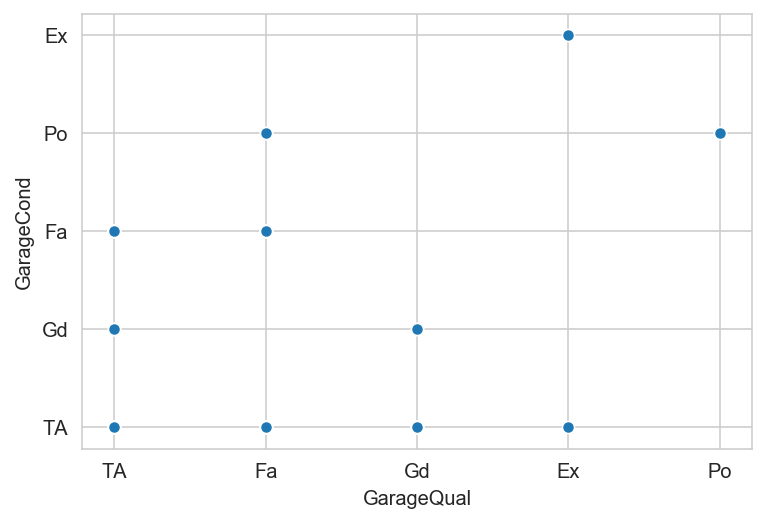

In [251]:
sns.scatterplot(x = house['GarageQual'], y = house['GarageCond'])

In [252]:
house['GarageQual'].value_counts(dropna=False)

TA     1303
NaN      79
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [253]:
house['GarageCond'].value_counts(dropna=False)

TA     1319
NaN      79
Fa       34
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [254]:
house[house['GarageCond'] != house['GarageQual']]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
42      43          85       RL         60.0     9180   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1443  1444          30       RL         60.0     8854   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pave   NaN      Reg   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities  ... BsmtFinType2_nona BsmtQual_nona  \
8            Lvl    AllPub  ...               Unf            TA   
9            Lvl    AllPub  ...               Unf            TA   
29           Lvl    AllPub  ...               Unf            TA   
39           Lvl    AllPub  ...       no_basement   no_basement   
42           Lvl    AllPub  ...               LwQ            Gd   
...          ...       ...  ...               ...           ...   
1443         Lvl    AllPub  ...               Unf            TA   
1448         Lvl    AllPub  ...               Unf            Fa   
1449         Lvl    AllPub  ...               Unf            Gd   
1450         Lvl    AllPub  ...               Unf            Gd   
1453         Lvl    AllPub  ...               Unf            Gd   

     BsmtExposure_nona Electrical_nona FirstFlrSF SecondFlrSF Floors  \
8                   No           FuseF       1022         752      2   
9                   No           SBrkr       1077           0      1   
29                  No           SBrkr        520           0      1   
39         no_basement           FuseP       1152           0      1   
42                  Av           SBrkr        884           0      1   
...                ...             ...        ...         ...    ...   
1443                No           FuseF        952           0      1   
1448                No           SBrkr        796         550      2   
1449                Av           SBrkr        630           0      1   
1450                No           SBrkr        896         896      2   
1453                No           SBrkr       1140           0      1   

     re_FullBath re_HalfBath  FireplaceQu_nona  
8              2           0                TA  
9              2           0                TA  
29             1           0      no_fireplace  
39             2           0      no_fireplace  
42             2           0      no_fireplace  
...          ...         ...               ...  
1443           1           0                Gd  
1448           1           1      no_fireplace  
1449           2           0      no_fireplace  
1450           2           2      no_fireplace  
1453           1           0      no_fireplace  

[137 rows x 110 columns]

Attchd     870
Detchd     381
BuiltIn     88
NaN         79
Basment     18
CarPort      8
2Types       6
Name: GarageType, dtype: int64
NaN       79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1942.0     2
1906.0     1
1927.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


(1450, 110)

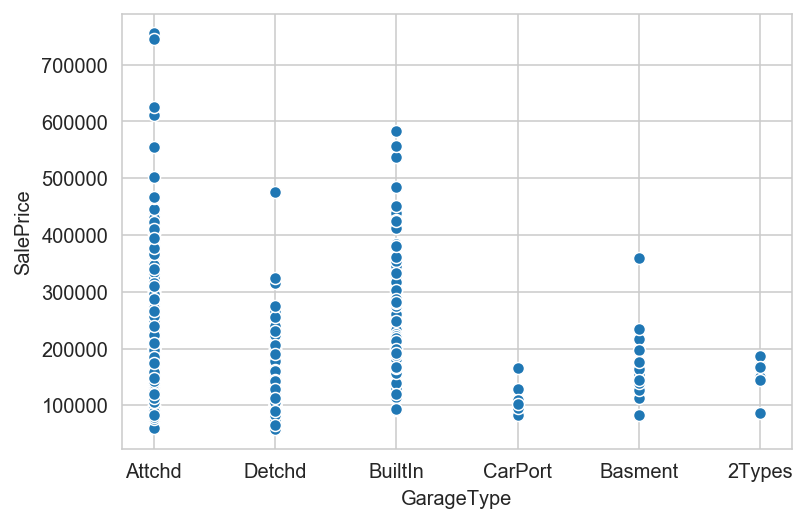

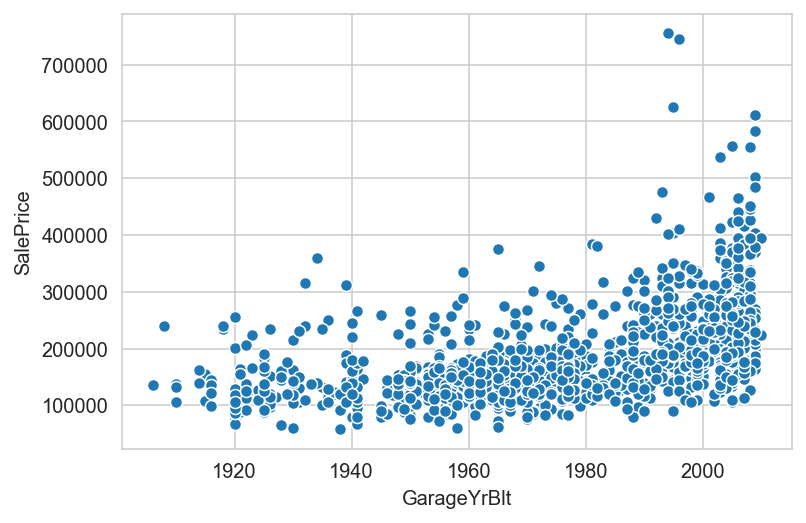

In [255]:
vp('GarageType'), vp('GarageYrBlt')

house.shape

Attchd       870
Detchd       381
BuiltIn       88
no_garage     79
Basment       18
CarPort        8
2Types         6
Name: GarageType_nona, dtype: int64


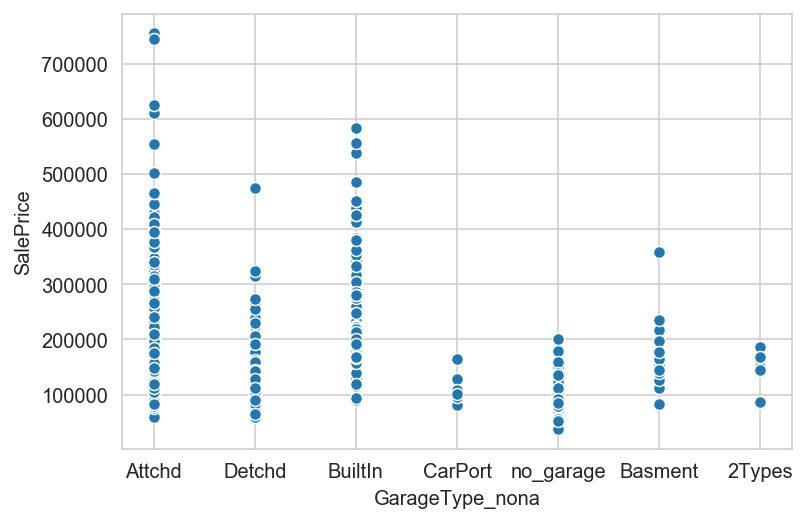

In [256]:
# replacing NA with 'no garage'

house['GarageType_nona'] = house['GarageType'].fillna(value='no_garage')

vp('GarageType_nona')

In [257]:
house['GarageYrBlt'].value_counts(dropna=False)

NaN       79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1942.0     2
1906.0     1
1927.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [258]:
house[house['GarageYrBlt'].isna()]#.shape

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
78      79          90       RL         72.0    10778   Pave   NaN      Reg   
89      90          20       RL         60.0     8070   Pave   NaN      Reg   
99     100          20       RL         77.0     9320   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1349  1350          70       RM         50.0     5250   Pave  Pave      Reg   
1407  1408          20       RL         60.0     8780   Pave   NaN      IR1   
1449  1450         180       RM         21.0     1533   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   

     LandContour Utilities  ... BsmtQual_nona BsmtExposure_nona  \
39           Lvl    AllPub  ...   no_basement       no_basement   
48           Lvl    AllPub  ...            TA                No   
78           Lvl    AllPub  ...            TA                No   
89           Lvl    AllPub  ...            Gd                No   
99           Lvl    AllPub  ...            TA                No   
...          ...       ...  ...           ...               ...   
1349         Lvl    AllPub  ...            TA                No   
1407         Lvl    AllPub  ...            TA                No   
1449         Lvl    AllPub  ...            Gd                Av   
1450         Lvl    AllPub  ...            Gd                No   
1453         Lvl    AllPub  ...            Gd                No   

     Electrical_nona FirstFlrSF SecondFlrSF Floors re_FullBath re_HalfBath  \
39             FuseP       1152           0      1           2           0   
48             SBrkr        736         716      2           2           0   
78             SBrkr       1768           0      1           2           0   
89             SBrkr        990           0      1           2           0   
99             SBrkr       1225           0      1           2           1   
...              ...        ...         ...    ...         ...         ...   
1349           SBrkr        938        1215      2           2           0   
1407           SBrkr        833           0      1           2           0   
1449           SBrkr        630           0      1           2           0   
1450           SBrkr        896         896      2           2           2   
1453           SBrkr       1140           0      1           1           0   

     FireplaceQu_nona  GarageType_nona  
39       no_fireplace        no_garage  
48       no_fireplace        no_garage  
78       no_fireplace        no_garage  
89       no_fireplace        no_garage  
99       no_fireplace        no_garage  
...               ...              ...  
1349     no_fireplace        no_garage  
1407     no_fireplace        no_garage  
1449     no_fireplace        no_garage  
1450     no_fireplace        no_garage  
1453     no_fireplace        no_garage  

[79 rows x 111 columns]

In [259]:
# what is the datatype of 'NaN' in this column?

house[house['GarageYrBlt'].isna()]['GarageYrBlt'].index

house['GarageYrBlt'].at[39]

nan

In [260]:
# What is happening with the rows that have NaN for Garage Year built?

house[house['GarageYrBlt'].isna()]['GarageType'].value_counts(dropna=False)

# The year is NaN because these houses do not have a garage.

# How can we handle the NaN?

NaN    79
Name: GarageType, dtype: int64

NaN       79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1942.0     2
1906.0     1
1927.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt_clean_copy, Length: 97, dtype: int64


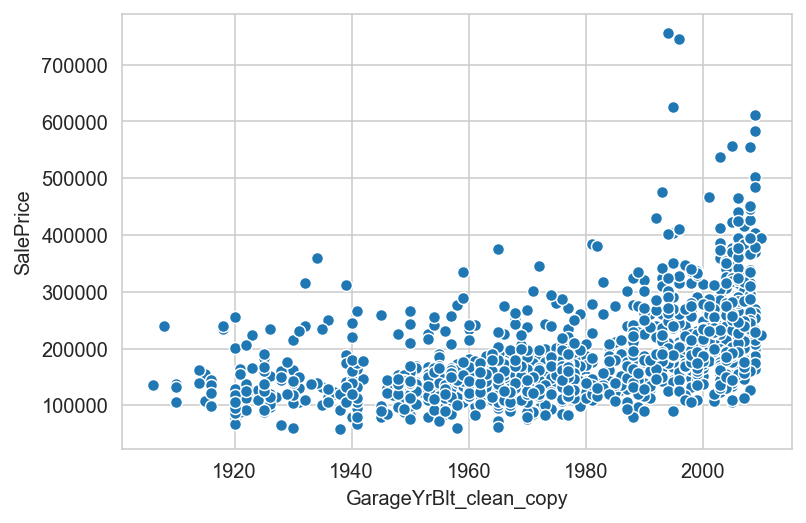

In [261]:
# creating a copy of the Garage Year Built column before making in place changes to the original

house['GarageYrBlt_clean_copy'] = house['GarageYrBlt'].copy()

vp('GarageYrBlt_clean_copy')

0.0       79
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1942.0     2
1906.0     1
1927.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt_nona, Length: 97, dtype: int64


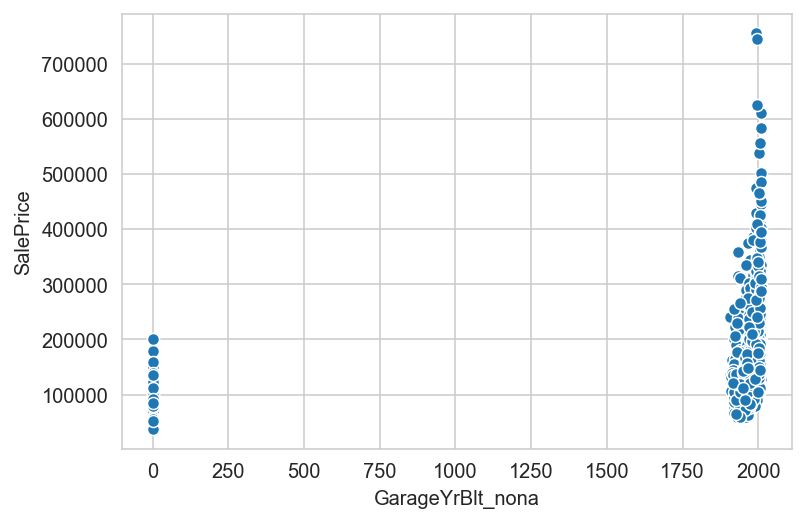

In [262]:
house['GarageYrBlt_nona'] = house['GarageYrBlt'].fillna(value=0)

vp('GarageYrBlt_nona');

In [264]:
# sns.scatterplot(x, y)

count    1371.000000
mean       31.372721
std        24.592779
min         0.000000
25%         8.000000
50%        30.000000
75%        48.500000
max       104.000000
Name: GarageAge_nona, dtype: float64

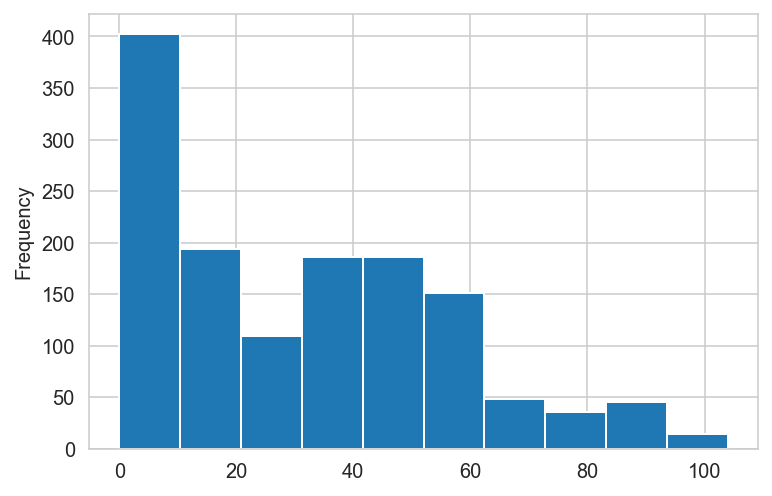

In [265]:
# Finding age of garage in 2010

house['GarageAge_nona'] = 2010 - house['GarageYrBlt_nona']

house['GarageAge_nona'] = house['GarageAge_nona'].astype(int)

g = house[house['GarageAge_nona'] != 2010].GarageAge_nona
g.shape
g.plot(kind = 'hist')

g.describe()

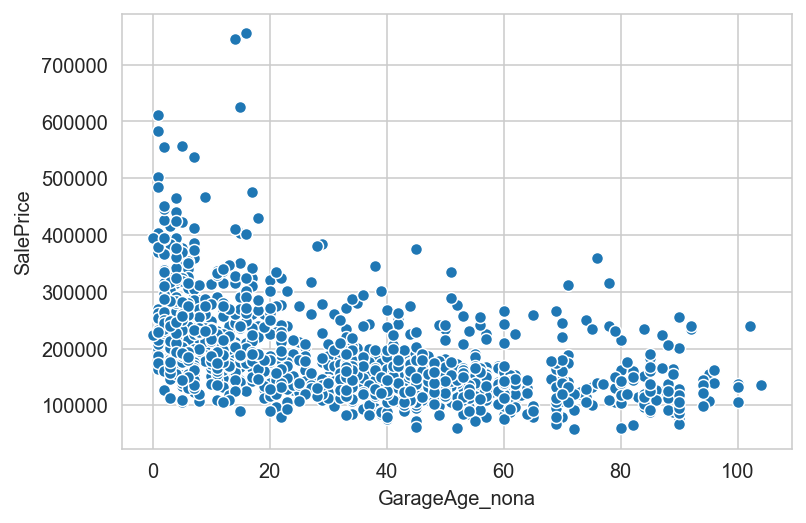

In [266]:
g_age = house[house['GarageAge_nona'] != 2010]
g_age
sns.scatterplot(x = g_age['GarageAge_nona'], y = g_age['SalePrice'])

In [267]:
house['GarageAge_nona'].describe()

count    1450.000000
mean      139.173793
std       449.875634
min         0.000000
25%         9.000000
50%        33.000000
75%        52.000000
max      2010.000000
Name: GarageAge_nona, dtype: float64

f21_to_80    709
upto_20      596
no_garage     79
f81_above     66
Name: re_GarageAge_nona, dtype: int64


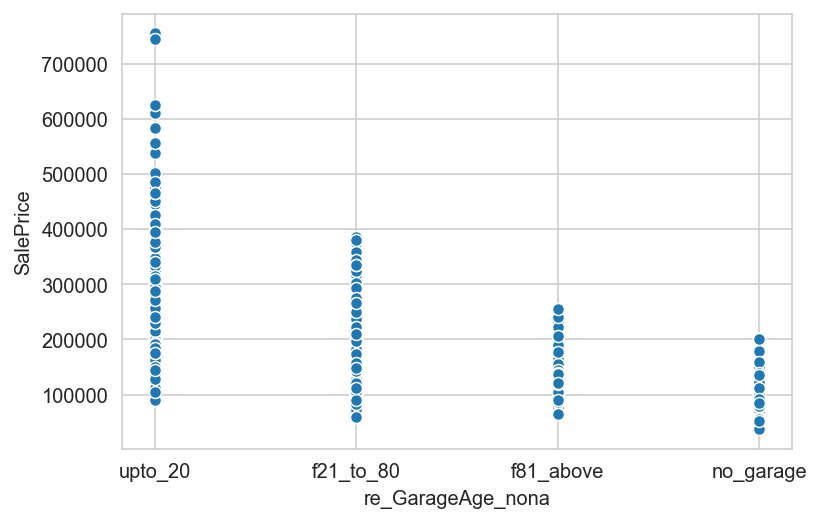

In [268]:
# Based on the scatter plot above, I'll categorise 'GarageAge_nona' as follows:
# - no_garage  (for values, 2010)
# - upto_20
# - f21_to_80
# - f81_above

house['re_GarageAge_nona'] = house['GarageAge_nona'].apply(lambda x: 'no_garage' if x == 2010 else 'upto_20' if x <= 20 else 'f21_to_80' if x >= 21 and x <= 80 else 'f81_above')

vp('re_GarageAge_nona')
# house['re_GarageAge_nona'].shape

2    821
1    365
3    180
0     79
4      5
Name: GarageCars, dtype: int64
0       79
440     49
576     47
240     38
484     34
        ..
582      1
862      1
570      1
562      1
1418     1
Name: GarageArea, Length: 440, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a218b97348>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a218d74cc8>)

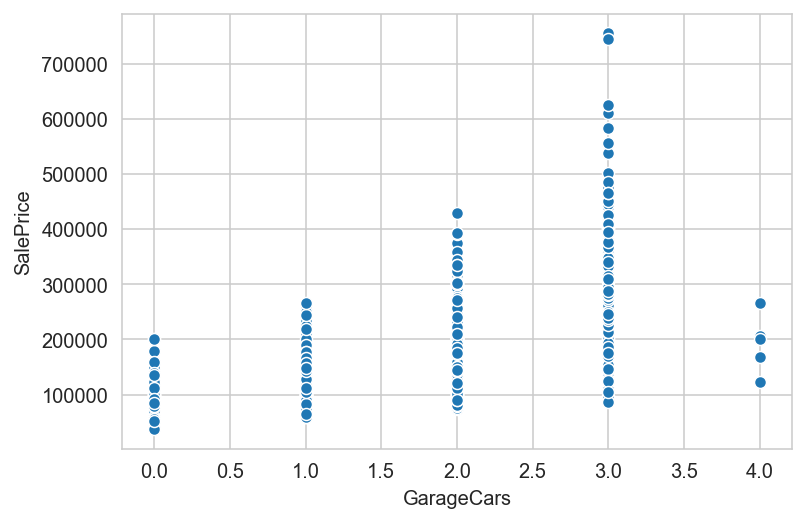

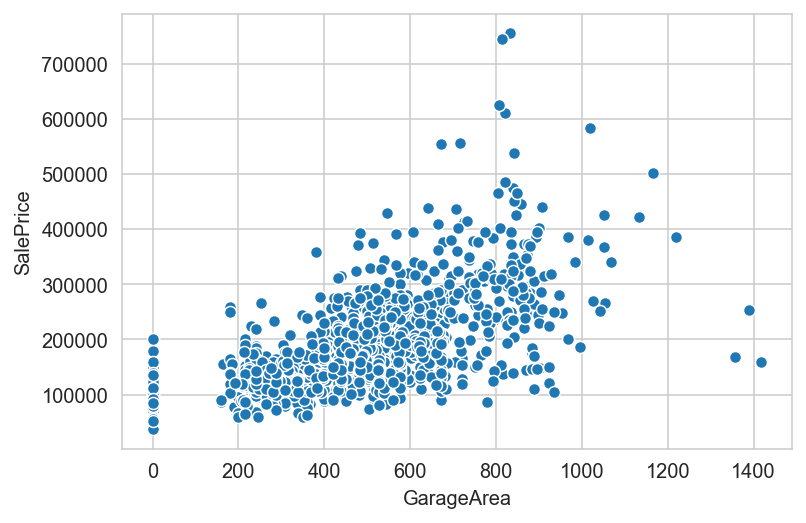

In [269]:
vp('GarageCars'), vp('GarageArea')

In [302]:
# string the values
house['GarageCars'] = house['GarageCars'].astype(str)
# check
house['GarageCars'].dtype

dtype('O')

2    821
1    365
3    180
0     79
4      5
Name: GarageCars, dtype: int64


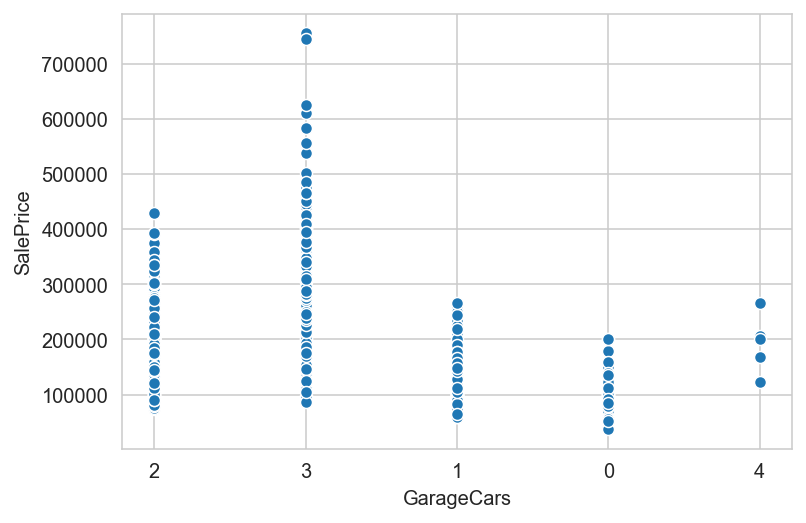

In [300]:
vp('GarageCars')

# Renovatable
use one of 

    GarageQual: Garage quality

	GarageCond: Garage condition
    
GarageFinish: Interior finish of the garage

TA     1303
NaN      79
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64
TA     1319
NaN      79
Fa       34
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a21d1bd7c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a21d209348>)

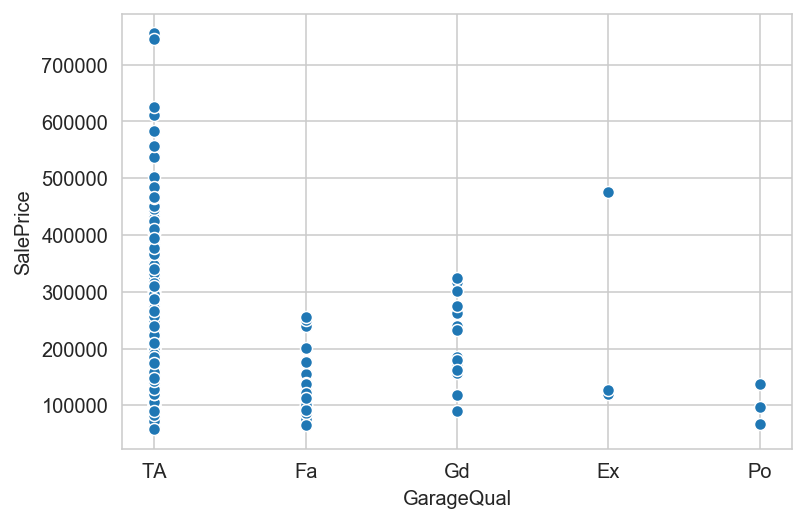

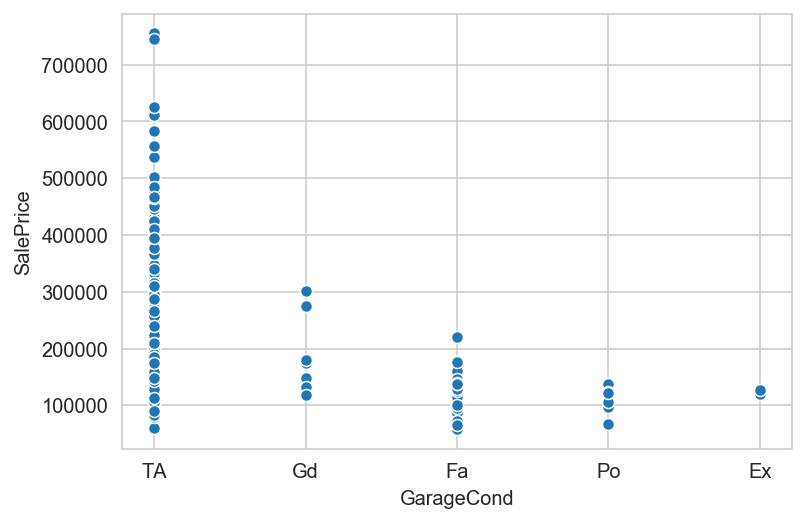

In [307]:
vp('GarageQual'), vp('GarageCond')

In [308]:
house[['GarageQual_nona', 'GarageCond_nona']] = house[['GarageQual', 'GarageCond']].fillna(value = 'no_garage')

TA           1303
no_garage      79
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual_nona, dtype: int64
TA           1319
no_garage      79
Fa             34
Gd              9
Po              7
Ex              2
Name: GarageCond_nona, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a21d2647c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a21d2c1148>)

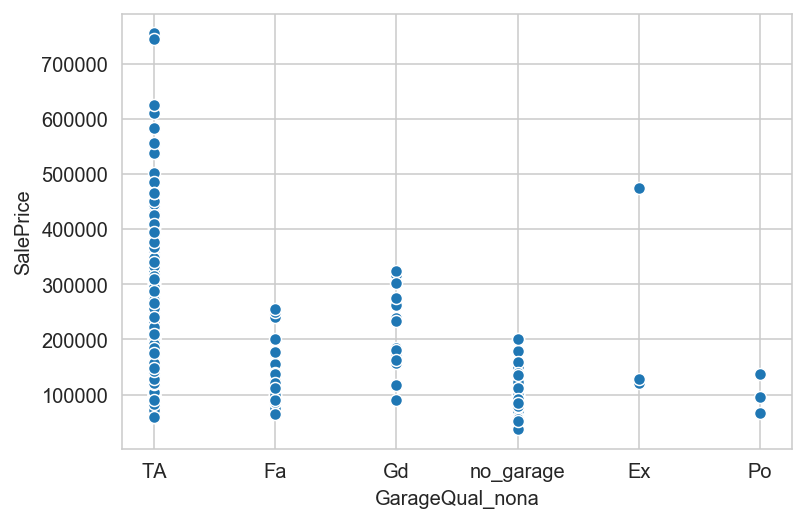

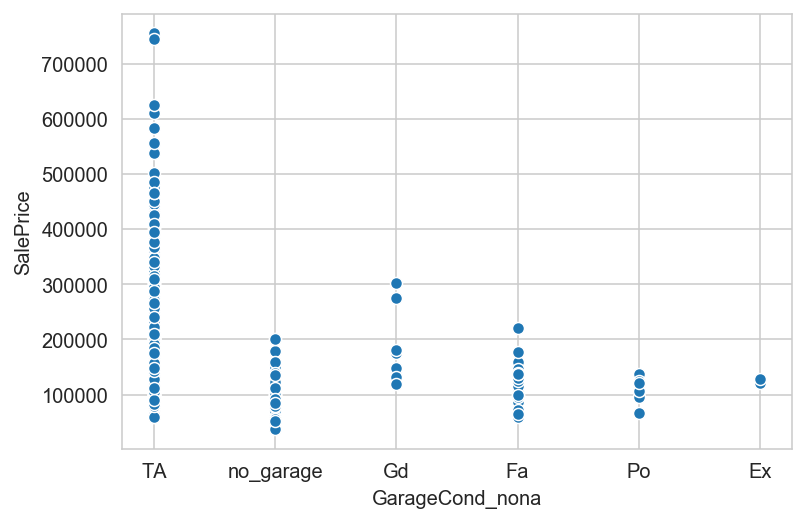

In [309]:
vp('GarageQual_nona'), vp('GarageCond_nona')

Unf    600
RFn    419
Fin    352
NaN     79
Name: GarageFinish, dtype: int64


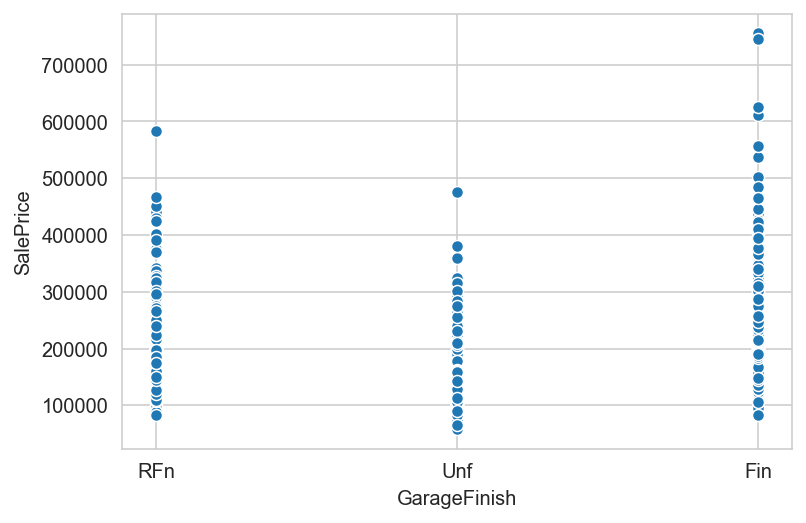

In [310]:
vp('GarageFinish')

Unf          600
RFn          419
Fin          352
no_garage     79
Name: GarageFinish_nona, dtype: int64


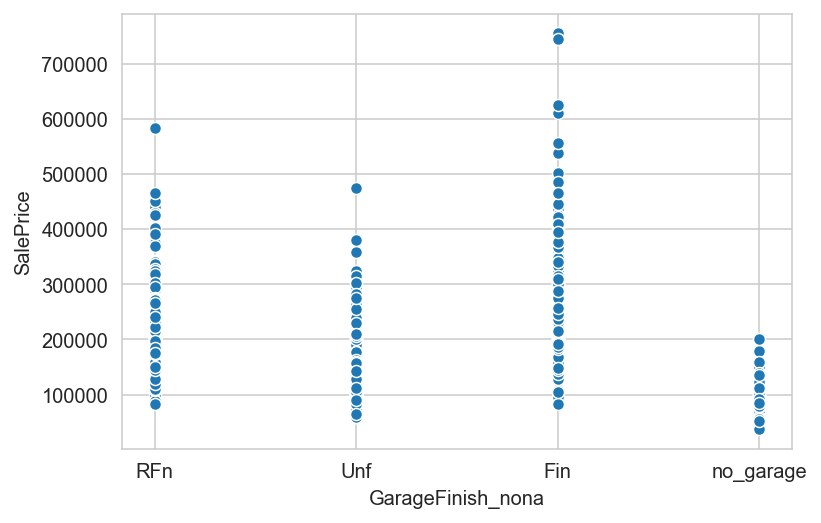

In [311]:
house['GarageFinish_nona'] = house['GarageFinish'].fillna(value = 'no_garage')
vp('GarageFinish_nona')

# Fixed

PoolArea: Pool area in square feet

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

MiscFeature: Miscellaneous feature not covered in other categories
- Shed or not! 2 dummies

MiscVal: $Value of miscellaneous feature

SaleType: Type of sale

    dummies

SaleCondition: Condition of sale

    dummies


0      1443
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64
6     252
7     233
5     204
4     140
8     121
3     106
10     87
11     77
9      62
12     59
1      57
2      52
Name: MoSold, dtype: int64
2009    336
2007    328
2006    312
2008    302
2010    172
Name: YrSold, dtype: int64
NaN     1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64
0        1400
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
800         1
1150        1
3500        1
15500       1
2500        1
1300        1
1400        1
350         1
8300        1
620         1
Name: MiscVal, dtype: int64
WD       1261
New       122
COD        41
ConLD       7
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4

(<matplotlib.axes._subplots.AxesSubplot at 0x2a21e7d2b88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a21e9c1708>)

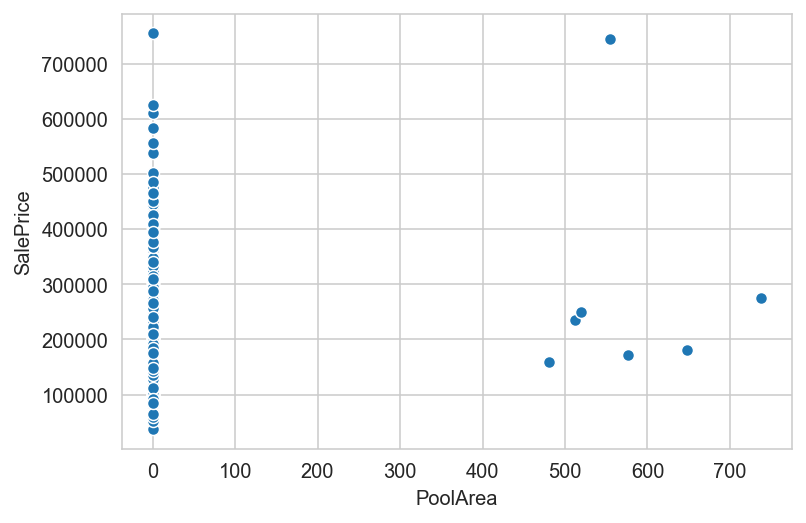

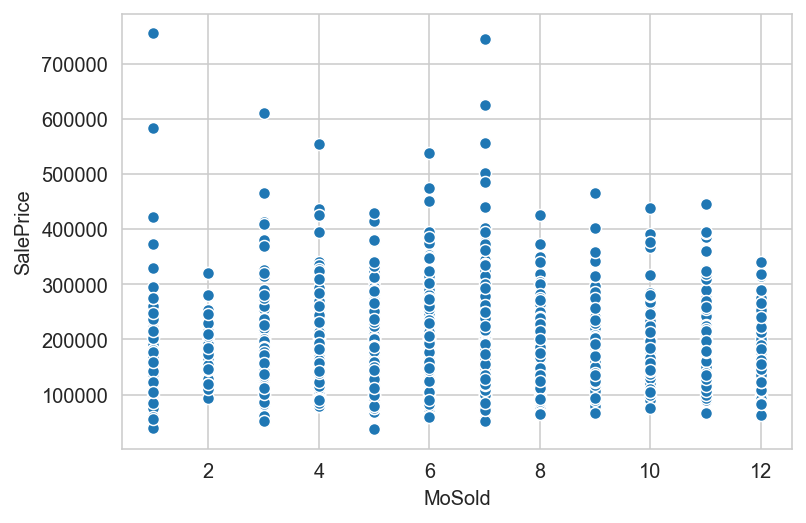

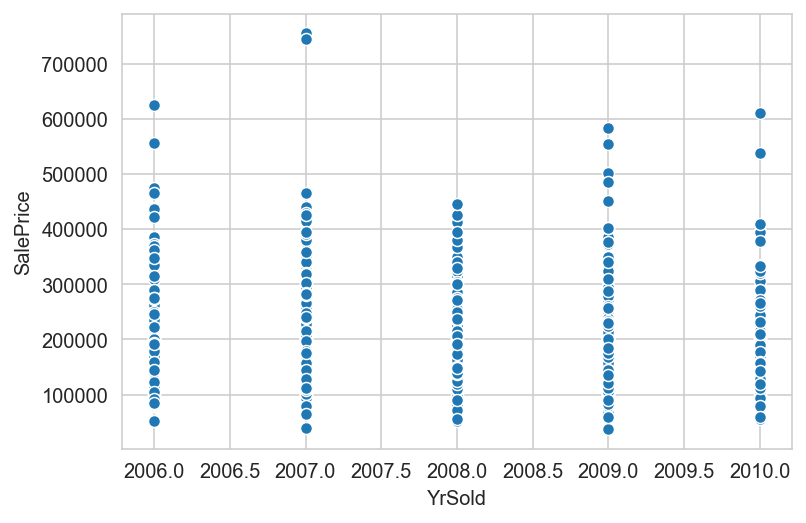

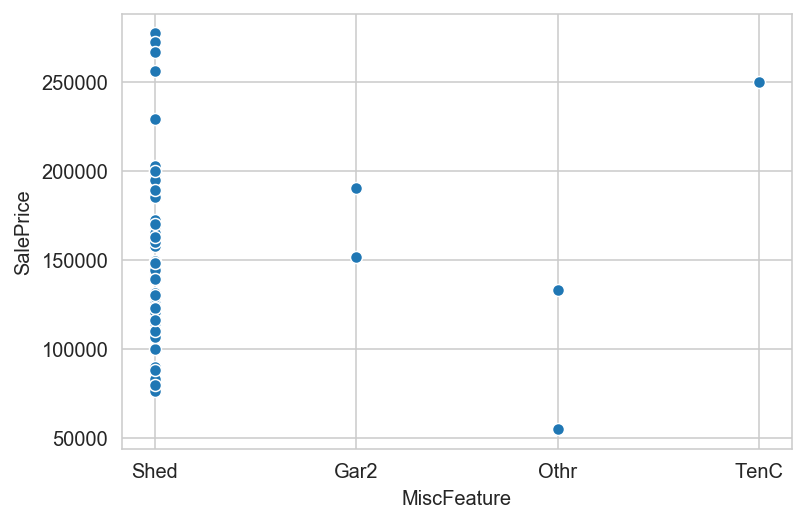

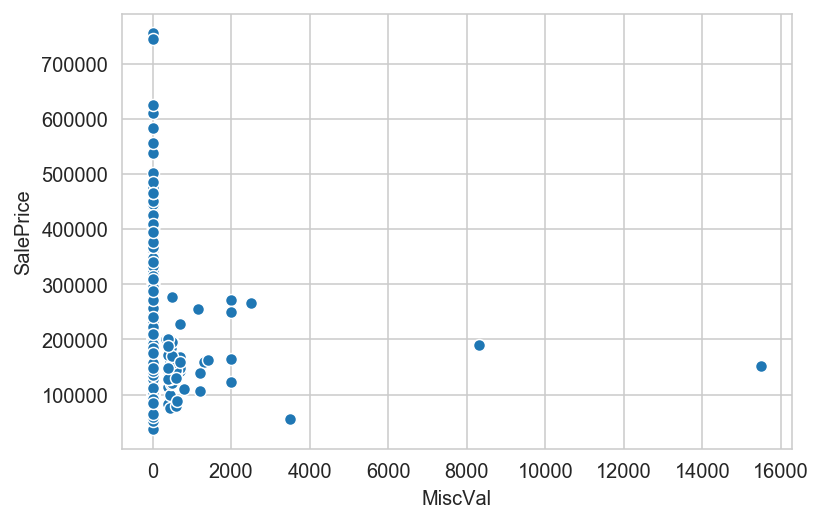

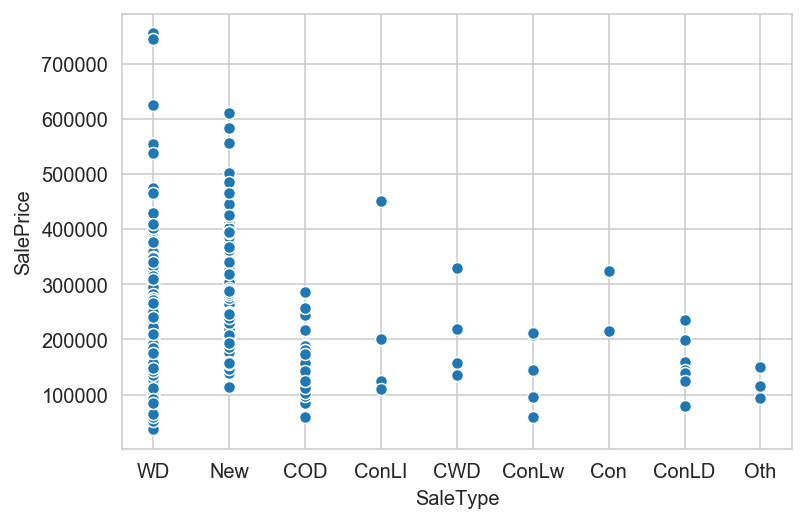

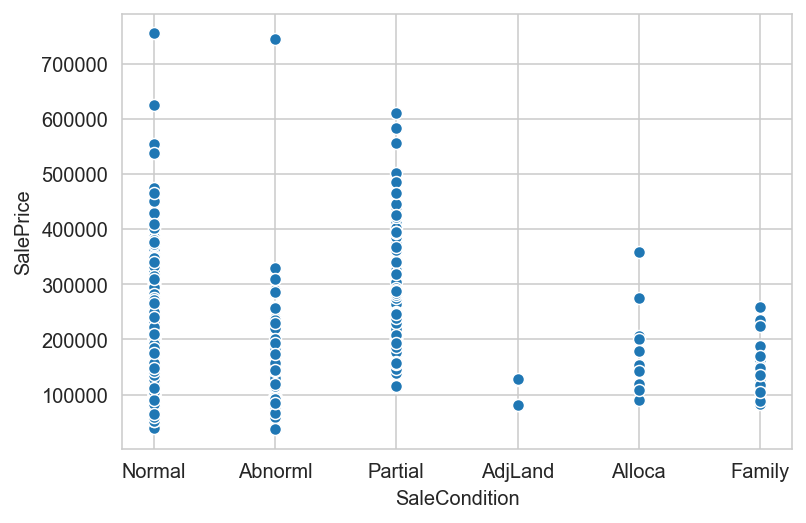

In [312]:
vp('PoolArea'), vp('MoSold'), vp('YrSold'), vp('MiscFeature'), vp('MiscVal'), vp('SaleType'), vp('SaleCondition') 

In [313]:
house['MiscFeature'].value_counts(dropna=False)

NaN     1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [314]:
house['MiscVal'].value_counts(dropna=False)

0        1400
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
800         1
1150        1
3500        1
15500       1
2500        1
1300        1
1400        1
350         1
8300        1
620         1
Name: MiscVal, dtype: int64

In [315]:
house[house['MiscVal'] != 0]['MiscVal'].mean()

1257.6

In [316]:
house[house['MiscFeature'] == 'Gar2']['MiscVal'].mean()

11900.0

In [317]:
house[house['MiscVal'] == 15500]['MiscFeature']

346    Gar2
Name: MiscFeature, dtype: object

In [318]:
house[house['MiscVal'] == 15500]['SalePrice']

346    151500
Name: SalePrice, dtype: int64

In [319]:
house[house['MiscFeature'] == 'TenC']['MiscVal']

1386    2000
Name: MiscVal, dtype: int64

NaN     1398
Shed      47
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64


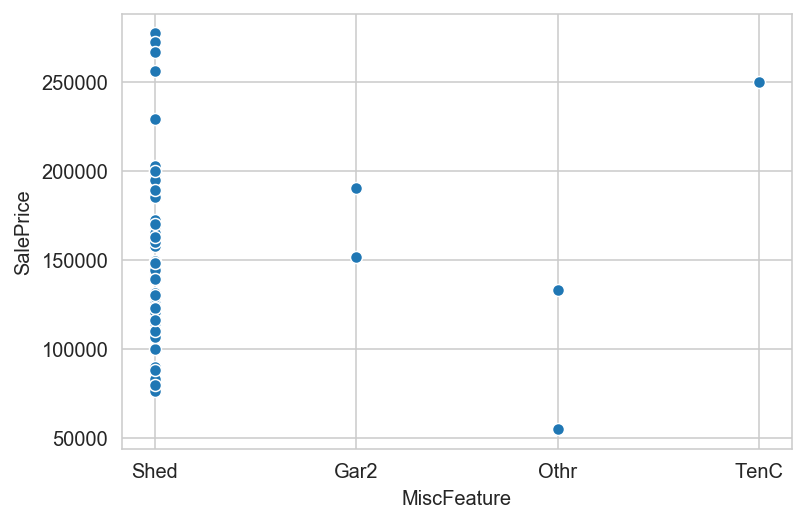

In [320]:
vp('MiscFeature')

In [321]:
# Replacing NaN with 'no_feature'

house['MiscFeature_nona'] = house['MiscFeature'].fillna(value = 'no_feature', inplace = False)

no_feature    1398
Shed            47
Othr             2
Gar2             2
TenC             1
Name: MiscFeature_nona, dtype: int64


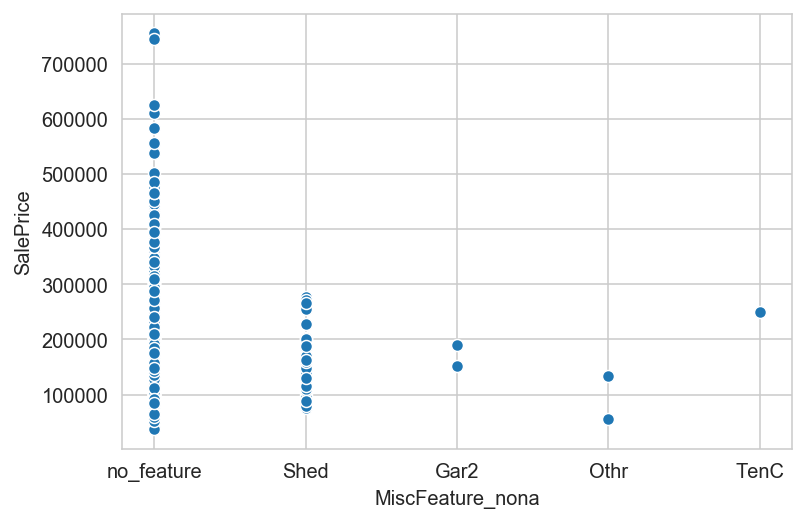

In [322]:
vp('MiscFeature_nona')

6     252
7     233
5     204
4     140
8     121
3     106
10     87
11     77
9      62
12     59
1      57
2      52
Name: MoSold, dtype: int64


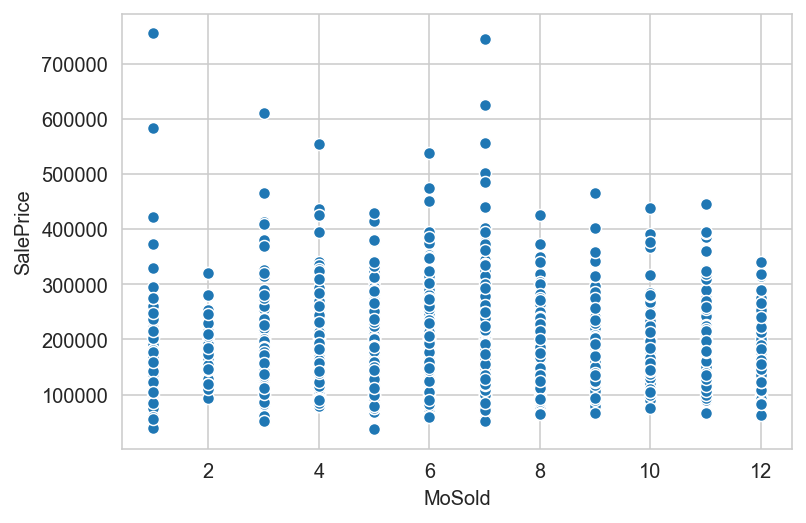

In [323]:
vp('MoSold')

In [324]:
house['re_quarter_MoSold'] = house['MoSold'].apply(lambda x: 'First_q' if x in [1,2,3] else 'Second_q' if x in [4,5,6] else 'Third_q' if x in [7,8,9] else 'Fourth_q')

Second_q    596
Third_q     416
Fourth_q    223
First_q     215
Name: re_quarter_MoSold, dtype: int64


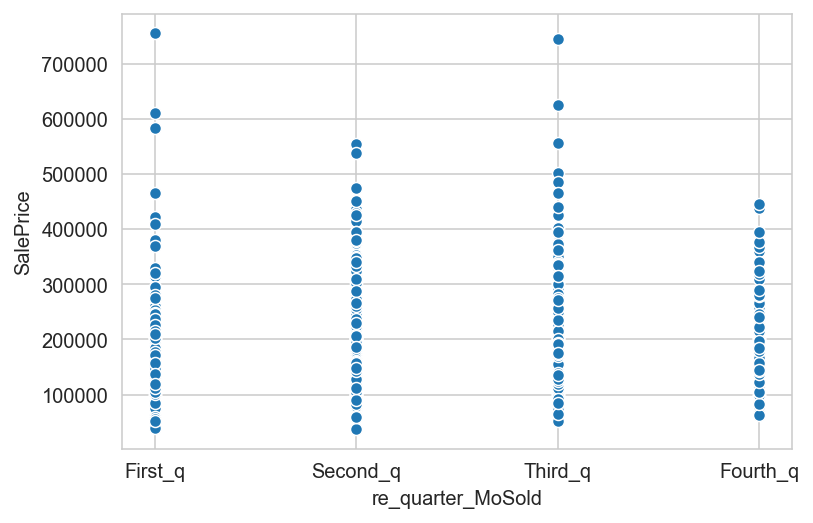

In [325]:
vp('re_quarter_MoSold')


# Renovatable

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolQC: Pool quality

Fence: Fence quality

Y    1335
N      85
P      30
Name: PavedDrive, dtype: int64
0      753
192     38
100     36
144     33
120     31
      ... 
243      1
242      1
241      1
536      1
857      1
Name: WoodDeckSF, Length: 273, dtype: int64
0      650
36      29
48      22
20      20
45      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: OpenPorchSF, Length: 201, dtype: int64
0      1248
112      15
96        6
216       5
192       5
       ... 
140       1
143       1
275       1
145       1
552       1
Name: EnclosedPorch, Length: 118, dtype: int64
0      1426
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64
0      1335
192       6
120       5
224       5
180       4
       ... 
197       1
190       1
185       1
440       1
182       1
Name: ScreenPorch, Length: 

(<matplotlib.axes._subplots.AxesSubplot at 0x2a21d3011c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a21d54bac8>)

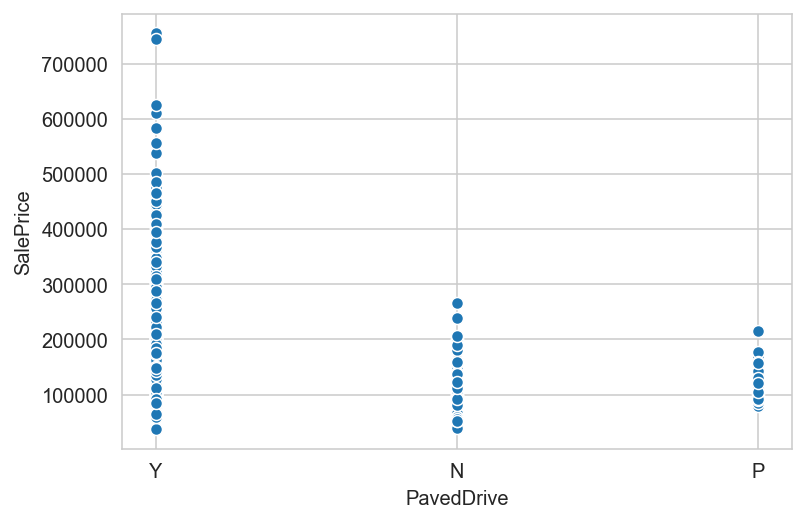

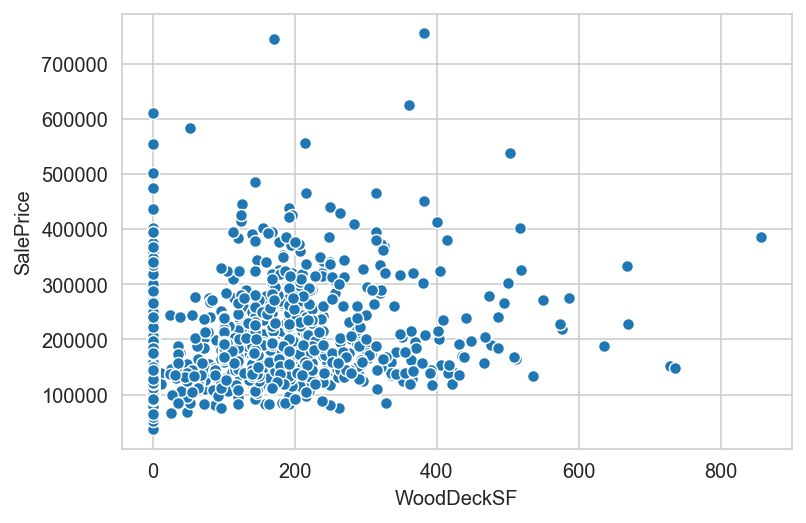

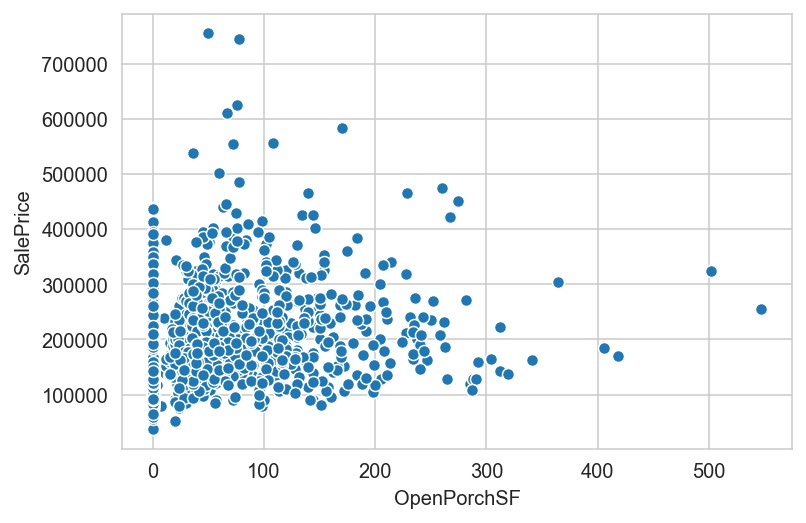

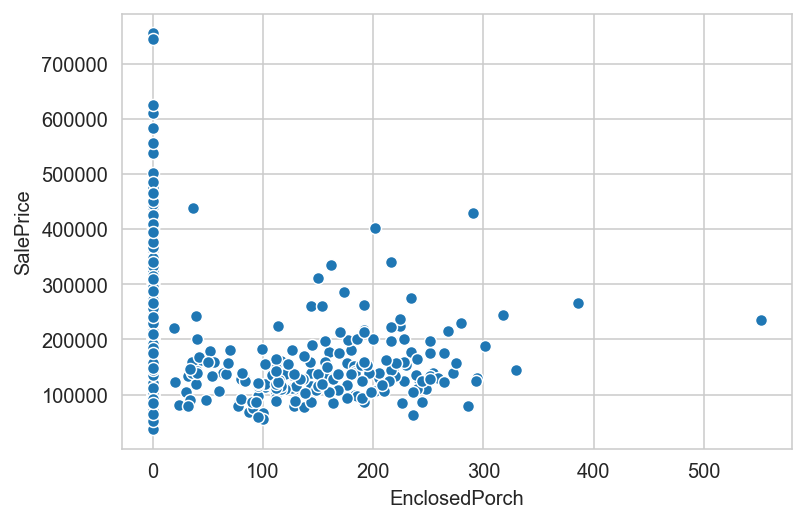

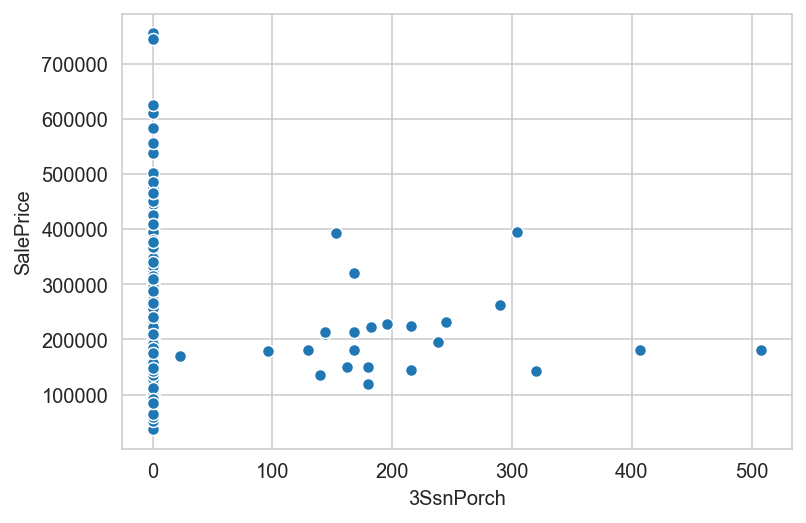

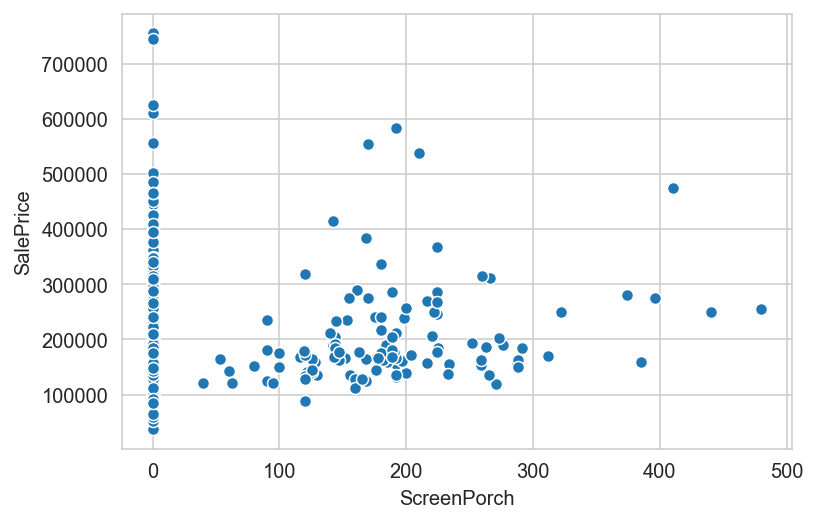

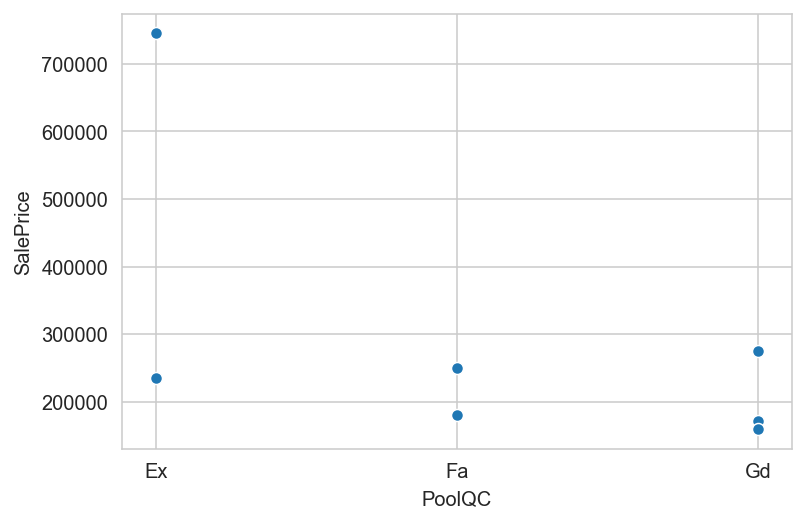

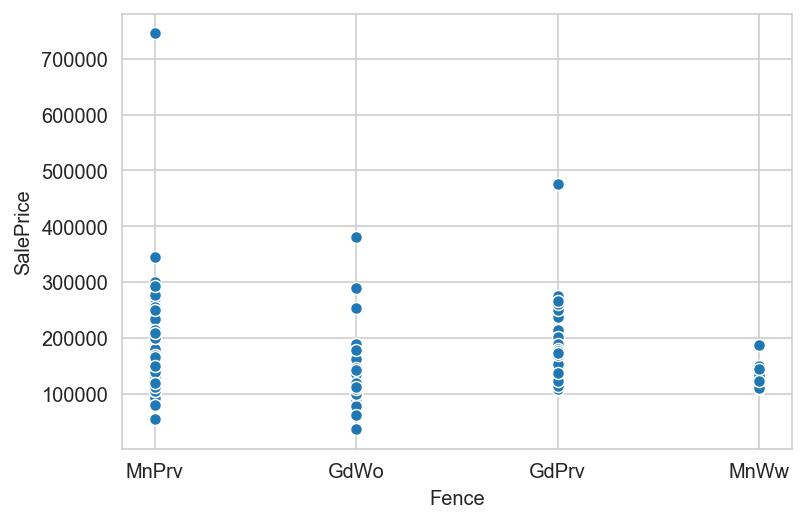

In [326]:
vp('PavedDrive'), vp('WoodDeckSF'), vp('OpenPorchSF'), vp('EnclosedPorch'), vp('3SsnPorch'), vp('ScreenPorch'), vp('PoolQC'), vp('Fence')

In [327]:
# check if any of these columns have NaN
    # 'WoodDeckSF'
    # 'OpenPorchSF'
    # 'EnclosedPorch'
    # '3SsnPorch'
    # 'ScreenPorch'

# house[house['WoodDeckSF'].isna()]
# house[house['OpenPorchSF'].isna()]
# house[house['EnclosedPorch'].isna()]
# house[house['3SsnPorch'].isna()]
house[house['ScreenPorch'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, r_MSSubClass, Alley_nona, r_Neighborhood, r_Condition1, Age, Age_pow2, Age_sqrt, Age_inv, Age_log, RemodAge, RemodAge_inv, RemodAge_pow2, RemodAge_sqrt, RemodAge_log, r_Remod_diff, MasVnrType_nona, MasVnrArea_nona, BsmtCond_nona, BsmtFinType1_nona, ...]
Index: []

[0 rows x 123 columns]

0      1426
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: ThreeSsnPorch, dtype: int64
0      1426
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


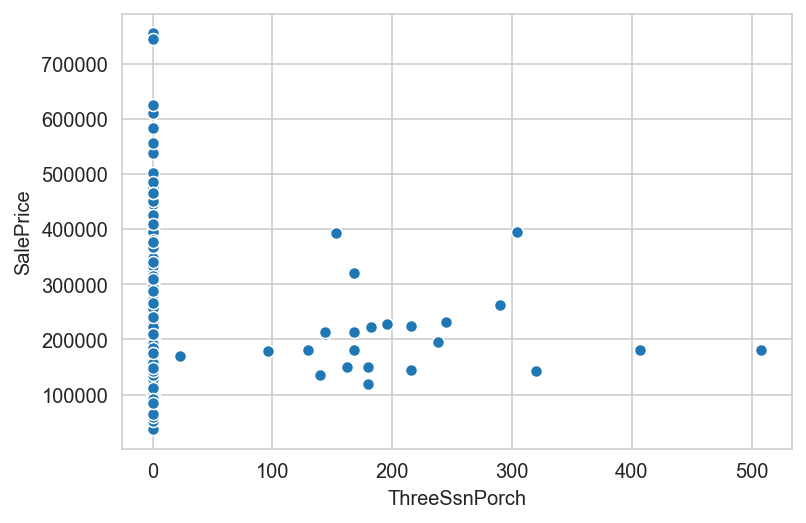

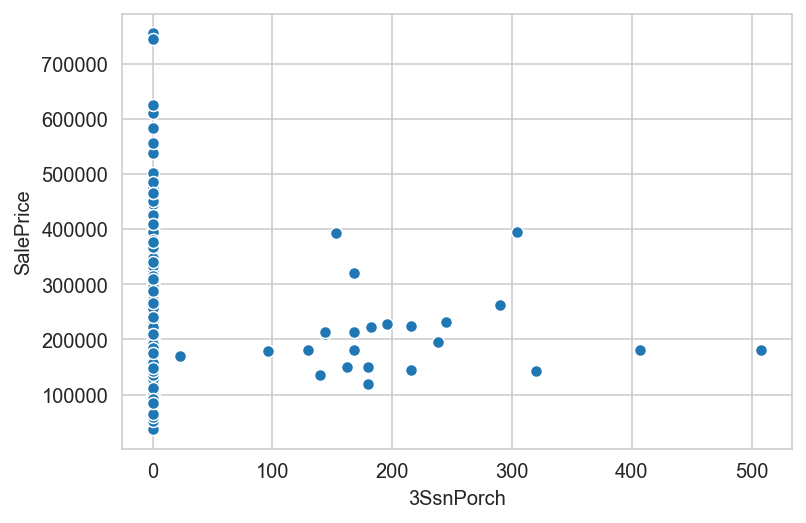

In [328]:
house['ThreeSsnPorch'] = house['3SsnPorch'].copy();
vp('ThreeSsnPorch'), vp('3SsnPorch');

no_pool    1443
Gd            3
Fa            2
Ex            2
Name: PoolQC_nona, dtype: int64
no_fence    1172
MnPrv        155
GdPrv         59
GdWo          53
MnWw          11
Name: Fence_nona, dtype: int64


(<matplotlib.axes._subplots.AxesSubplot at 0x2a220fbecc8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a220fe2f88>)

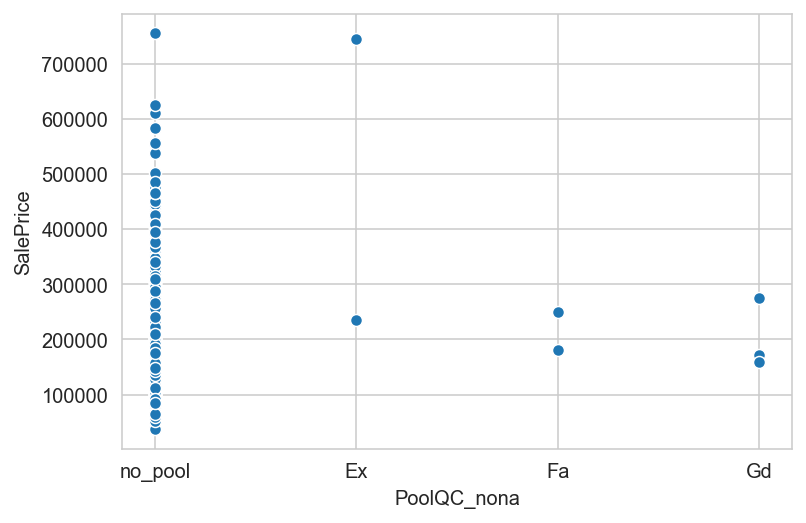

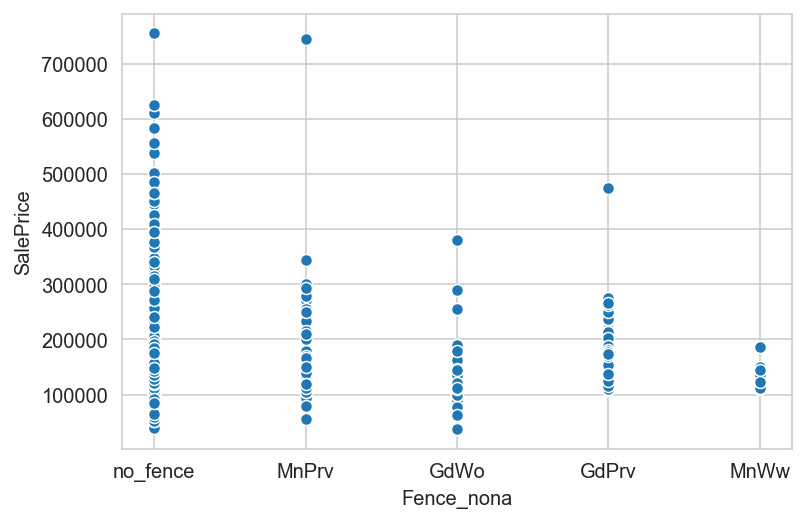

In [329]:
# replacing NaN with 'no_pool' and 'no_fence' respectively

house['PoolQC_nona'] = house['PoolQC'].fillna(value = 'no_pool')
house['Fence_nona'] = house['Fence'].fillna(value = 'no_fence')

vp('PoolQC_nona'), vp('Fence_nona')

In [330]:
pprint(sorted(list(house.columns)))

# checking for repeats in column names post EDA
len(list(house.columns)) == len(set(house.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Age',
 'Age_inv',
 'Age_log',
 'Age_pow2',
 'Age_sqrt',
 'Alley',
 'Alley_nona',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtCond_nona',
 'BsmtExposure',
 'BsmtExposure_nona',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType1_nona',
 'BsmtFinType2',
 'BsmtFinType2_nona',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtQual_nona',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'Electrical_nona',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Fence_nona',
 'FireplaceQu',
 'FireplaceQu_nona',
 'Fireplaces',
 'FirstFlrSF',
 'Floors',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageAge_nona',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageCond_nona',
 'GarageFinish',
 'GarageFinish_nona',
 'GarageQual',
 'GarageQual_nona',
 'GarageType',
 'GarageType_nona',
 'GarageYrBlt',
 'GarageYrBlt_clean_copy',
 'GarageYrBlt_nona',
 'GrLivArea',
 'HalfBath',
 '

True

In [331]:
len(list(house.columns))

# includes transformed House age and House remodelled age (+8)

123

## Final EDA step before modeling

#### 1. Removing column, 'Id'



In [332]:
df_fr = house.drop(columns = 'Id', inplace = False)
df_fr.shape

(1450, 122)

#### 2. Removing rows that have non-residential MSZoning

In [333]:
house.MSZoning.value_counts(dropna=False)

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [334]:
# dropping non-residential rows

df_fr = df_fr[house['MSZoning'] != 'C (all)']

df_fr.shape      # checking

(1450, 122)

In [337]:
sorted(list(df_fr.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Age',
 'Age_inv',
 'Age_log',
 'Age_pow2',
 'Age_sqrt',
 'Alley',
 'Alley_nona',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtCond_nona',
 'BsmtExposure',
 'BsmtExposure_nona',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType1_nona',
 'BsmtFinType2',
 'BsmtFinType2_nona',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtQual_nona',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'Electrical_nona',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Fence_nona',
 'FireplaceQu',
 'FireplaceQu_nona',
 'Fireplaces',
 'FirstFlrSF',
 'Floors',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageAge_nona',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageCond_nona',
 'GarageFinish',
 'GarageFinish_nona',
 'GarageQual',
 'GarageQual_nona',
 'GarageType',
 'GarageType_nona',
 'GarageYrBlt',
 'GarageYrBlt_clean_copy',
 'GarageYrBlt_nona',
 'GrLivArea',
 'HalfBath',
 '

### **Creating lists and DataFrames of:**

- [`df_f dataframe`]
    - Fixed variables 
        
        - Numerical columns
        - Categorical columns
        
        
        
        
- [`df_r dataframe`]
    - Renovatable variables  
               
        - Numerical columns
        - Categorical columns

In [343]:
# Fixed numerical - FN

fn = ['LotFrontage', 'LotArea', 'Age', 'TotalBsmtSF', 'FirstFlrSF', 
      'SecondFlrSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'MiscVal']

# Fixed categorical - FC

fc = ['r_MSSubClass', 'MSZoning', 'Street', 'Alley_nona', 
      'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
      'r_Neighborhood', 'r_Condition1', 'BldgType', 'HouseStyle', 
      'r_Remod_diff', 'Foundation', 'BsmtQual_nona', 'BsmtExposure_nona', 
      're_FullBath', 're_HalfBath' , 'Fireplaces', 'BedroomAbvGr', 
      'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageType_nona', 're_GarageAge_nona', 
      'GarageCars', 'MiscFeature_nona', 'SaleType', 'SaleCondition', 
      're_quarter_MoSold']


# Renovatable numerical - RN

rn =['MasVnrArea_nona', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
     'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
     'ThreeSsnPorch', 'ScreenPorch']

# # Renovatable categorical - RC

rc = ['Utilities', 'OverallQual', 'OverallCond', 'RoofStyle', 
      'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType_nona', 
      'ExterQual', 'ExterCond', 'BsmtCond_nona', 'BsmtFinType1_nona', 
      'BsmtFinType2_nona', 'Heating', 'HeatingQC', 'CentralAir', 
      'Electrical_nona', 'KitchenQual', 'Functional', 'FireplaceQu_nona', 
      'GarageQual_nona', 'GarageCond_nona', 'PavedDrive', 'PoolQC_nona', 
      'Fence_nona']




In [347]:
len(fn + fc), len(rn + rc), type(fn + fc), type(rn + rc)

(39, 35, list, list)

In [353]:
df_f   =   df_fr [  fn + fc  ]
df_r   =   df_fr [  rn + rc  ]

df_f.shape, df_r.shape

((1450, 39), (1450, 35))

In [354]:
df_f.head(4)

LotFrontage  LotArea  Age  TotalBsmtSF  FirstFlrSF  SecondFlrSF  GrLivArea  \
0         65.0     8450    7          856         856          854       1710   
1         80.0     9600   34         1262        1262            0       1262   
2         68.0    11250    9          920         920          866       1786   
3         60.0     9550   95          756         961          756       1717   

   GarageArea  PoolArea  MiscVal  ... BedroomAbvGr KitchenAbvGr TotRmsAbvGrd  \
0         548         0        0  ...            3            1            8   
1         460         0        0  ...            3            1            6   
2         608         0        0  ...            3            1            6   
3         642         0        0  ...            3            1            7   

  GarageType_nona re_GarageAge_nona GarageCars MiscFeature_nona SaleType  \
0          Attchd           upto_20          2       no_feature       WD   
1          Attchd         f21_to_80          2       no_feature       WD   
2          Attchd           upto_20          2       no_feature       WD   
3          Detchd           upto_20          3       no_feature       WD   

  SaleCondition re_quarter_MoSold  
0        Normal           First_q  
1        Normal          Second_q  
2        Normal           Third_q  
3       Abnorml           First_q  

[4 rows x 39 columns]

In [355]:
df_r.head(4)

MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
0            196.0         706           0        150             0   
1              0.0         978           0        284             0   
2            162.0         486           0        434             0   
3              0.0         216           0        540             0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  ScreenPorch  ...  \
0           0           61              0              0            0  ...   
1         298            0              0              0            0  ...   
2           0           42              0              0            0  ...   
3           0           35            272              0            0  ...   

  CentralAir Electrical_nona KitchenQual Functional FireplaceQu_nona  \
0          Y           SBrkr          Gd        Typ     no_fireplace   
1          Y           SBrkr          TA        Typ               TA   
2          Y           SBrkr          Gd        Typ               TA   
3          Y           SBrkr          Gd        Typ               Gd   

  GarageQual_nona GarageCond_nona PavedDrive PoolQC_nona Fence_nona  
0              TA              TA          Y     no_pool   no_fence  
1              TA              TA          Y     no_pool   no_fence  
2              TA              TA          Y     no_pool   no_fence  
3              TA              TA          Y     no_pool   no_fence  

[4 rows x 35 columns]

#### Creating dummy variables for categorical columns in both DataFrames

In [363]:
df_f_dum = pd.get_dummies(df_f, drop_first=True)
df_r_dum = pd.get_dummies(df_r, drop_first=True)

# if I had more time, I would try to figure out how to drop certain 
# dummy columns and implement that. I want to choose which dummy columns
# will be captured by the intercept.

#### Adding columns, 'SalePrice' & 'YrSold', to both DataFrames

In [374]:
df_f_dum.insert(0, 'YrSold', df_fr['YrSold'])
df_f_dum.head(4);

ValueError: cannot insert YrSold, already exists

In [368]:
df_f_dum.insert(0, 'SalePrice', df_fr['SalePrice'])

df_r_dum.insert(0, 'YrSold', df_fr['YrSold'])
df_r_dum.insert(0, 'SalePrice', df_fr['SalePrice'])

In [373]:
df_f_dum.head(4);

In [370]:
df_r_dum.head(4)

SalePrice  YrSold  MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     208500    2008            196.0         706           0        150   
1     181500    2007              0.0         978           0        284   
2     223500    2008            162.0         486           0        434   
3     140000    2006              0.0         216           0        540   

   LowQualFinSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  ...  \
0             0           0           61              0  ...   
1             0         298            0              0  ...   
2             0           0           42              0  ...   
3             0           0           35            272  ...   

   GarageCond_nona_no_garage  PavedDrive_P  PavedDrive_Y  PoolQC_nona_Fa  \
0                          0             0             1               0   
1                          0             0             1               0   
2                          0             0             1               0   
3                          0             0             1               0   

   PoolQC_nona_Gd  PoolQC_nona_no_pool  Fence_nona_GdWo  Fence_nona_MnPrv  \
0               0                    1                0                 0   
1               0                    1                0                 0   
2               0                    1                0                 0   
3               0                    1                0                 0   

   Fence_nona_MnWw  Fence_nona_no_fence  
0                0                    1  
1                0                    1  
2                0                    1  
3                0                    1  

[4 rows x 144 columns]

In [372]:
# checking if dummy variable columns are created & SalePrice / YrSold 
# have been added:

df_f.shape, df_f_dum.shape, df_r.shape, df_r_dum.shape

((1450, 39), (1450, 142), (1450, 35), (1450, 144))

#### 3. Splitting rows based on 'YrSold'

Creating:

    Train DataFrame  -  Xyf_train
    X train  -  Xf_train
    y train  -  yf_train
    
    Test DataFrame  -  Xyf_test
    X test  -  Xf_test
    y test  -  yf_test

In [504]:
# Training set
#--------------------
# number of rows pre-2010 = 1278

# Training set - Year values
#---------------------------
# 2006    312
# 2007    328
# 2008    302
# 2009    336
# Name: YrSold, dtype: int64


Xyf_train  =  df_f_dum.loc[ df_f_dum[ 'YrSold' ]  != 2010  ]
# Xyf_train

In [384]:
Xyf_train  =  Xyf_train.drop(columns =  'YrSold')

KeyError: "['YrSold'] not found in axis"

In [386]:
Xyf_train.shape

(1278, 141)

In [389]:
yf_train =  Xyf_train['SalePrice']
Xf_train = Xyf_train.drop(columns = 'SalePrice')

In [391]:
yf_train.shape , Xf_train.shape

((1278,), (1278, 140))

In [392]:
# Test set
#--------------------
# number of rows for 2010 = 172

Xyf_test  =  df_f_dum.loc[ df_f_dum[ 'YrSold' ]  == 2010  ]

In [393]:
Xyf_test.shape

(172, 142)

In [394]:
Xyf_test  =  Xyf_test.drop(columns =  'YrSold')
Xyf_test.shape

(172, 141)

In [395]:
yf_test = Xyf_test['SalePrice']
Xf_test = Xyf_test.drop(columns = 'SalePrice')
yf_test.shape , Xf_test.shape

((172,), (172, 140))

## Simplistic model

### Keeping only numerical columns and removing any columns with null values

#### Using the pseudocode:
##### house.columns where house.columns dtypes == int64 or float64 and each column has non-null values

In [ ]:
simple_df = df.select_dtypes(exclude='object');

type(simple_df)
# simple_df = df.select_dtypes(exclude='object').info();

In [ ]:
df.select_dtypes(exclude='object').shape, df.select_dtypes(exclude='object').dropna().shape

In [ ]:
# dropna() drops all columns and rows that have null value
# df.select_dtypes(exclude='object').dropna().info()

simple_df.dropna(axis=1, inplace=True)

In [ ]:
# simple_df.info()
simple_df.shape

In [ ]:
X_simple = simple_df.copy()

X_simple.shape

In [ ]:
X_simple.columns

------

This is the comprehensive predictor matrix. Some columns in X however, need to be changed such as: 

    - 'MSSubClass' get_dummies as the values are ordinal labels
    - 'YearBuilt' - changed to number of years in EDA
    - 'YearRemodAdd' - change to number of years in EDA
    - 'MoSold' - get_dummy
    - 'YrSold' - this ise used to train test split
----

In [ ]:
# performed in EDA above:  X['Age'] = 2010 - X['YearBuilt']
X_simple['Age'].hist()

In [ ]:
X_simple.YearBuilt.hist()
X_simple.YearBuilt.max()

In [ ]:
X_simple['YearRemodAdd'].hist()

In [ ]:
# performed in EDA above:  X['Remod_diff'] = 2010 - X['YearRemodAdd']
X_simple['Remod_diff'].hist()

In [ ]:
X_simple.YrSold.value_counts()

In [ ]:
sns.countplot(x = 'YrSold', hue = 'SaleCondition', data = house)

In [ ]:
X_simple.drop(columns = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'MoSold'], inplace = True)
# 'YrSold' - this will be used to split into train and test sets

In [ ]:
X_simple.shape

In [ ]:
X_simple[X_simple['YrSold'] < 2010]

In [ ]:
X_simple[X_simple['YrSold'] == 2010]

In [ ]:
X_simple_train = X_simple[X_simple['YrSold'] < 2010].drop(columns = 'SalePrice')
X_simple_test = X_simple[X_simple['YrSold'] == 2010].drop(columns = 'SalePrice')
X_simple_train.shape, X_simple_test.shape

In [ ]:
y_simple = X_simple['SalePrice']
y_simple_train = X_simple[X_simple['YrSold'] < 2010]['SalePrice']
y_simple_test = X_simple[X_simple['YrSold'] == 2010]['SalePrice']

y_simple_train.shape, y_simple_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_simple_train = ss.fit_transform(X_simple_train)   # only for features not target
Xs_simple_test = ss.transform(X_simple_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

lr.fit(Xs_simple_train, y_simple_train)

In [ ]:
lr.score(Xs_simple_test, y_simple_test)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(lr, X_simple_train, y_simple_train, cv=5)
print("Cross-validated scores:", scores)

# Make cross validated predictions on the test sets
predictions = cross_val_predict(lr, X_simple_test, y_simple_test, cv=5)
plt.scatter(y_simple_test, predictions)

# manually calcualte the r2
r2 = metrics.r2_score(y_simple_test, predictions)
print("Cross-Predicted R2:", r2)

In [ ]:
X_train.columns

## Modeling with fixed variables

Standardisation:

In [396]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xfs_train = ss.fit_transform(Xf_train)   # only for features not target
Xfs_test = ss.transform(Xf_test)

## Model: LinearRegression

In [465]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xfs_train, yf_train)
score_f_train_lr = lr.score(Xfs_train, yf_train)
score_f_test_lr = lr.score(Xfs_test, yf_test)

intercept_f_lr = lr.intercept_
coefficients_f_lr = lr.coef_

In [449]:
len(coefficients_f_lr)

140

Creating a DataFrame of coefficients:

In [450]:
# Method 1

pd.DataFrame(list(zip(Xf_train.columns, coefficients_f_lr)))

0             1
0                      LotFrontage -2.213540e+03
1                          LotArea  4.556006e+03
2                              Age -7.641016e+03
3                      TotalBsmtSF  5.298703e+03
4                       FirstFlrSF  9.012617e+03
5                      SecondFlrSF  1.971694e+04
6                        GrLivArea  1.748995e+04
7                       GarageArea -1.556942e+03
8                         PoolArea  1.404716e+03
9                          MiscVal  2.740176e+03
10                r_MSSubClass_new  5.266890e+03
11                r_MSSubClass_old  4.715967e+02
12            r_MSSubClass_spl_foy  2.764753e+03
13                     MSZoning_RH -7.068109e+02
14                     MSZoning_RL -1.137173e+03
15                     MSZoning_RM -4.529740e+03
16                     Street_Pave  1.527098e+03
17                 Alley_nona_Pave -3.707861e+01
18             Alley_nona_no_alley  4.717383e+02
19                    LotShape_IR2  2.031331e+03
20                    LotShape_IR3 -1.820141e+03
21                    LotShape_Reg -3.842915e+02
22                 LandContour_HLS  3.598103e+03
23                 LandContour_Low  1.740153e+03
24                 LandContour_Lvl  4.852893e+03
25               LotConfig_CulDSac  1.898756e+03
26                   LotConfig_FR2 -1.002907e+03
27                   LotConfig_FR3 -5.861731e+02
28                LotConfig_Inside -1.719995e+02
29                   LandSlope_Mod  7.287826e+02
30                   LandSlope_Sev -3.528886e+03
31          r_Neighborhood_CollgCr -4.383897e+03
32          r_Neighborhood_Crawfor  1.888649e+03
33          r_Neighborhood_Edwards -7.550896e+03
34          r_Neighborhood_Gilbert -5.397151e+03
35          r_Neighborhood_Mitchel -4.994055e+03
36            r_Neighborhood_NAmes -6.000641e+03
37           r_Neighborhood_NWAmes -3.398652e+03
38          r_Neighborhood_NridgHt  5.534133e+03
39          r_Neighborhood_OldTown -1.718022e+03
40           r_Neighborhood_Sawyer -3.818573e+03
41          r_Neighborhood_SawyerW -1.954705e+03
42          r_Neighborhood_Somerst  1.041327e+03
43              r_Neighborhood_low  2.015724e+00
44                 r_Condition1_EW -1.858116e+03
45              r_Condition1_Feedr -3.072556e+03
46                 r_Condition1_NS  4.377239e+02
47               r_Condition1_Norm  1.408635e+03
48                r_Condition1_off -9.157264e+02
49                 BldgType_2fmCon  2.124573e+03
50                 BldgType_Duplex  2.930421e+03
51                  BldgType_Twnhs -5.132763e+03
52                 BldgType_TwnhsE -5.527872e+03
53               HouseStyle_1.5Unf  2.144047e+03
54               HouseStyle_1Story  8.759911e+03
55               HouseStyle_2.5Fin -7.287896e+02
56               HouseStyle_2.5Unf  6.653179e+02
57               HouseStyle_2Story -5.063709e+03
58               HouseStyle_SFoyer  1.594130e+03
59                 HouseStyle_SLvl  1.803410e+03
60                  r_Remod_diff_1  2.359604e+03
61               Foundation_CBlock  9.688541e+02
62                Foundation_PConc  2.902308e+03
63                 Foundation_Slab -8.992436e+01
64                Foundation_Stone  5.135863e+02
65                 Foundation_Wood -8.048861e+02
66                BsmtQual_nona_Fa -5.538558e+03
67                BsmtQual_nona_Gd -1.598844e+04
68                BsmtQual_nona_TA -1.589447e+04
69       BsmtQual_nona_no_basement -5.284217e+03
70            BsmtExposure_nona_Gd  4.021015e+03
71            BsmtExposure_nona_Mn -1.284383e+03
72            BsmtExposure_nona_No -3.973794e+03
73   BsmtExposure_nona_no_basement -1.320334e+03
74                   re_FullBath_1  1.429205e+16
75                   re_FullBath_2  1.626425e+16
76                   re_FullBath_3  1.354043e+16
77                   re_FullBath_4  3.616805e+15
78                   re_FullBath_6  9.095589e+14
79                   re_HalfBath_1  4.015569e+03
80                   re_HalfBath_2  2.796615e+03
81             

In [451]:
# Method 2

lr_f_coefs = pd.DataFrame({'Fixed_variables':Xf_train.columns,
                            'Coefficients':lr.coef_,
                            'Absolute_coefficients':np.abs(lr.coef_)})

lr_f_coefs


Fixed_variables  Coefficients  Absolute_coefficients
0                      LotFrontage -2.213540e+03           2.213540e+03
1                          LotArea  4.556006e+03           4.556006e+03
2                              Age -7.641016e+03           7.641016e+03
3                      TotalBsmtSF  5.298703e+03           5.298703e+03
4                       FirstFlrSF  9.012617e+03           9.012617e+03
5                      SecondFlrSF  1.971694e+04           1.971694e+04
6                        GrLivArea  1.748995e+04           1.748995e+04
7                       GarageArea -1.556942e+03           1.556942e+03
8                         PoolArea  1.404716e+03           1.404716e+03
9                          MiscVal  2.740176e+03           2.740176e+03
10                r_MSSubClass_new  5.266890e+03           5.266890e+03
11                r_MSSubClass_old  4.715967e+02           4.715967e+02
12            r_MSSubClass_spl_foy  2.764753e+03           2.764753e+03
13                     MSZoning_RH -7.068109e+02           7.068109e+02
14                     MSZoning_RL -1.137173e+03           1.137173e+03
15                     MSZoning_RM -4.529740e+03           4.529740e+03
16                     Street_Pave  1.527098e+03           1.527098e+03
17                 Alley_nona_Pave -3.707861e+01           3.707861e+01
18             Alley_nona_no_alley  4.717383e+02           4.717383e+02
19                    LotShape_IR2  2.031331e+03           2.031331e+03
20                    LotShape_IR3 -1.820141e+03           1.820141e+03
21                    LotShape_Reg -3.842915e+02           3.842915e+02
22                 LandContour_HLS  3.598103e+03           3.598103e+03
23                 LandContour_Low  1.740153e+03           1.740153e+03
24                 LandContour_Lvl  4.852893e+03           4.852893e+03
25               LotConfig_CulDSac  1.898756e+03           1.898756e+03
26                   LotConfig_FR2 -1.002907e+03           1.002907e+03
27                   LotConfig_FR3 -5.861731e+02           5.861731e+02
28                LotConfig_Inside -1.719995e+02           1.719995e+02
29                   LandSlope_Mod  7.287826e+02           7.287826e+02
30                   LandSlope_Sev -3.528886e+03           3.528886e+03
31          r_Neighborhood_CollgCr -4.383897e+03           4.383897e+03
32          r_Neighborhood_Crawfor  1.888649e+03           1.888649e+03
33          r_Neighborhood_Edwards -7.550896e+03           7.550896e+03
34          r_Neighborhood_Gilbert -5.397151e+03           5.397151e+03
35          r_Neighborhood_Mitchel -4.994055e+03           4.994055e+03
36            r_Neighborhood_NAmes -6.000641e+03           6.000641e+03
37           r_Neighborhood_NWAmes -3.398652e+03           3.398652e+03
38          r_Neighborhood_NridgHt  5.534133e+03           5.534133e+03
39          r_Neighborhood_OldTown -1.718022e+03           1.718022e+03
40           r_Neighborhood_Sawyer -3.818573e+03           3.818573e+03
41          r_Neighborhood_SawyerW -1.954705e+03           1.954705e+03
42          r_Neighborhood_Somerst  1.041327e+03           1.041327e+03
43              r_Neighborhood_low  2.015724e+00           2.015724e+00
44                 r_Condition1_EW -1.858116e+03           1.858116e+03
45              r_Condition1_Feedr -3.072556e+03           3.072556e+03
46                 r_Condition1_NS  4.377239e+02           4.377239e+02
47               r_Condition1_Norm  1.408635e+03           1.408635e+03
48                r_Condition1_off -9.157264e+02           9.157264e+02
49                 BldgType_2fmCon  2.124573e+03           2.124573e+03
50                 BldgType_Duplex  2.930421e+03           2.930421e+03
51                  BldgType_Twnhs -5.132763e+03           5.132763e+03
52                 BldgType_TwnhsE -5.527872e+03           5.527872e+03
53               HouseStyle_1.5Unf  2.144047e+03           2.144047e+03
54               HouseStyle_1Story  8.759911e+03           

In [452]:
lr_f_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
lr_f_coefs

Fixed_variables  Coefficients  Absolute_coefficients
117                   GarageCars_2  1.834938e+16           1.834938e+16
75                   re_FullBath_2  1.626425e+16           1.626425e+16
116                   GarageCars_1  1.602539e+16           1.602539e+16
74                   re_FullBath_1  1.429205e+16           1.429205e+16
76                   re_FullBath_3  1.354043e+16           1.354043e+16
118                   GarageCars_3  1.243533e+16           1.243533e+16
112      GarageType_nona_no_garage  4.151990e+15           4.151990e+15
114    re_GarageAge_nona_no_garage  4.150304e+15           4.150304e+15
98                 TotRmsAbvGrd_14 -4.096416e+15           4.096416e+15
92                  BedroomAbvGr_8  4.096416e+15           4.096416e+15
77                   re_FullBath_4  3.616805e+15           3.616805e+15
119                   GarageCars_4  2.309139e+15           2.309139e+15
78                   re_FullBath_6  9.095589e+14           9.095589e+14
82                   re_HalfBath_4  9.095589e+14           9.095589e+14
5                      SecondFlrSF  1.971694e+04           1.971694e+04
88                  BedroomAbvGr_3 -1.812668e+04           1.812668e+04
6                        GrLivArea  1.748995e+04           1.748995e+04
107         GarageType_nona_Attchd  1.657034e+04           1.657034e+04
67                BsmtQual_nona_Gd -1.598844e+04           1.598844e+04
68                BsmtQual_nona_TA -1.589447e+04           1.589447e+04
111         GarageType_nona_Detchd  1.493266e+04           1.493266e+04
103                 TotRmsAbvGrd_6 -1.336024e+04           1.336024e+04
87                  BedroomAbvGr_2 -1.302936e+04           1.302936e+04
89                  BedroomAbvGr_4 -1.273344e+04           1.273344e+04
104                 TotRmsAbvGrd_7 -1.252700e+04           1.252700e+04
102                 TotRmsAbvGrd_5 -1.234721e+04           1.234721e+04
93                  KitchenAbvGr_1  1.213331e+04           1.213331e+04
123    MiscFeature_nona_no_feature  1.142076e+04           1.142076e+04
129                   SaleType_New  1.070314e+04           1.070314e+04
121          MiscFeature_nona_Shed  1.060800e+04           1.060800e+04
90                  BedroomAbvGr_5 -9.219798e+03           9.219798e+03
4                       FirstFlrSF  9.012617e+03           9.012617e+03
54               HouseStyle_1Story  8.759911e+03           8.759911e+03
105                 TotRmsAbvGrd_8 -8.737367e+03           8.737367e+03
2                              Age -7.641016e+03           7.641016e+03
33          r_Neighborhood_Edwards -7.550896e+03           7.550896e+03
101                 TotRmsAbvGrd_4 -7.219970e+03           7.219970e+03
109        GarageType_nona_BuiltIn  6.669657e+03           6.669657e+03
106                 TotRmsAbvGrd_9 -6.056138e+03           6.056138e+03
36            r_Neighborhood_NAmes -6.000641e+03           6.000641e+03
66                BsmtQual_nona_Fa -5.538558e+03           5.538558e+03
38          r_Neighborhood_NridgHt  5.534133e+03           5.534133e+03
52                 BldgType_TwnhsE -5.527872e+03           5.527872e+03
34          r_Neighborhood_Gilbert -5.397151e+03           5.397151e+03
84                    Fireplaces_2  5.388930e+03           5.388930e+03
3                      TotalBsmtSF  5.298703e+03           5.298703e+03
69       BsmtQual_nona_no_basement -5.284217e+03           5.284217e+03
10                r_MSSubClass_new  5.266890e+03           5.266890e+03
51                  BldgType_Twnhs -5.132763e+03           5.132763e+03
57               HouseStyle_2Story -5.063709e+03           5.063709e+03
35          r_Neighborhood_Mitchel -4.994055e+03           4.994055e+03
24                 LandContour_Lvl  4.852893e+03           4.852893e+03
91                  BedroomAbvGr_6 -4.693008e+03           4.693008e+03
1                          LotArea  4.556006e+03           4.556006e+03
15                     MSZoning_RM -4.529740e+03           

In [525]:
print('The score of the LinearRegression model with fixed variables (train set) is {}.'.format(score_f_train_lr))
print('_'*120)
print('\n')

print('The score of the LinearRegression model with fixed variables (test set) is {}.'.format(score_f_test_lr ))
print('_'*120)
print('\n')

print('The intercept of the LinearRegression model with fixed variables is {}'.format(intercept_f_lr))
print('_'*120)
print('\n')

print('The top ten coefficients of the LinearRegression model with fixed variables are:')
lr_f_coefs.head(10)


The score of the LinearRegression model with fixed variables (train set) is 0.860915299814108.
________________________________________________________________________________________________________________________


The score of the LinearRegression model with fixed variables (test set) is 0.8696470489985181.
________________________________________________________________________________________________________________________


The intercept of the LinearRegression model with fixed variables is 181989.34750444745
________________________________________________________________________________________________________________________


The top ten coefficients of the LinearRegression model with fixed variables are:


Fixed_variables  Coefficients  Absolute_coefficients
117                 GarageCars_2  1.834938e+16           1.834938e+16
75                 re_FullBath_2  1.626425e+16           1.626425e+16
116                 GarageCars_1  1.602539e+16           1.602539e+16
74                 re_FullBath_1  1.429205e+16           1.429205e+16
76                 re_FullBath_3  1.354043e+16           1.354043e+16
118                 GarageCars_3  1.243533e+16           1.243533e+16
112    GarageType_nona_no_garage  4.151990e+15           4.151990e+15
114  re_GarageAge_nona_no_garage  4.150304e+15           4.150304e+15
98               TotRmsAbvGrd_14 -4.096416e+15           4.096416e+15
92                BedroomAbvGr_8  4.096416e+15           4.096416e+15

In [497]:
from sklearn import metrics

In [498]:
r2_score_f_lr_train = metrics.r2_score(yf_train, lr.predict(Xfs_train))
r2_score_f_lr_test = metrics.r2_score(yf_test, lr.predict(Xfs_test))

mae_f_lr_train = metrics.mean_absolute_error(yf_train, lr.predict(Xfs_train))

mse_f_lr_train = metrics.mean_squared_error(yf_train, lr.predict(Xfs_train))

# metrics.explained_variance_score(yf_train, lr.predict(Xfs_train))

In [499]:
print('The R2 score of the LinearRegression model with fixed variables (train set) is {}.'.format(r2_score_f_lr_train))
print('_'*120)
print('\n')

print('The R2 score of the LinearRegression model with fixed variables (test set) is {}.'.format(r2_score_f_lr_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the LinearRegression model with fixed variables is {}.'.format(mae_f_lr_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the LinearRegression model with fixed variables is {}.'.format(mse_f_lr_train))

The R2 score of the LinearRegression model with fixed variables (train set) is 0.860915299814108.
________________________________________________________________________________________________________________________


The R2 score of the LinearRegression model with fixed variables (test set) is 0.8696470489985181.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the LinearRegression model with fixed variables is 18860.52032340684.
________________________________________________________________________________________________________________________


The Mean Squared Error of the LinearRegression model with fixed variables is 869440273.4878469.


## Calculating the residuals from LinearRegression to use in Question 2

In [501]:
yf_lr_pred_train = lr.predict(Xfs_train)
yf_lr_pred_test = lr.predict(Xfs_test)

yr_lr_train = yf_train - yf_lr_pred_train
    
yr_lr_test = yf_test - yf_lr_pred_test

## Model: Ridge CV

In [437]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xfs_train, yf_train)

print(optimal_ridge.alpha_)

460.5922041145108


In [438]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xfs_train, yf_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.89603361 0.80995374 0.8458744  0.72944733 0.76944857 0.83977397
 0.85872503 0.79895767 0.54195446 0.83993695]
0.7930105731249317


In [469]:
ridge.fit(Xfs_train, yf_train)

score_f_train_ridge = ridge.score(Xfs_train, yf_train)
score_f_test_ridge = ridge.score(Xfs_test, yf_test)

intercept_f_ridge = ridge.intercept_
coefficients_f_ridge = ridge.coef_

In [470]:
ridge_f_coefs = pd.DataFrame({'Fixed_variables': Xf_train.columns,
                            'Coefficients': ridge.coef_,
                            'Absolute_coefficients': np.abs(ridge.coef_)})

ridge_f_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
ridge_f_coefs;

In [471]:
print('The score of the Ridge model with fixed variables (train set) is {}.'.format(score_f_train_ridge))
print('_'*120)
print('\n')

print('The score of the Ridge model with fixed variables (test set) is {}.'.format(score_f_test_ridge))
print('_'*120)
print('\n')

print('The intercept of the Ridge model with fixed variables is {}'.format(intercept_f_ridge))
print('_'*120)
print('\n')

print('The top ten coefficients of the Ridge model with fixed variables are:')
ridge_f_coefs.head(10)

The score of the Ridge model with fixed variables (train set) is 0.8348881795915958.
________________________________________________________________________________________________________________________


The score of the Ridge model with fixed variables (test set) is 0.8617689569366351.
________________________________________________________________________________________________________________________


The intercept of the Ridge model with fixed variables is 181989.78247261347
________________________________________________________________________________________________________________________


The top ten coefficients of the Ridge model with fixed variables are:


Fixed_variables  Coefficients  Absolute_coefficients
6                 GrLivArea  11476.968421           11476.968421
4                FirstFlrSF   8607.676337            8607.676337
118            GarageCars_3   8211.931718            8211.931718
3               TotalBsmtSF   6857.935542            6857.935542
38   r_Neighborhood_NridgHt   6650.129784            6650.129784
5               SecondFlrSF   6430.294988            6430.294988
76            re_FullBath_3   6042.704480            6042.704480
84             Fireplaces_2   5523.799923            5523.799923
68         BsmtQual_nona_TA  -5011.266648            5011.266648
67         BsmtQual_nona_Gd  -4473.688684            4473.688684

In [528]:
r2_score_f_ridge_train = metrics.r2_score(yf_train, ridge.predict(Xfs_train))
r2_score_f_ridge_test = metrics.r2_score(yf_test, ridge.predict(Xfs_test))

mae_f_ridge_train = metrics.mean_absolute_error(yf_train, ridge.predict(Xfs_train))

mse_f_ridge_train = metrics.mean_squared_error(yf_train, ridge.predict(Xfs_train))

In [529]:
print('The R2 score of the Ridge model with fixed variables (train set) is {}.'.format(r2_score_f_ridge_train))
print('_'*120)
print('\n')

print('The R2 score of the Ridge model with fixed variables (test set) is {}.'.format(r2_score_f_ridge_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the Ridge model with fixed variables is {}.'.format(mae_f_ridge_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the Ridge model with fixed variables is {}.'.format(mse_f_ridge_train))

The R2 score of the Ridge model with fixed variables (train set) is 0.8348881795915958.
________________________________________________________________________________________________________________________


The R2 score of the Ridge model with fixed variables (test set) is 0.8617689569366351.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the Ridge model with fixed variables is 19489.36923084824.
________________________________________________________________________________________________________________________


The Mean Squared Error of the Ridge model with fixed variables is 1032139883.8268527.


## Model: Lasso CV

In [463]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xfs_train, yf_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1964.4116043577692


.........................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


In [464]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xfs_train, yf_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.87729595 0.82676563 0.84398374 0.73577033 0.7804244  0.83126388
 0.86350609 0.77994673 0.54929372 0.84313295]
0.7931383409110077


In [472]:
lasso.fit(Xfs_train, yf_train)

score_f_train_lasso = lasso.score(Xfs_train, yf_train)
score_f_test_lasso = lasso.score(Xfs_test, yf_test)
coefficients_f_lasso = lasso.coef_
intercept_f_lasso = lasso.intercept_

In [485]:
lasso_f_coefs = pd.DataFrame({'Fixed_variables': Xf_train.columns,
                            'Coefficients': lasso.coef_,
                            'Absolute_coefficients': np.abs(lasso.coef_)})

lasso_f_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
len(lasso_f_coefs)
lasso_f_coefs

Fixed_variables  Coefficients  Absolute_coefficients
6                        GrLivArea  31644.515875           31644.515875
118                   GarageCars_3  13226.308311           13226.308311
2                              Age  -9266.586675            9266.586675
38          r_Neighborhood_NridgHt   7768.095304            7768.095304
76                   re_FullBath_3   7541.586822            7541.586822
3                      TotalBsmtSF   7446.416410            7446.416410
93                  KitchenAbvGr_1   5482.968735            5482.968735
84                    Fireplaces_2   5087.731806            5087.731806
70            BsmtExposure_nona_Gd   5000.268646            5000.268646
115      re_GarageAge_nona_upto_20   3465.820261            3465.820261
129                   SaleType_New   3196.648689            3196.648689
33          r_Neighborhood_Edwards  -2776.156662            2776.156662
7                       GarageArea   2574.567455            2574.567455
47               r_Condition1_Norm   2189.075717            2189.075717
15                     MSZoning_RM  -2110.243319            2110.243319
90                  BedroomAbvGr_5  -2079.741939            2079.741939
72            BsmtExposure_nona_No  -2038.432921            2038.432921
32          r_Neighborhood_Crawfor   2005.238341            2005.238341
83                    Fireplaces_1   1994.776545            1994.776545
25               LotConfig_CulDSac   1979.590276            1979.590276
85                    Fireplaces_3  -1859.918067            1859.918067
51                  BldgType_Twnhs  -1775.878263            1775.878263
4                       FirstFlrSF   1711.308709            1711.308709
1                          LotArea   1239.404299            1239.404299
62                Foundation_PConc   1205.779031            1205.779031
42          r_Neighborhood_Somerst   1186.918276            1186.918276
68                BsmtQual_nona_TA  -1127.192663            1127.192663
43              r_Neighborhood_low    970.478834             970.478834
94                  KitchenAbvGr_2   -923.407371             923.407371
79                   re_HalfBath_1    767.362453             767.362453
21                    LotShape_Reg   -629.124956             629.124956
20                    LotShape_IR3   -555.868307             555.868307
45              r_Condition1_Feedr   -455.842799             455.842799
19                    LotShape_IR2    434.819828             434.819828
88                  BedroomAbvGr_3   -431.523588             431.523588
107         GarageType_nona_Attchd    278.493402             278.493402
60                  r_Remod_diff_1    265.057254             265.057254
97                 TotRmsAbvGrd_12   -254.834512             254.834512
139      re_quarter_MoSold_Third_q     47.509094              47.509094
134           SaleCondition_Family    -12.388232              12.388232
39          r_Neighborhood_OldTown     -0.000000               0.000000
102                 TotRmsAbvGrd_5      0.000000               0.000000
112      GarageType_nona_no_garage     -0.000000               0.000000
111         GarageType_nona_Detchd     -0.000000               0.000000
110        GarageType_nona_CarPort     -0.000000               0.000000
109        GarageType_nona_BuiltIn      0.000000               0.000000
108        GarageType_nona_Basment     -0.000000               0.000000
10                r_MSSubClass_new      0.000000               0.000000
106                 TotRmsAbvGrd_9      0.000000               0.000000
105                 TotRmsAbvGrd_8      0.000000               0.000000
104                 TotRmsAbvGrd_7     -0.000000               0.000000
103                 TotRmsAbvGrd_6     -0.000000               0.000000
101                 TotRmsAbvGrd_4      0.000000               0.000000
114    re_GarageAge_nona_no_garage     -0.000000               0.000000
100                 TotRmsAbvGrd_3      0.000000           

In [492]:
lasso_f_vars = lasso_f_coefs[lasso_f_coefs['Absolute_coefficients'] > 0][['Fixed_variables']]

In [495]:
print('The score of the Lasso model with fixed variables (train set) is {}.'.format(score_f_train_lasso))
print('_'*120)
print('\n')

print('The score of the Lasso model with fixed variables (test set) is {}.'.format(score_f_test_lasso))
print('_'*120)
print('\n')

print('The intercept of the Lasso model with fixed variables is {}'.format(intercept_f_lasso))
print('_'*120)
print('\n')

print('The top ten coefficients of the Lasso model with fixed variables are:')
lasso_f_coefs.head(10)

The score of the Lasso model with fixed variables (train set) is 0.8150905783128609.
________________________________________________________________________________________________________________________


The score of the Lasso model with fixed variables (test set) is 0.847315879367185.
________________________________________________________________________________________________________________________


The intercept of the Lasso model with fixed variables is 181989.78247261347
________________________________________________________________________________________________________________________


The top ten coefficients of the Lasso model with fixed variables are:


Fixed_variables  Coefficients  Absolute_coefficients
6                    GrLivArea  31644.515875           31644.515875
118               GarageCars_3  13226.308311           13226.308311
2                          Age  -9266.586675            9266.586675
38      r_Neighborhood_NridgHt   7768.095304            7768.095304
76               re_FullBath_3   7541.586822            7541.586822
3                  TotalBsmtSF   7446.416410            7446.416410
93              KitchenAbvGr_1   5482.968735            5482.968735
84                Fireplaces_2   5087.731806            5087.731806
70        BsmtExposure_nona_Gd   5000.268646            5000.268646
115  re_GarageAge_nona_upto_20   3465.820261            3465.820261

In [496]:
print('The coefficients that the Lasso model kept are:')
lasso_f_vars

The coefficients that the Lasso model kept are:


Fixed_variables
6                    GrLivArea
118               GarageCars_3
2                          Age
38      r_Neighborhood_NridgHt
76               re_FullBath_3
3                  TotalBsmtSF
93              KitchenAbvGr_1
84                Fireplaces_2
70        BsmtExposure_nona_Gd
115  re_GarageAge_nona_upto_20
129               SaleType_New
33      r_Neighborhood_Edwards
7                   GarageArea
47           r_Condition1_Norm
15                 MSZoning_RM
90              BedroomAbvGr_5
72        BsmtExposure_nona_No
32      r_Neighborhood_Crawfor
83                Fireplaces_1
25           LotConfig_CulDSac
85                Fireplaces_3
51              BldgType_Twnhs
4                   FirstFlrSF
1                      LotArea
62            Foundation_PConc
42      r_Neighborhood_Somerst
68            BsmtQual_nona_TA
43          r_Neighborhood_low
94              KitchenAbvGr_2
79               re_HalfBath_1
21                LotShape_Reg
20                LotShape_IR3
45          r_Condition1_Feedr
19                LotShape_IR2
88              BedroomAbvGr_3
107     GarageType_nona_Attchd
60              r_Remod_diff_1
97             TotRmsAbvGrd_12
139  re_quarter_MoSold_Third_q
134       SaleCondition_Family

In [530]:
r2_score_f_lasso_train = metrics.r2_score(yf_train, lasso.predict(Xfs_train))
r2_score_f_lasso_test = metrics.r2_score(yf_test, lasso.predict(Xfs_test))

mae_f_lasso_train = metrics.mean_absolute_error(yf_train, lasso.predict(Xfs_train))

mse_f_lasso_train = metrics.mean_squared_error(yf_train, lasso.predict(Xfs_train))

# metrics.explained_variance_score(yf_train, lr.predict(Xfs_train))

In [531]:
print('The R2 score of the Lasso model with fixed variables (train set) is {}.'.format(r2_score_f_lasso_train))
print('_'*120)
print('\n')

print('The R2 score of the Lasso model with fixed variables (test set) is {}.'.format(r2_score_f_lasso_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the Lasso model with fixed variables is {}.'.format(mae_f_lasso_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the Lasso model with fixed variables is {}.'.format(mse_f_lasso_train))

The R2 score of the Lasso model with fixed variables (train set) is 0.8150905783128609.
________________________________________________________________________________________________________________________


The R2 score of the Lasso model with fixed variables (test set) is 0.847315879367185.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the Lasso model with fixed variables is 20570.04979188801.
________________________________________________________________________________________________________________________


The Mean Squared Error of the Lasso model with fixed variables is 1155897794.2740908.


## Elastic Net (if time)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [500]:
# already did these in Q1
# df_r   =   df_fr [  rn + rc  ]                        # r = Renovatable
# df_r_dum = pd.get_dummies(df_r, drop_first=True)   
# df_r_dum.insert(0, 'YrSold', df_fr['YrSold'])
# df_r_dum.insert(0, 'SalePrice', df_fr['SalePrice'])

# checking if dummy variable columns are created:
df_r.shape, df_r_dum.shape     # ensure the output is:

# (1450, 35), (1450, 144))

((1450, 35), (1450, 144))

In [ ]:
# Splitting by year sold

Creating:

    Train DataFrame  -  Xyr_train
    X train  -  Xr_train
    y train  -  yr_train - calculated above from residuals (LinearRegression model)
    
    Test DataFrame  -  Xyr_test
    X test  -  Xr_test
    y test  -  yr_test - calculated above from residuals (LinearRegression model)

In [ ]:
# yr_lr_train = yf_train - yf_lr_pred_train
# yr_lr_test = yf_test - yf_lr_pred_test

In [ ]:
df_r_dum

In [503]:
# Training set
#--------------------
# number of rows pre-2010 = 1278

# Training set - Year values
#---------------------------
# 2006    312
# 2007    328
# 2008    302
# 2009    336
# Name: YrSold, dtype: int64


Xyr_train = df_r_dum.loc[df_r_dum['YrSold'] != 2010]
Xyr_train.head(4)

SalePrice  YrSold  MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     208500    2008            196.0         706           0        150   
1     181500    2007              0.0         978           0        284   
2     223500    2008            162.0         486           0        434   
3     140000    2006              0.0         216           0        540   

   LowQualFinSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  \
0             0           0           61              0              0   
1             0         298            0              0              0   
2             0           0           42              0              0   
3             0           0           35            272              0   

   ScreenPorch  Utilities_NoSeWa  OverallQual_10  OverallQual_2  \
0            0                 0               0              0   
1            0                 0               0              0   
2            0                 0               0              0   
3            0                 0               0              0   

   OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
0              0              0              0              0              1   
1              0              0              0              1              0   
2              0              0              0              0              1   
3              0              0              0              0              1   

   OverallQual_8  OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   

   OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  \
0              1              0              0              0              0   
1              0              0              0              1              0   
2              1              0              0              0              0   
3              1              0              0              0              0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   

   RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0               0                 1                 0               0   
1               0                 1                 0               0   
2               0                 1                 0               0   
3               0                 1                 0               0   

   RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   
2              0                 0                 0                 0   
3              0                 0                 0                 0   

   Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0               

In [505]:
Xyr_train  =  Xyr_train.drop(columns =  'YrSold')
Xr_train = Xyr_train.drop(columns = 'SalePrice')

In [506]:
Xr_train.head(4)

MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
0            196.0         706           0        150             0   
1              0.0         978           0        284             0   
2            162.0         486           0        434             0   
3              0.0         216           0        540             0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  ScreenPorch  \
0           0           61              0              0            0   
1         298            0              0              0            0   
2           0           42              0              0            0   
3           0           35            272              0            0   

   Utilities_NoSeWa  OverallQual_10  OverallQual_2  OverallQual_3  \
0                 0               0              0              0   
1                 0               0              0              0   
2                 0               0              0              0   
3                 0               0              0              0   

   OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
0              0              0              0              1              0   
1              0              0              1              0              0   
2              0              0              0              1              0   
3              0              0              0              1              0   

   OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   

   OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  \
0              0              0              0              0   
1              0              0              1              0   
2              0              0              0              0   
3              0              0              0              0   

   RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   

   RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
0               0                 1                 0               0   
1               0                 1                 0               0   
2               0                 1                 0               0   
3               0                 1                 0               0   

   RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
0              0                 0                 0                 0   
1              0                 0                 0                 0   
2              0                 0                 0                 0   
3              0                 0                 0                 0   

   Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   

   Exterior1st_Im

In [507]:
Xr_train.shape

(1278, 142)

In [510]:
# Test set
#--------------------
# number of rows for 2010 = 172

Xyr_test  =  df_r_dum.loc[ df_r_dum[ 'YrSold' ]  == 2010  ]
Xyr_test  =  Xyr_test.drop(columns =  'YrSold')
Xr_test = Xyr_test.drop(columns = 'SalePrice')

In [515]:
Xyr_test.head(4)

SalePrice  MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
16     149000            180.0         578           0        426   
24     154000              0.0         188         668        204   
26     134800              0.0         234         486        180   
27     306000            200.0        1218           0        486   

    LowQualFinSF  WoodDeckSF  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  \
16             0           0            0              0              0   
24             0         406           90              0              0   
26             0         222           32              0              0   
27             0           0           50              0              0   

    ScreenPorch  Utilities_NoSeWa  OverallQual_10  OverallQual_2  \
16            0                 0               0              0   
24            0                 0               0              0   
26            0                 0               0              0   
27            0                 0               0              0   

    OverallQual_3  OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  \
16              0              0              0              1              0   
24              0              0              1              0              0   
26              0              0              1              0              0   
27              0              0              0              0              0   

    OverallQual_8  OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  \
16              0              0              0              0              0   
24              0              0              0              0              0   
26              0              0              0              0              0   
27              1              0              0              0              0   

    OverallCond_5  OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  \
16              0              0              1              0              0   
24              0              0              0              1              0   
26              0              0              1              0              0   
27              1              0              0              0              0   

    RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
16                1                  0              0                  0   
24                1                  0              0                  0   
26                1                  0              0                  0   
27                1                  0              0                  0   

    RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
16               0                 1                 0               0   
24               0                 1                 0               0   
26               0                 1                 0               0   
27               0                 1                 0               0   

    RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
16              0                 0                 0                 0   
24              0                 0                 0                 0   
26              0                 0                 0                 0   
27              0                 0                 0                 0   

    Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
16                    0                    0                    0   
24                    0                    0                    0   
26                    0                    0                    0   
27                    0                    0                    0   

    Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
16                   0                    0                    0   
24                   0                    0                    0   
26                   0                    0  

In [516]:
Xr_test.head(4)

MasVnrArea_nona  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  \
16            180.0         578           0        426             0   
24              0.0         188         668        204             0   
26              0.0         234         486        180             0   
27            200.0        1218           0        486             0   

    WoodDeckSF  OpenPorchSF  EnclosedPorch  ThreeSsnPorch  ScreenPorch  \
16           0            0              0              0            0   
24         406           90              0              0            0   
26         222           32              0              0            0   
27           0           50              0              0            0   

    Utilities_NoSeWa  OverallQual_10  OverallQual_2  OverallQual_3  \
16                 0               0              0              0   
24                 0               0              0              0   
26                 0               0              0              0   
27                 0               0              0              0   

    OverallQual_4  OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
16              0              0              1              0              0   
24              0              1              0              0              0   
26              0              1              0              0              0   
27              0              0              0              0              1   

    OverallQual_9  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
16              0              0              0              0              0   
24              0              0              0              0              0   
26              0              0              0              0              0   
27              0              0              0              0              1   

    OverallCond_6  OverallCond_7  OverallCond_8  OverallCond_9  \
16              0              1              0              0   
24              0              0              1              0   
26              0              1              0              0   
27              0              0              0              0   

    RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
16                1                  0              0                  0   
24                1                  0              0                  0   
26                1                  0              0                  0   
27                1                  0              0                  0   

    RoofStyle_Shed  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  \
16               0                 1                 0               0   
24               0                 1                 0               0   
26               0                 1                 0               0   
27               0                 1                 0               0   

    RoofMatl_Roll  RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  \
16              0                 0                 0                 0   
24              0                 0                 0                 0   
26              0                 0                 0                 0   
27              0                 0                 0                 0   

    Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
16                    0                    0                    0   
24                    0                    0                    0   
26                    0                    0                    0   
27                    0                    0                    0   

    Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
16                   0                    0                    0   
24                   0                    0                    0   
26                   0                    0                    0   
27                   0          

## Modeling with fixed variables

Standardisation:

In [517]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xrs_train = ss.fit_transform(Xr_train)   # only for features not target
Xrs_test = ss.transform(Xr_test)

# Using the linear regression model 
`as it has the best score and lowest MSE of the three models in Question 1`

## Model: LinearRegression

In [519]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xrs_train, yr_lr_train)
score_r_train_lr = lr.score(Xrs_train, yr_lr_train)
score_r_test_lr = lr.score(Xrs_test, yr_lr_test)

intercept_r_lr = lr.intercept_
coefficients_r_lr = lr.coef_

In [520]:
len(coefficients_r_lr)

142

Creating a DataFrame of coefficients:

In [522]:
lr_r_coefs = pd.DataFrame({'Fixed_variables':Xr_train.columns,
                            'Coefficients':coefficients_r_lr,
                            'Absolute_coefficients':np.abs(coefficients_r_lr)})

lr_r_coefs


Fixed_variables  Coefficients  Absolute_coefficients
0                  MasVnrArea_nona  7.341423e+02           7.341423e+02
1                       BsmtFinSF1  4.289715e+02           4.289715e+02
2                       BsmtFinSF2  5.593790e+02           5.593790e+02
3                        BsmtUnfSF -4.910767e+02           4.910767e+02
4                     LowQualFinSF -1.813985e+03           1.813985e+03
5                       WoodDeckSF  4.284713e+02           4.284713e+02
6                      OpenPorchSF -1.323212e+03           1.323212e+03
7                    EnclosedPorch  2.795081e+00           2.795081e+00
8                    ThreeSsnPorch  2.133029e+03           2.133029e+03
9                      ScreenPorch  2.559243e+03           2.559243e+03
10                Utilities_NoSeWa -6.485959e+02           6.485959e+02
11                  OverallQual_10  3.817138e+03           3.817138e+03
12                   OverallQual_2 -3.590460e+02           3.590460e+02
13                   OverallQual_3 -1.518109e+03           1.518109e+03
14                   OverallQual_4 -2.147278e+03           2.147278e+03
15                   OverallQual_5 -3.145959e+03           3.145959e+03
16                   OverallQual_6 -1.627156e+03           1.627156e+03
17                   OverallQual_7 -8.048137e+02           8.048137e+02
18                   OverallQual_8  2.381804e+03           2.381804e+03
19                   OverallQual_9  4.115587e+03           4.115587e+03
20                   OverallCond_2  5.386665e+15           5.386665e+15
21                   OverallCond_3  1.772498e+16           1.772498e+16
22                   OverallCond_4  2.616698e+16           2.616698e+16
23                   OverallCond_5  6.750213e+16           6.750213e+16
24                   OverallCond_6  5.162833e+16           5.162833e+16
25                   OverallCond_7  4.662124e+16           4.662124e+16
26                   OverallCond_8  2.950109e+16           2.950109e+16
27                   OverallCond_9  1.691356e+16           1.691356e+16
28                 RoofStyle_Gable  4.236087e+03           4.236087e+03
29               RoofStyle_Gambrel  1.702815e+03           1.702815e+03
30                   RoofStyle_Hip  3.288665e+03           3.288665e+03
31               RoofStyle_Mansard  1.411056e+03           1.411056e+03
32                  RoofStyle_Shed  5.530812e+02           5.530812e+02
33                RoofMatl_CompShg  4.611837e+04           4.611837e+04
34                RoofMatl_Membran  1.126826e+04           1.126826e+04
35                  RoofMatl_Metal  9.970807e+03           9.970807e+03
36                   RoofMatl_Roll  9.247561e+03           9.247561e+03
37                RoofMatl_Tar&Grv  3.104805e+04           3.104805e+04
38                RoofMatl_WdShake  1.579496e+04           1.579496e+04
39                RoofMatl_WdShngl  2.600108e+04           2.600108e+04
40             Exterior1st_AsphShn  1.248684e+16           1.248684e+16
41             Exterior1st_BrkComm  8.819830e+02           8.819830e+02
42             Exterior1st_BrkFace  3.652303e+03           3.652303e+03
43              Exterior1st_CBlock -2.139908e+15           2.139908e+15
44             Exterior1st_CemntBd  4.379041e+03           4.379041e+03
45             Exterior1st_HdBoard  4.701863e+03           4.701863e+03
46             Exterior1st_ImStucc -2.607589e+01           2.607589e+01
47             Exterior1st_MetalSd  3.775688e+03           3.775688e+03
48             Exterior1st_Plywood  2.585210e+03           2.585210e+03
49               Exterior1st_Stone  4.555491e+02           4.555491e+02
50              Exterior1st_Stucco  2.524268e+03           2.524268e+03
51             Exterior1st_VinylSd  1.845588e+03           1.845588e+03
52             Exterior1st_Wd Sdng  2.876713e+03           2.876713e+03
53             Exterior1st_WdShing  9.490355e+02           9.490355e+02
54             Exterior2nd_AsphShn -5.037579e+02           

In [523]:
lr_r_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
lr_r_coefs

Fixed_variables  Coefficients  Absolute_coefficients
23                   OverallCond_5  6.750213e+16           6.750213e+16
24                   OverallCond_6  5.162833e+16           5.162833e+16
25                   OverallCond_7  4.662124e+16           4.662124e+16
26                   OverallCond_8  2.950109e+16           2.950109e+16
22                   OverallCond_4  2.616698e+16           2.616698e+16
21                   OverallCond_3  1.772498e+16           1.772498e+16
27                   OverallCond_9  1.691356e+16           1.691356e+16
40             Exterior1st_AsphShn  1.248684e+16           1.248684e+16
88   BsmtFinType1_nona_no_basement  1.178810e+16           1.178810e+16
82       BsmtCond_nona_no_basement -1.178810e+16           1.178810e+16
127      GarageQual_nona_no_garage -8.513011e+15           8.513011e+15
132      GarageCond_nona_no_garage  8.513011e+15           8.513011e+15
20                   OverallCond_2  5.386665e+15           5.386665e+15
80                BsmtCond_nona_Po  5.386665e+15           5.386665e+15
107            Electrical_nona_Mix -3.810439e+15           3.810439e+15
43              Exterior1st_CBlock -2.139908e+15           2.139908e+15
57              Exterior2nd_CBlock  2.139908e+15           2.139908e+15
77                    ExterCond_Po -9.781474e+13           9.781474e+13
33                RoofMatl_CompShg  4.611837e+04           4.611837e+04
37                RoofMatl_Tar&Grv  3.104805e+04           3.104805e+04
39                RoofMatl_WdShngl  2.600108e+04           2.600108e+04
126             GarageQual_nona_TA -1.903527e+04           1.903527e+04
38                RoofMatl_WdShake  1.579496e+04           1.579496e+04
131             GarageCond_nona_TA  1.435304e+04           1.435304e+04
123             GarageQual_nona_Fa -1.267880e+04           1.267880e+04
34                RoofMatl_Membran  1.126826e+04           1.126826e+04
35                  RoofMatl_Metal  9.970807e+03           9.970807e+03
36                   RoofMatl_Roll  9.247561e+03           9.247561e+03
128             GarageCond_nona_Fa  8.106989e+03           8.106989e+03
122  FireplaceQu_nona_no_fireplace  7.192949e+03           7.192949e+03
137            PoolQC_nona_no_pool -6.314607e+03           6.314607e+03
110                 KitchenQual_Gd -6.027540e+03           6.027540e+03
76                    ExterCond_Gd -5.754987e+03           5.754987e+03
58             Exterior2nd_CmentBd -5.575341e+03           5.575341e+03
124             GarageQual_nona_Gd -5.397959e+03           5.397959e+03
78                    ExterCond_TA -5.335979e+03           5.335979e+03
71       MasVnrType_nona_no_MasVnr  4.729694e+03           4.729694e+03
45             Exterior1st_HdBoard  4.701863e+03           4.701863e+03
121            FireplaceQu_nona_TA  4.509038e+03           4.509038e+03
111                 KitchenQual_TA -4.450283e+03           4.450283e+03
130             GarageCond_nona_Po  4.406579e+03           4.406579e+03
44             Exterior1st_CemntBd  4.379041e+03           4.379041e+03
95                    Heating_GasA  4.373513e+03           4.373513e+03
28                 RoofStyle_Gable  4.236087e+03           4.236087e+03
59             Exterior2nd_HdBoard -4.144877e+03           4.144877e+03
19                   OverallQual_9  4.115587e+03           4.115587e+03
129             GarageCond_nona_Gd  4.042620e+03           4.042620e+03
125             GarageQual_nona_Po -3.944516e+03           3.944516e+03
11                  OverallQual_10  3.817138e+03           3.817138e+03
96                    Heating_GasW  3.776632e+03           3.776632e+03
47             Exterior1st_MetalSd  3.775688e+03           3.775688e+03
42             Exterior1st_BrkFace  3.652303e+03           3.652303e+03
30                   RoofStyle_Hip  3.288665e+03           3.288665e+03
135                 PoolQC_nona_Fa -3.242005e+03           3.242005e+03
15                   OverallQual_5 -3.145959e+03           

In [524]:
print('The score of the LinearRegression model with renovatable variables (train set) is {}.'.format(score_r_train_lr))
print('_'*120)
print('\n')

print('The score of the LinearRegression model with renovatable variables (test set) is {}.'.format(score_r_test_lr))
print('_'*120)
print('\n')

print('The intercept of the LinearRegression model with renovatable variables is {}'.format(intercept_r_lr))
print('_'*120)
print('\n')

print('The top ten coefficients of the LinearRegression model with renovatable variables are:')
lr_r_coefs.head(10)

The score of the LinearRegression model with renovatable variables (train set) is 0.30230428209385884.
________________________________________________________________________________________________________________________


The score of the LinearRegression model with renovatable variables (test set) is -1.1166378209419623e+21.
________________________________________________________________________________________________________________________


The intercept of the LinearRegression model with renovatable variables is 4.46142550233759
________________________________________________________________________________________________________________________


The top ten coefficients of the LinearRegression model with renovatable variables are:


Fixed_variables  Coefficients  Absolute_coefficients
23                  OverallCond_5  6.750213e+16           6.750213e+16
24                  OverallCond_6  5.162833e+16           5.162833e+16
25                  OverallCond_7  4.662124e+16           4.662124e+16
26                  OverallCond_8  2.950109e+16           2.950109e+16
22                  OverallCond_4  2.616698e+16           2.616698e+16
21                  OverallCond_3  1.772498e+16           1.772498e+16
27                  OverallCond_9  1.691356e+16           1.691356e+16
40            Exterior1st_AsphShn  1.248684e+16           1.248684e+16
88  BsmtFinType1_nona_no_basement  1.178810e+16           1.178810e+16
82      BsmtCond_nona_no_basement -1.178810e+16           1.178810e+16

In [497]:
# from sklearn import metrics    # imported above

In [526]:
r2_score_r_lr_train = metrics.r2_score(yr_lr_train, lr.predict(Xrs_train))
r2_score_r_lr_test = metrics.r2_score(yr_lr_test, lr.predict(Xrs_test))

mae_r_lr_train = metrics.mean_absolute_error(yr_lr_train, lr.predict(Xrs_train))

mse_r_lr_train = metrics.mean_squared_error(yr_lr_train, lr.predict(Xrs_train))

# metrics.explained_variance_score(yf_train, lr.predict(Xfs_train))

In [527]:
print('The R2 score of the LinearRegression model with renovatable variables (train set) is {}.'.format(r2_score_r_lr_train))
print('_'*120)
print('\n')

print('The R2 score of the LinearRegression model with renovatable variables (test set) is {}.'.format(r2_score_r_lr_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the LinearRegression model with renovatable variables is {}.'.format(mae_r_lr_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the LinearRegression model with renovatable variables is {}.'.format(mse_r_lr_train))

The R2 score of the LinearRegression model with renovatable variables (train set) is 0.30230428209385884.
________________________________________________________________________________________________________________________


The R2 score of the LinearRegression model with renovatable variables (test set) is -1.1166378209419623e+21.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the LinearRegression model with renovatable variables is 16255.024033580856.
________________________________________________________________________________________________________________________


The Mean Squared Error of the LinearRegression model with renovatable variables is 606604752.9758862.


## Model: Ridge CV

In [532]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xrs_train, yr_lr_train)

print(optimal_ridge.alpha_)

1231.550603292826


In [533]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xrs_train, yr_lr_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[-0.02560613  0.10226019  0.08719832  0.00569038  0.11706534  0.03937553
  0.07373685  0.08501022  0.00434595 -0.01626134]
0.047281531461345616


In [534]:
ridge.fit(Xrs_train, yr_lr_train)

score_r_train_ridge = ridge.score(Xrs_train, yr_lr_train)
score_r_test_ridge = ridge.score(Xrs_test, yr_lr_test)

intercept_r_ridge = ridge.intercept_
coefficients_r_ridge = ridge.coef_

In [535]:
ridge_r_coefs = pd.DataFrame({'Fixed_variables': Xr_train.columns,
                            'Coefficients': coefficients_r_ridge,
                            'Absolute_coefficients': np.abs(coefficients_r_ridge)})

ridge_r_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
ridge_r_coefs

Fixed_variables  Coefficients  Absolute_coefficients
19                   OverallQual_9   2141.036105            2141.036105
39                RoofMatl_WdShngl   2095.385462            2095.385462
136                 PoolQC_nona_Gd  -2013.087185            2013.087185
11                  OverallQual_10   1682.004062            1682.004062
9                      ScreenPorch   1476.020925            1476.020925
25                   OverallCond_7   1459.916442            1459.916442
117                 Functional_Typ   1378.004766            1378.004766
21                   OverallCond_3  -1370.821734            1370.821734
23                   OverallCond_5  -1263.211324            1263.211324
27                   OverallCond_9   1261.988605            1261.988605
8                    ThreeSsnPorch   1117.100886            1117.100886
22                   OverallCond_4  -1083.372571            1083.372571
42             Exterior1st_BrkFace   1023.665201            1023.665201
110                 KitchenQual_Gd   -971.640367             971.640367
18                   OverallQual_8    963.540783             963.540783
26                   OverallCond_8    940.583260             940.583260
112                Functional_Maj2   -815.750516             815.750516
74                    ExterQual_TA   -799.300607             799.300607
124             GarageQual_nona_Gd    784.164175             784.164175
34                RoofMatl_Membran    767.989675             767.989675
98                    Heating_OthW   -758.455090             758.455090
84           BsmtFinType1_nona_GLQ    717.785093             717.785093
65              Exterior2nd_Stucco   -676.919907             676.919907
116                 Functional_Sev   -668.562543             668.562543
60             Exterior2nd_ImStucc    638.391857             638.391857
119            FireplaceQu_nona_Gd   -621.222709             621.222709
71       MasVnrType_nona_no_MasVnr    595.659297             595.659297
1                       BsmtFinSF1   -594.106236             594.106236
14                   OverallQual_4   -577.579533             577.579533
15                   OverallQual_5   -577.106493             577.106493
114                Functional_Min2   -564.230686             564.230686
87           BsmtFinType1_nona_Unf   -543.282955             543.282955
56             Exterior2nd_BrkFace    540.629977             540.629977
17                   OverallQual_7   -539.461618             539.461618
104                   CentralAir_Y    525.283099             525.283099
29               RoofStyle_Gambrel    524.181989             524.181989
111                 KitchenQual_TA   -502.227404             502.227404
6                      OpenPorchSF   -498.544518             498.544518
103                   HeatingQC_TA   -493.459722             493.459722
13                   OverallQual_3   -460.044510             460.044510
122  FireplaceQu_nona_no_fireplace    453.637672             453.637672
24                   OverallCond_6    421.114365             421.114365
16                   OverallQual_6   -416.735189             416.735189
100                   HeatingQC_Fa   -409.977109             409.977109
67             Exterior2nd_Wd Sdng    396.894280             396.894280
123             GarageQual_nona_Fa   -393.784155             393.784155
126             GarageQual_nona_TA   -390.463490             390.463490
115                 Functional_Mod   -381.814403             381.814403
133                   PavedDrive_P   -381.634739             381.634739
3                        BsmtUnfSF   -379.156978             379.156978
113                Functional_Min1   -377.015648             377.015648
31               RoofStyle_Mansard    371.886926             371.886926
81                BsmtCond_nona_TA    355.011341             355.011341
33                RoofMatl_CompShg    341.667927             341.667927
53             Exterior1st_WdShing   -330.009668           

In [536]:
print('The score of the Ridge model with renovatable variables (train set) is {}.'.format(score_r_train_ridge))
print('_'*120)
print('\n')

print('The score of the Ridge model with renovatable variables (test set) is {}.'.format(score_r_test_ridge))
print('_'*120)
print('\n')

print('The intercept of the Ridge model with renovatable variables is {}'.format(intercept_r_ridge))
print('_'*120)
print('\n')

print('The top ten coefficients of the Ridge model with renovatable variables are:')
ridge_r_coefs.head(10)

The score of the Ridge model with renovatable variables (train set) is 0.17345401905205748.
________________________________________________________________________________________________________________________


The score of the Ridge model with renovatable variables (test set) is 0.11822811046252213.
________________________________________________________________________________________________________________________


The intercept of the Ridge model with renovatable variables is 2.0074913376675725
________________________________________________________________________________________________________________________


The top ten coefficients of the Ridge model with renovatable variables are:


Fixed_variables  Coefficients  Absolute_coefficients
19      OverallQual_9   2141.036105            2141.036105
39   RoofMatl_WdShngl   2095.385462            2095.385462
136    PoolQC_nona_Gd  -2013.087185            2013.087185
11     OverallQual_10   1682.004062            1682.004062
9         ScreenPorch   1476.020925            1476.020925
25      OverallCond_7   1459.916442            1459.916442
117    Functional_Typ   1378.004766            1378.004766
21      OverallCond_3  -1370.821734            1370.821734
23      OverallCond_5  -1263.211324            1263.211324
27      OverallCond_9   1261.988605            1261.988605

In [537]:
r2_score_r_ridge_train = metrics.r2_score(yr_lr_train, ridge.predict(Xrs_train))
r2_score_r_ridge_test = metrics.r2_score(yr_lr_test, ridge.predict(Xrs_test))

mae_r_ridge_train = metrics.mean_absolute_error(yr_lr_train, ridge.predict(Xrs_train))

mse_r_ridge_train = metrics.mean_squared_error(yr_lr_train, ridge.predict(Xrs_train))

In [538]:
print('The R2 score of the Ridge model with fixed variables (train set) is {}.'.format(r2_score_r_ridge_train))
print('_'*120)
print('\n')

print('The R2 score of the Ridge model with fixed variables (test set) is {}.'.format(r2_score_r_ridge_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the Ridge model with fixed variables is {}.'.format(mae_r_ridge_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the Ridge model with fixed variables is {}.'.format(mse_r_ridge_train))

The R2 score of the Ridge model with fixed variables (train set) is 0.17345401905205748.
________________________________________________________________________________________________________________________


The R2 score of the Ridge model with fixed variables (test set) is 0.11822811046252213.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the Ridge model with fixed variables is 17191.251208319907.
________________________________________________________________________________________________________________________


The Mean Squared Error of the Ridge model with fixed variables is 718632360.3946618.


## Model: Lasso CV

In [539]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xrs_train, yr_lr_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

855.6690580801501


..................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.9s finished


In [540]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xrs_train, yr_lr_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[-0.09457607  0.21253214  0.11507535 -0.01750694  0.14025176  0.08567982
  0.08483981  0.11873499  0.04698811 -0.17577069]
0.05162482885312306


In [541]:
lasso.fit(Xrs_train, yr_lr_train)

score_r_train_lasso = lasso.score(Xrs_train, yr_lr_train)
score_r_test_lasso = lasso.score(Xrs_test, yr_lr_test)
coefficients_r_lasso = lasso.coef_
intercept_r_lasso = lasso.intercept_

In [543]:
lasso_r_coefs = pd.DataFrame({'Fixed_variables': Xr_train.columns,
                            'Coefficients': coefficients_r_lasso,
                            'Absolute_coefficients': np.abs(coefficients_r_lasso)})

lasso_r_coefs.sort_values('Absolute_coefficients', inplace=True, ascending=False)
pd.set_option('display.max_rows', None)
len(lasso_r_coefs)
lasso_r_coefs

Fixed_variables  Coefficients  Absolute_coefficients
19                   OverallQual_9   3913.339309            3913.339309
136                 PoolQC_nona_Gd  -3314.316729            3314.316729
39                RoofMatl_WdShngl   2956.111541            2956.111541
11                  OverallQual_10   2824.914576            2824.914576
117                 Functional_Typ   2646.210928            2646.210928
23                   OverallCond_5  -2184.983159            2184.983159
21                   OverallCond_3  -2061.585352            2061.585352
9                      ScreenPorch   1844.490426            1844.490426
18                   OverallQual_8   1832.685392            1832.685392
25                   OverallCond_7   1777.860405            1777.860405
42             Exterior1st_BrkFace   1635.602900            1635.602900
22                   OverallCond_4  -1544.879731            1544.879731
27                   OverallCond_9   1474.764250            1474.764250
8                    ThreeSsnPorch   1430.026082            1430.026082
119            FireplaceQu_nona_Gd  -1000.456229            1000.456229
26                   OverallCond_8    891.622881             891.622881
98                    Heating_OthW   -804.562488             804.562488
124             GarageQual_nona_Gd    783.786387             783.786387
65              Exterior2nd_Stucco   -674.198403             674.198403
112                Functional_Maj2   -520.732777             520.732777
84           BsmtFinType1_nona_GLQ    511.776126             511.776126
34                RoofMatl_Membran    496.877964             496.877964
116                 Functional_Sev   -421.134842             421.134842
71       MasVnrType_nona_no_MasVnr    393.228494             393.228494
6                      OpenPorchSF   -379.349389             379.349389
137            PoolQC_nona_no_pool   -322.419393             322.419393
60             Exterior2nd_ImStucc    297.337887             297.337887
33                RoofMatl_CompShg    272.966246             272.966246
74                    ExterQual_TA   -188.546660             188.546660
29               RoofStyle_Gambrel    171.709002             171.709002
100                   HeatingQC_Fa   -116.678457             116.678457
122  FireplaceQu_nona_no_fireplace     88.475820              88.475820
68             Exterior2nd_Wd Shng    -74.692491              74.692491
133                   PavedDrive_P    -64.568451              64.568451
88   BsmtFinType1_nona_no_basement     34.280230              34.280230
87           BsmtFinType1_nona_Unf    -12.620185              12.620185
82       BsmtCond_nona_no_basement      6.733042               6.733042
97                    Heating_Grav     -0.000000               0.000000
101                   HeatingQC_Gd     -0.000000               0.000000
99                    Heating_Wall      0.000000               0.000000
102                   HeatingQC_Po     -0.000000               0.000000
86           BsmtFinType1_nona_Rec      0.000000               0.000000
103                   HeatingQC_TA     -0.000000               0.000000
85           BsmtFinType1_nona_LwQ     -0.000000               0.000000
93           BsmtFinType2_nona_Unf      0.000000               0.000000
92           BsmtFinType2_nona_Rec     -0.000000               0.000000
96                    Heating_GasW      0.000000               0.000000
89           BsmtFinType2_nona_BLQ     -0.000000               0.000000
95                    Heating_GasA      0.000000               0.000000
90           BsmtFinType2_nona_GLQ     -0.000000               0.000000
94   BsmtFinType2_nona_no_basement      0.000000               0.000000
105          Electrical_nona_FuseF     -0.000000               0.000000
91           BsmtFinType2_nona_LwQ     -0.000000               0.000000
104                   CentralAir_Y      0.000000               0.000000
118            FireplaceQu_nona_Fa     -0.000000           

In [544]:
lasso_r_vars = lasso_r_coefs[lasso_r_coefs['Absolute_coefficients'] > 0][['Fixed_variables']]

In [545]:
print('The score of the Lasso model with renovatable variables (train set) is {}.'.format(score_r_train_lasso))
print('_'*120)
print('\n')

print('The score of the Lasso model with renovatable variables (test set) is {}.'.format(score_r_test_lasso))
print('_'*120)
print('\n')

print('The intercept of the Lasso model with renovatable variables is {}'.format(intercept_r_lasso))
print('_'*120)
print('\n')

print('The top ten coefficients of the Lasso model with renovatable variables are:')
lasso_r_coefs.head(10)

The score of the Lasso model with renovatable variables (train set) is 0.17706870611671155.
________________________________________________________________________________________________________________________


The score of the Lasso model with renovatable variables (test set) is 0.14657111128510714.
________________________________________________________________________________________________________________________


The intercept of the Lasso model with renovatable variables is 2.007491337667723
________________________________________________________________________________________________________________________


The top ten coefficients of the Lasso model with renovatable variables are:


Fixed_variables  Coefficients  Absolute_coefficients
19      OverallQual_9   3913.339309            3913.339309
136    PoolQC_nona_Gd  -3314.316729            3314.316729
39   RoofMatl_WdShngl   2956.111541            2956.111541
11     OverallQual_10   2824.914576            2824.914576
117    Functional_Typ   2646.210928            2646.210928
23      OverallCond_5  -2184.983159            2184.983159
21      OverallCond_3  -2061.585352            2061.585352
9         ScreenPorch   1844.490426            1844.490426
18      OverallQual_8   1832.685392            1832.685392
25      OverallCond_7   1777.860405            1777.860405

In [546]:
print('The coefficients that the Lasso model kept are:')
lasso_r_vars

The coefficients that the Lasso model kept are:


Fixed_variables
19                   OverallQual_9
136                 PoolQC_nona_Gd
39                RoofMatl_WdShngl
11                  OverallQual_10
117                 Functional_Typ
23                   OverallCond_5
21                   OverallCond_3
9                      ScreenPorch
18                   OverallQual_8
25                   OverallCond_7
42             Exterior1st_BrkFace
22                   OverallCond_4
27                   OverallCond_9
8                    ThreeSsnPorch
119            FireplaceQu_nona_Gd
26                   OverallCond_8
98                    Heating_OthW
124             GarageQual_nona_Gd
65              Exterior2nd_Stucco
112                Functional_Maj2
84           BsmtFinType1_nona_GLQ
34                RoofMatl_Membran
116                 Functional_Sev
71       MasVnrType_nona_no_MasVnr
6                      OpenPorchSF
137            PoolQC_nona_no_pool
60             Exterior2nd_ImStucc
33                RoofMatl_CompShg
74                    ExterQual_TA
29               RoofStyle_Gambrel
100                   HeatingQC_Fa
122  FireplaceQu_nona_no_fireplace
68             Exterior2nd_Wd Shng
133                   PavedDrive_P
88   BsmtFinType1_nona_no_basement
87           BsmtFinType1_nona_Unf
82       BsmtCond_nona_no_basement

In [547]:
r2_score_r_lasso_train = metrics.r2_score(yr_lr_train, lasso.predict(Xrs_train))
r2_score_r_lasso_test = metrics.r2_score(yr_lr_test, lasso.predict(Xrs_test))

mae_r_lasso_train = metrics.mean_absolute_error(yr_lr_train, lasso.predict(Xrs_train))

mse_r_lasso_train = metrics.mean_squared_error(yr_lr_train, lasso.predict(Xrs_train))

In [548]:
print('The R2 score of the Lasso model with renovatable variables (train set) is {}.'.format(r2_score_r_lasso_train))
print('_'*120)
print('\n')

print('The R2 score of the Lasso model with renovatable variables (test set) is {}.'.format(r2_score_r_lasso_test))
print('_'*120)
print('\n')

print('The Mean Absolute Error of the Lasso model with renovatable variables is {}.'.format(mae_r_lasso_train))
print('_'*120)
print('\n')

print('The Mean Squared Error of the Lasso model with renovatable variables is {}.'.format(mse_r_lasso_train))

The R2 score of the Lasso model with renovatable variables (train set) is 0.17706870611671155.
________________________________________________________________________________________________________________________


The R2 score of the Lasso model with renovatable variables (test set) is 0.14657111128510714.
________________________________________________________________________________________________________________________


The Mean Absolute Error of the Lasso model with renovatable variables is 17369.115248258906.
________________________________________________________________________________________________________________________


The Mean Squared Error of the Lasso model with renovatable variables is 715489605.8991632.


## Elastic Net (if time)

### W6D3 - Lab discussion

#### Take unfixed variables and see their distributions!

In [ ]:
# A: if time

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: read how to handle imbalance classes: 4 ways
# over/under sampling
# hi level undting


# what know but couldn't do! gievn more resources

In [ ]:
house['SaleCondition'].value_counts()/len(house)